<a href="https://colab.research.google.com/github/igmim-yassine/Prediction-of-the-abundance-of-the-northern-shoveler/blob/main/projet_semaine2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet Robin 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
features = pd.read_csv('features.csv')
response = pd.read_csv('response.csv')

Concatenation

We are gonna merge the two dataframes into one baptised "data" created form "features" and " response"

In [ ]:
# data = pd.concat([features, response], axis=1)
data = pd.merge(features ,response , 
                left_on = 'names(response)' , 
                right_on = 'Unnamed: 0')

In [ ]:
data.drop(['names(response)' , 'Unnamed: 0'] , axis = 1 , inplace = True)

In [ ]:
data

,algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0
2,1,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474,4
3,1,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919,0
4,1,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,0,0,36.611366,10.887952,-1.75,6304.45,965.154,3.427,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,223.319617,1.170622,37.644043,81950
3954,0,0,33.245830,11.261433,0.00,15055.88,6075.019,301.550,4,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,295.745933,6.762105,37.740067,1720
3955,0,0,36.474304,10.815580,0.05,3875.75,1255.895,0.593,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,217.846890,1.160287,37.737005,4
3956,0,0,35.796711,10.142059,27.01,45208.10,50569.922,0.815,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,304.188038,5.597799,37.897182,58


check whether the concat was well done!

In [ ]:
data.shape , features.shape , response.shape

((3958, 22), (3958, 22), (3958, 2))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 3957
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   algeria               3958 non-null   int64  
 1   morocco               3958 non-null   int64  
 2   latitude              3958 non-null   float64
 3   longitude             3958 non-null   float64
 4   alt                   3958 non-null   float64
 5   dist_towns            3958 non-null   float64
 6   dist_coast            3958 non-null   float64
 7   area                  3958 non-null   float64
 8   ecosystem             3958 non-null   int64  
 9   dam                   3958 non-null   int64  
 10  year                  3958 non-null   int64  
 11  anomalies_t_print_NW  3958 non-null   float64
 12  anomalies_print_NE    3958 non-null   float64
 13  anomalies_hiv_SW      3958 non-null   float64
 14  anomalies_hiv_SE      3958 non-null   float64
 15  p_NW_Europe          

No non values column's types are so every thing is fine so let's discover if there is a need for feature scaling 

In [ ]:
data.describe()

,algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
count,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,0.571248,0.259222,34.954423,2.680387,321.290672,17710.358287,92526.353661,18.735779,2.755937,0.374432,1998.970440,0.432087,0.921630,0.497324,0.435546,59.652686,48.457102,-0.013921,253.148624,3.301786,37.995254,415.286761
std,0.494960,0.438263,2.122943,6.589067,463.975522,21518.994001,130839.640284,82.683594,0.904351,0.484037,5.462523,0.445301,0.893692,0.425899,0.543289,5.638959,3.807682,0.952113,43.734319,1.580027,0.522871,1905.565491
min,0.000000,0.000000,23.730332,-15.794121,-20.390000,1346.220000,387.773000,0.001300,1.000000,0.000000,1990.000000,-0.450000,-1.450000,-0.360000,-0.530000,50.420000,42.450000,-2.030000,184.249282,-1.009665,36.396158,0.000000
25%,0.000000,0.000000,33.704636,-2.737155,4.470000,6271.400000,4977.167000,0.343000,2.000000,0.000000,1994.000000,0.080000,0.490000,0.210000,0.100000,55.560000,46.110000,-0.650000,219.215072,2.395694,37.701742,0.000000
50%,1.000000,0.000000,35.666973,5.371082,60.490000,12972.360000,27904.633000,1.400000,3.000000,0.000000,1999.000000,0.500000,0.920000,0.420000,0.410000,60.610000,47.310000,0.030000,260.405502,3.333541,38.052871,4.000000
75%,1.000000,1.000000,36.520958,7.296992,601.500000,22015.700000,144649.586000,7.953000,3.000000,1.000000,2004.000000,0.700000,1.670000,0.830000,0.730000,61.840000,49.860000,0.520000,279.521890,3.986651,38.380703,151.500000
max,1.000000,1.000000,37.154047,11.261433,2075.520000,216852.920000,785528.593000,1056.132000,4.000000,1.000000,2008.000000,1.380000,2.530000,1.600000,1.710000,72.860000,59.310000,1.340000,361.539234,6.762105,38.788880,81950.000000


We can see that there is a huge difference in the range of values present in our numerical features

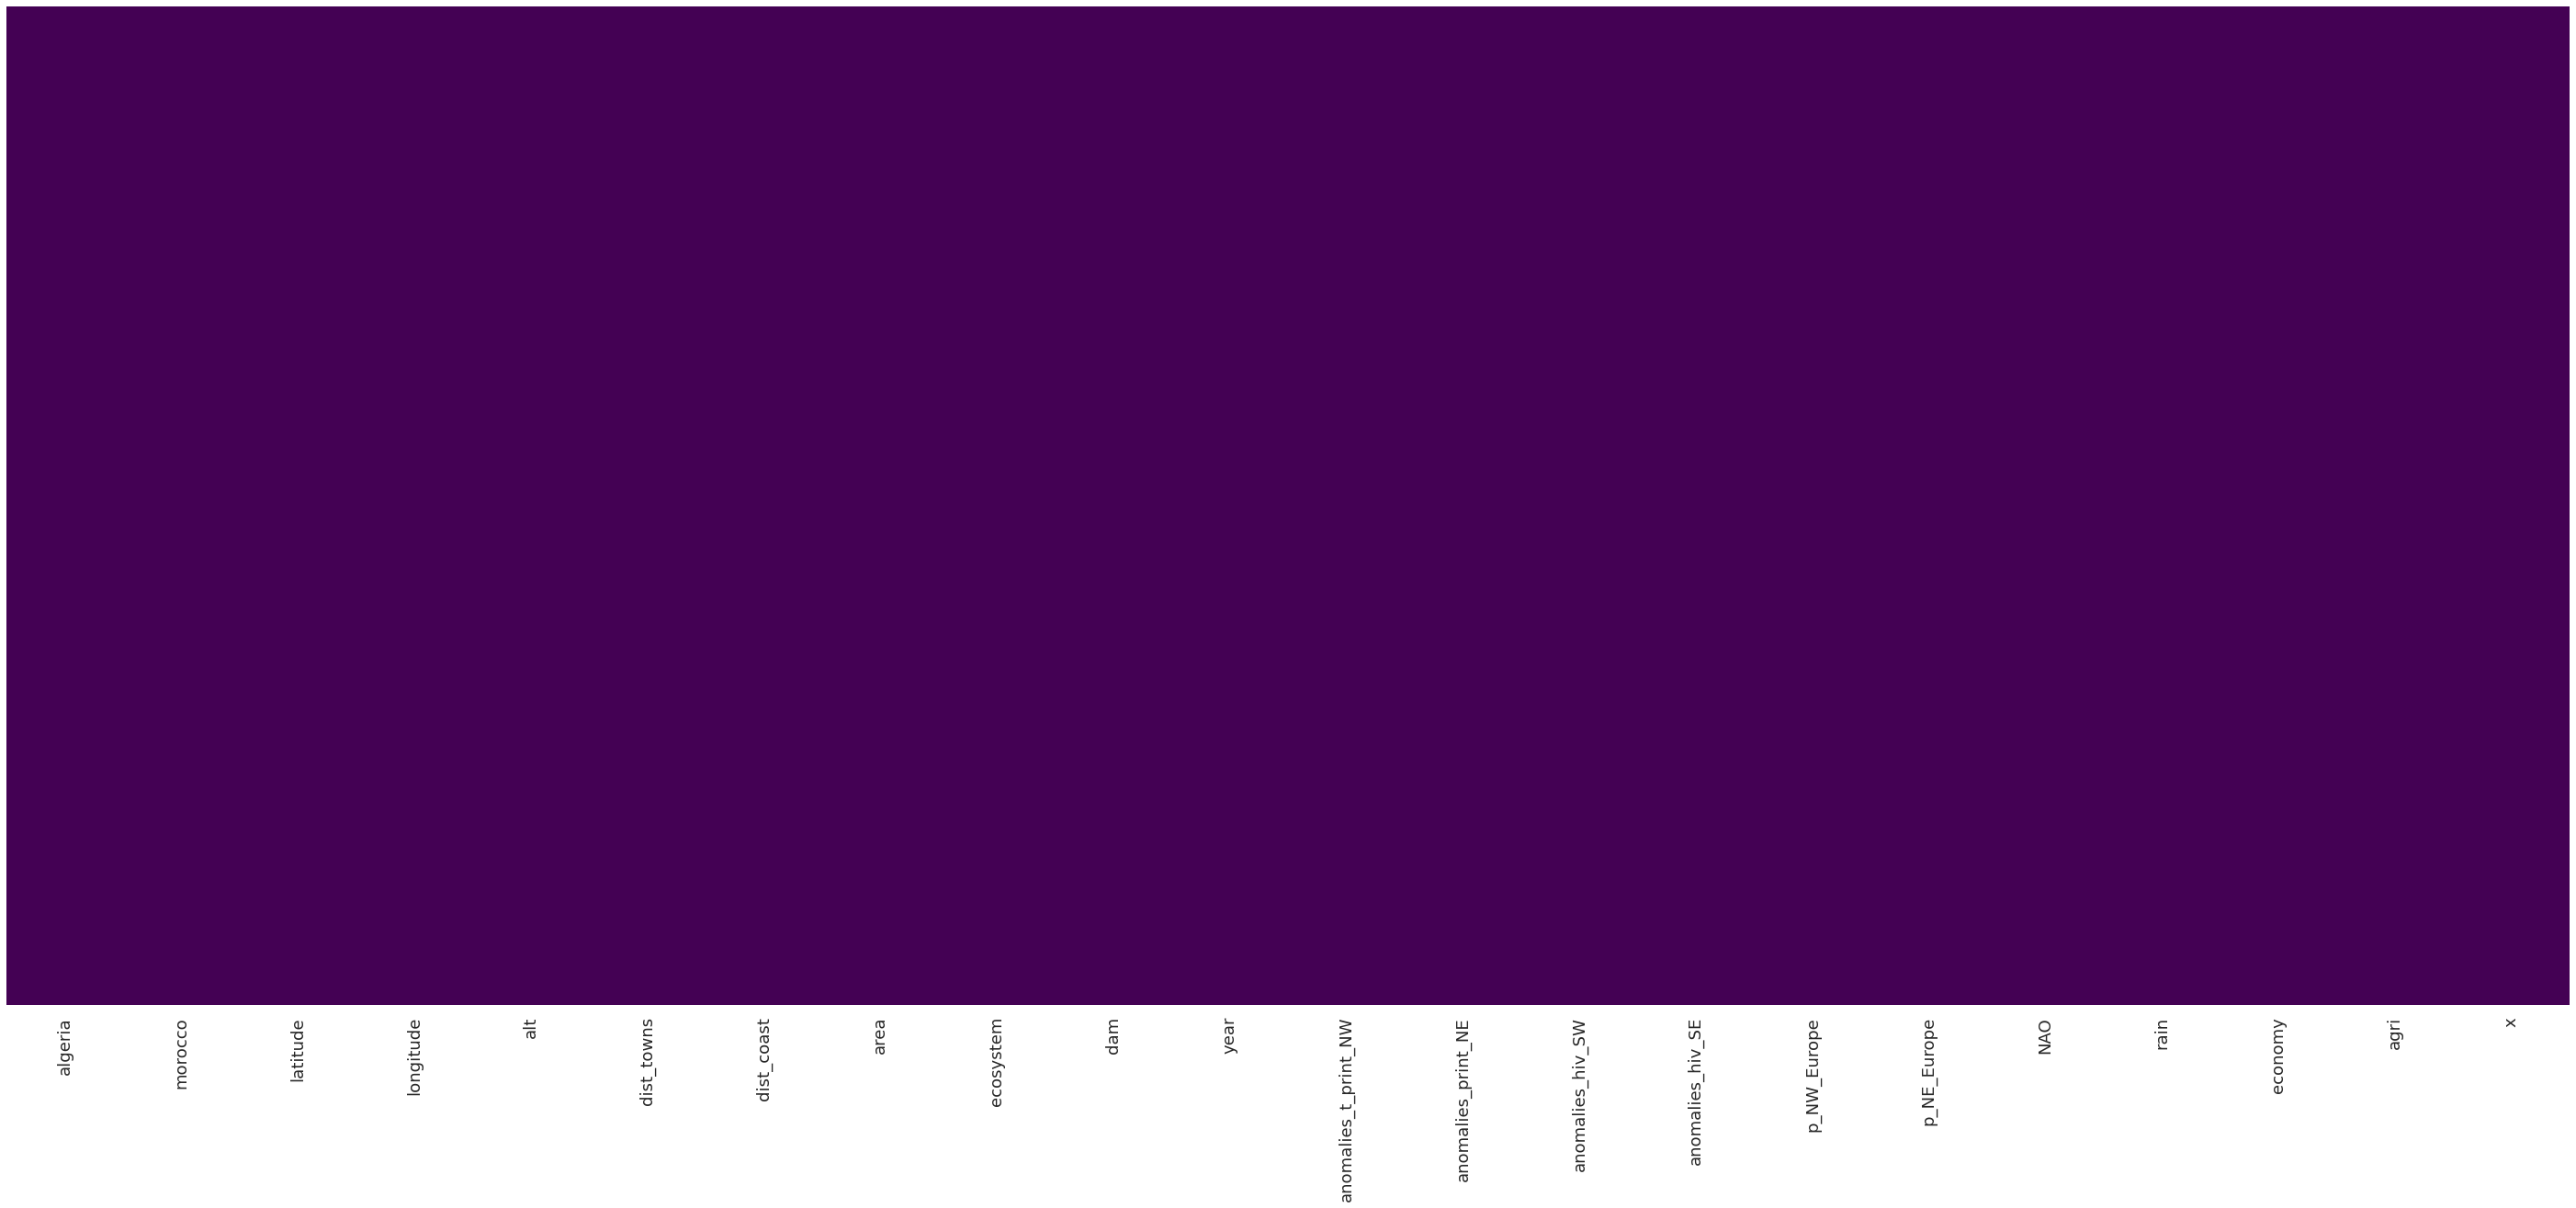

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#0 null valeus

In [ ]:
from termcolor import colored
for i in list(data.columns):
  if (data[i].max() - data[i].min()) > 10 :
    print(colored(i , 'green') , colored(np.round(data[i].max() - data[i].min(), 2),'red'))
  else:
    print(colored(i , 'green') , colored(np.round(data[i].max() - data[i].min(), 2),'blue'))

algeria 1
morocco 1
latitude 13.42
longitude 27.06
alt 2095.91
dist_towns 215506.7
dist_coast 785140.82
area 1056.13
ecosystem 3
dam 1
year 18
anomalies_t_print_NW 1.83
anomalies_print_NE 3.98
anomalies_hiv_SW 1.96
anomalies_hiv_SE 2.24
p_NW_Europe 22.44
p_NE_Europe 16.86
NAO 3.37
rain 177.29
economy 7.77
agri 2.39
x 81950


As we can see we do have rnages of values diffenrent from a columns to another so we do need to think about feature scaling in order to wind up with a better performance of the model ;)

Since we will be using the algorithms that need to be optimized using distances such as KNN thus we need to ensure the mean is zero and the variance to be one, i.e implement standarization to some column where we do find values and much bigger compared to other ones.

#Data exploration
 

In [ ]:
features.head()

,names(response),algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri
0,X19903,1,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158
1,X19904,1,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541
2,X19905,1,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474
3,X19906,1,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919
4,X199012,1,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043


In [ ]:
features.describe()

,algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri
count,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,0.571248,0.259222,34.954423,2.680387,321.290672,17710.358287,92526.353661,18.735779,2.755937,0.374432,1998.970440,0.432087,0.921630,0.497324,0.435546,59.652686,48.457102,-0.013921,253.148624,3.301786,37.995254
std,0.494960,0.438263,2.122943,6.589067,463.975522,21518.994001,130839.640284,82.683594,0.904351,0.484037,5.462523,0.445301,0.893692,0.425899,0.543289,5.638959,3.807682,0.952113,43.734319,1.580027,0.522871
min,0.000000,0.000000,23.730332,-15.794121,-20.390000,1346.220000,387.773000,0.001300,1.000000,0.000000,1990.000000,-0.450000,-1.450000,-0.360000,-0.530000,50.420000,42.450000,-2.030000,184.249282,-1.009665,36.396158
25%,0.000000,0.000000,33.704636,-2.737155,4.470000,6271.400000,4977.167000,0.343000,2.000000,0.000000,1994.000000,0.080000,0.490000,0.210000,0.100000,55.560000,46.110000,-0.650000,219.215072,2.395694,37.701742
50%,1.000000,0.000000,35.666973,5.371082,60.490000,12972.360000,27904.633000,1.400000,3.000000,0.000000,1999.000000,0.500000,0.920000,0.420000,0.410000,60.610000,47.310000,0.030000,260.405502,3.333541,38.052871
75%,1.000000,1.000000,36.520958,7.296992,601.500000,22015.700000,144649.586000,7.953000,3.000000,1.000000,2004.000000,0.700000,1.670000,0.830000,0.730000,61.840000,49.860000,0.520000,279.521890,3.986651,38.380703
max,1.000000,1.000000,37.154047,11.261433,2075.520000,216852.920000,785528.593000,1056.132000,4.000000,1.000000,2008.000000,1.380000,2.530000,1.600000,1.710000,72.860000,59.310000,1.340000,361.539234,6.762105,38.788880


In [ ]:
response.x.value_counts(dropna = False)

0        1891
10         39
2          37
50         37
6          35
         ... 
655         1
5600        1
22000       1
1538        1
2039        1
Name: x, Length: 682, dtype: int64

In [ ]:
liste_features = list(features.columns)
for i in liste_features:
  print(i , features[i].value_counts)
  print('----------------')

names(response) <bound method IndexOpsMixin.value_counts of 0         X19903
1         X19904
2         X19905
3         X19906
4        X199012
          ...   
3953    X2017203
3954    X2017204
3955    X2017206
3956    X2017208
3957    X2017209
Name: names(response), Length: 3958, dtype: object>
----------------
algeria <bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
3953    0
3954    0
3955    0
3956    0
3957    0
Name: algeria, Length: 3958, dtype: int64>
----------------
morocco <bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
3953    0
3954    0
3955    0
3956    0
3957    0
Name: morocco, Length: 3958, dtype: int64>
----------------
latitude <bound method IndexOpsMixin.value_counts of 0       36.831024
1       33.493796
2       36.147910
3       35.172772
4       35.728593
          ...    
3953    36.611366
3954    33.245830
3955    36.474304
3956    35.796711
3957   

# Data cleaning

We perceive negative values within some columns of the dataset, these columns are colored by green and red ones are for those with all positive values

In [ ]:
from termcolor import colored
liste_features = list(features.select_dtypes(include=np.number).columns)
columns_to_clean = []
for i in liste_features:
  if (features[i] >= 0).all() :
    print(colored(i , 'green')) #columns with only positive values
  else:
    print(colored(i, 'red'))  #columns with negative values
    columns_to_clean += [i]

algeria
morocco
latitude
longitude
alt
dist_towns
dist_coast
area
ecosystem
dam
year
anomalies_t_print_NW
anomalies_print_NE
anomalies_hiv_SW
anomalies_hiv_SE
p_NW_Europe
p_NE_Europe
NAO
rain
economy
agri


There we go, columns with negative values 

In [ ]:
columns_to_clean

['longitude',
 'alt',
 'anomalies_t_print_NW',
 'anomalies_print_NE',
 'anomalies_hiv_SW',
 'anomalies_hiv_SE',
 'NAO',
 'economy']

#Pre-processing 

In [ ]:
data.head()

,algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0
2,1,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474,4
3,1,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919,0
4,1,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043,0


In [ ]:
data['tunisie'] = 0
for i in list(data[(data['algeria'] == 0) & (data['morocco'] == 0) ].index):
  data['tunisie'][i] = 1
data['tunisie'].value_counts()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    3287
1     671
Name: tunisie, dtype: int64

In [ ]:
data.algeria.value_counts()

1    2261
0    1697
Name: algeria, dtype: int64

In [ ]:
data.morocco.value_counts()

0    2932
1    1026
Name: morocco, dtype: int64

In [ ]:
data.columns

Index(['algeria', 'morocco', 'latitude', 'longitude', 'alt', 'dist_towns',
       'dist_coast', 'area', 'ecosystem', 'dam', 'year',
       'anomalies_t_print_NW', 'anomalies_print_NE', 'anomalies_hiv_SW',
       'anomalies_hiv_SE', 'p_NW_Europe', 'p_NE_Europe', 'NAO', 'rain',
       'economy', 'agri', 'x', 'tunisie'],
      dtype='object')

In [ ]:
data = data.reindex(columns= ['algeria', 'morocco', 'tunisie', 'latitude', 'longitude', 'alt', 'dist_towns',
       'dist_coast', 'area', 'ecosystem', 'dam', 'year',
       'anomalies_t_print_NW', 'anomalies_print_NE', 'anomalies_hiv_SW',
       'anomalies_hiv_SE', 'p_NW_Europe', 'p_NE_Europe', 'NAO', 'rain',
       'economy', 'agri', 'x'])

In [ ]:
data

,algeria,morocco,tunisie,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0
2,1,0,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474,4
3,1,0,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919,0
4,1,0,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,0,0,1,36.611366,10.887952,-1.75,6304.45,965.154,3.427,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,223.319617,1.170622,37.644043,81950
3954,0,0,1,33.245830,11.261433,0.00,15055.88,6075.019,301.550,4,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,295.745933,6.762105,37.740067,1720
3955,0,0,1,36.474304,10.815580,0.05,3875.75,1255.895,0.593,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,217.846890,1.160287,37.737005,4
3956,0,0,1,35.796711,10.142059,27.01,45208.10,50569.922,0.815,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,304.188038,5.597799,37.897182,58


Some machine learning models are fundamentally based on distance matrix, also known as the distance-based classifier, for example, K-Nearest-Neighbours, SVM, and Neural Network. Feature scaling is extremely essential to those models, especially when the range of the features is very different. Otherwise, features with a large range will have a large influence in computing the distance

In [ ]:
data.dist_coast.mean()

92526.35366093928

In [ ]:
data.dist_coast.median()

27904.632999999998

#Data visualization

In [ ]:
def diagnostic_plots(data, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)

    plt.show()

In [ ]:
def split_plots(n):
  #split plots
  string = ''
  for i in range(n):
    string+= '-'
  return string

histogram and Q-Q plot for algeria variable


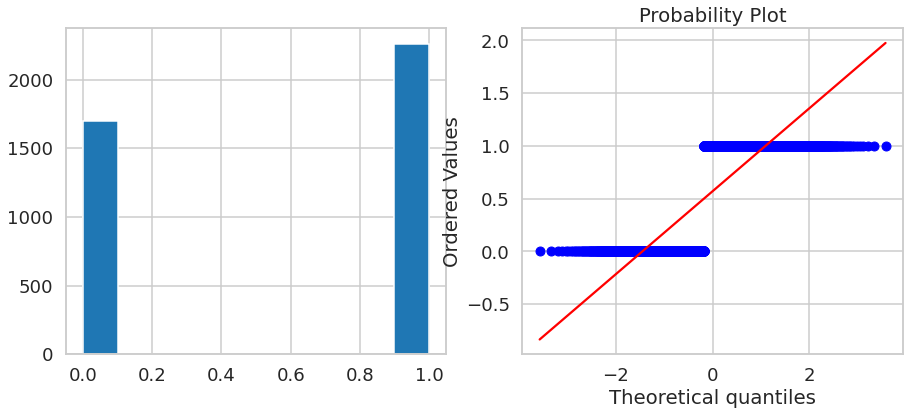

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for morocco variable


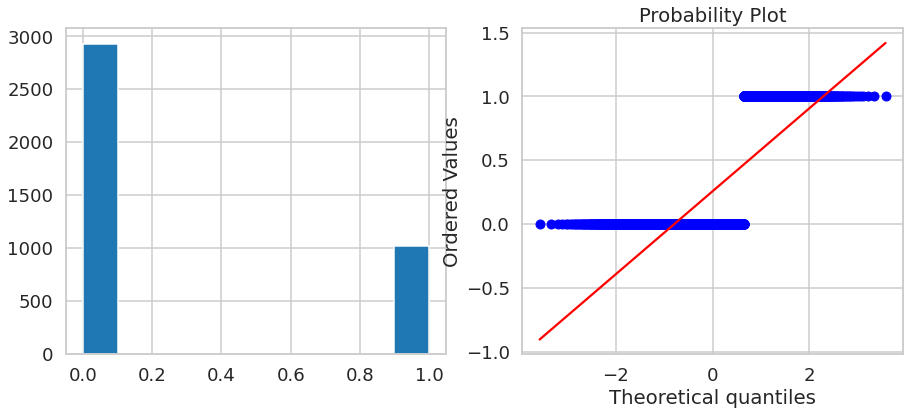

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for tunisie variable


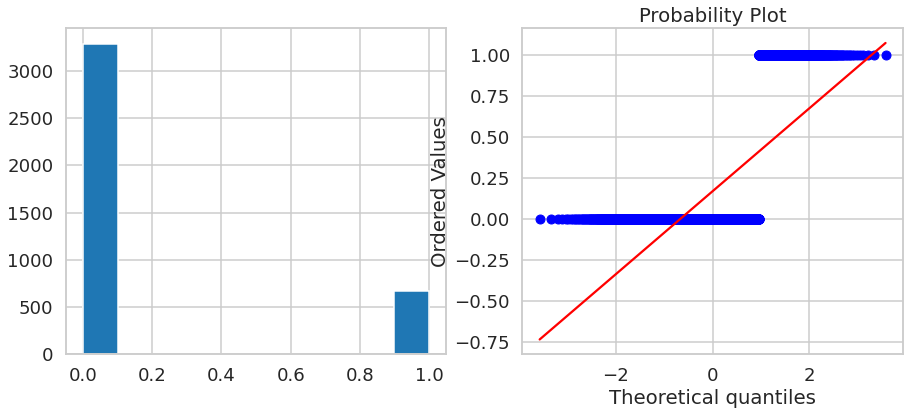

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for latitude variable


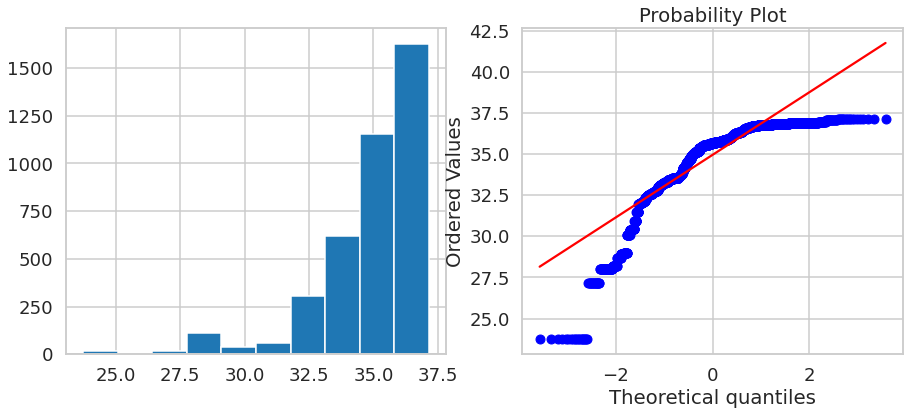

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for longitude variable


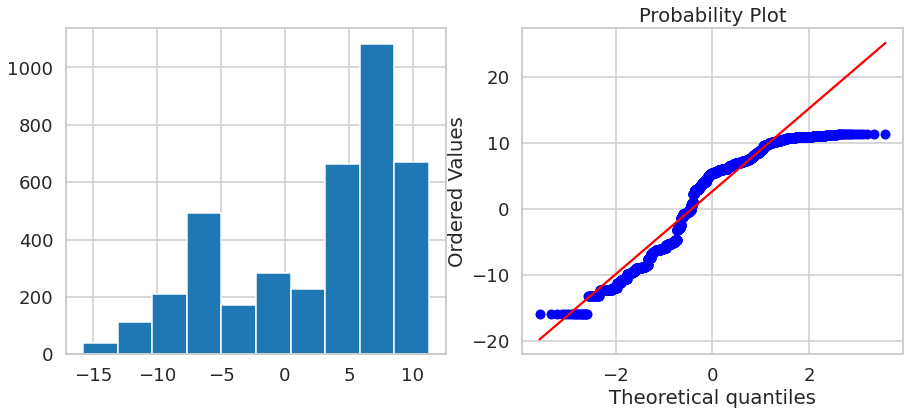

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for alt variable


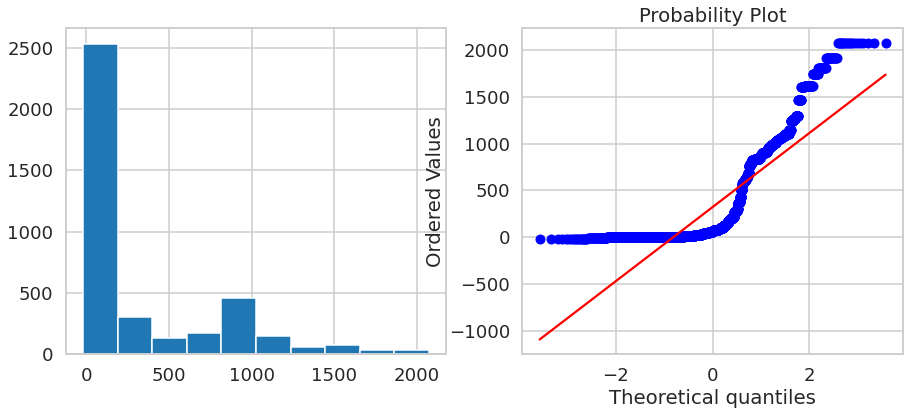

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for dist_towns variable


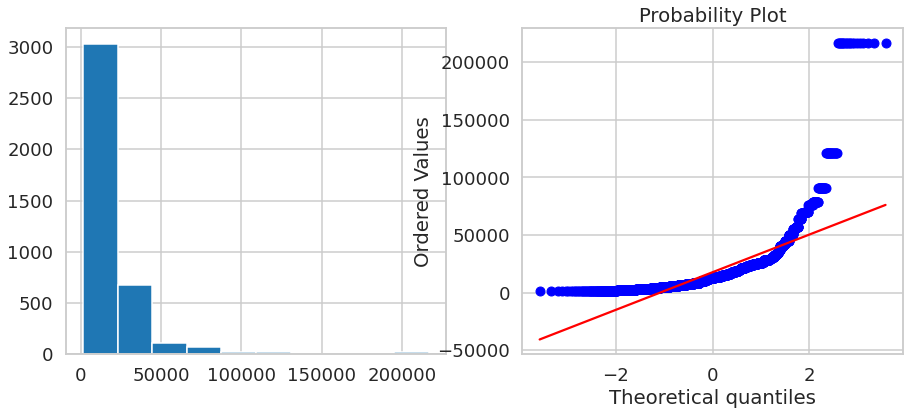

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for dist_coast variable


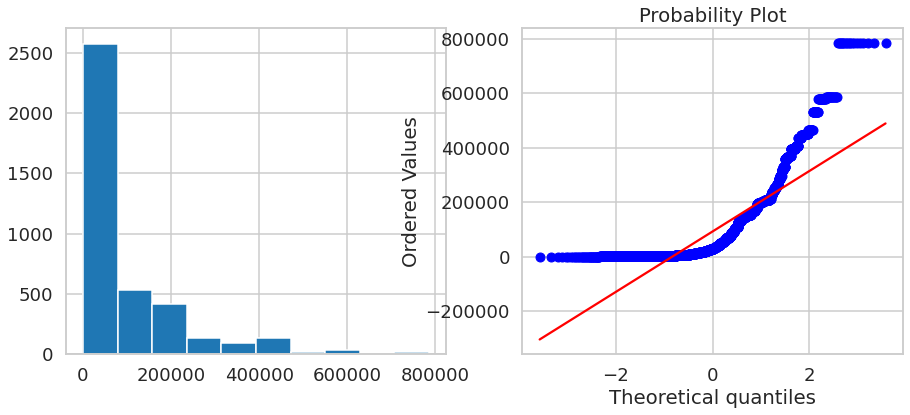

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for area variable


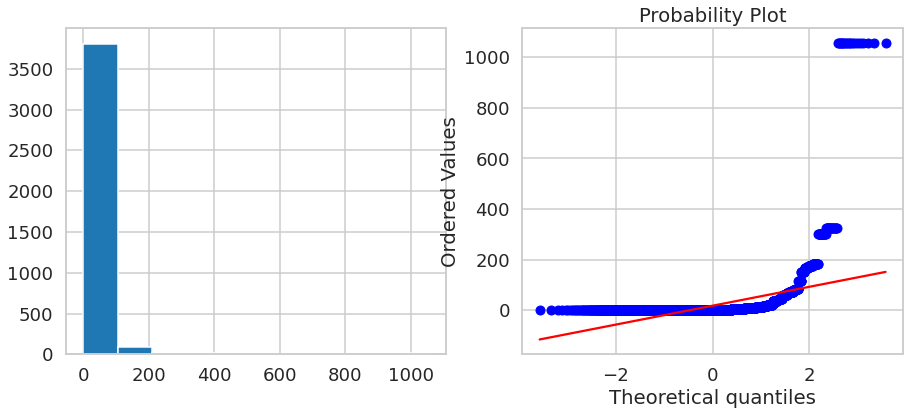

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for ecosystem variable


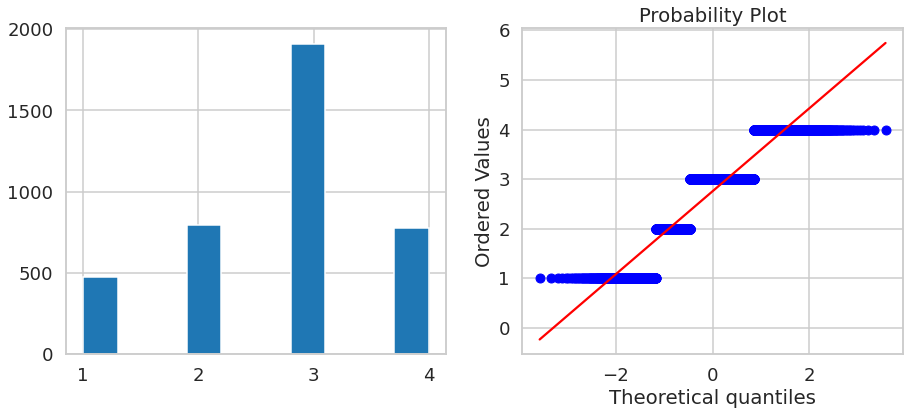

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for dam variable


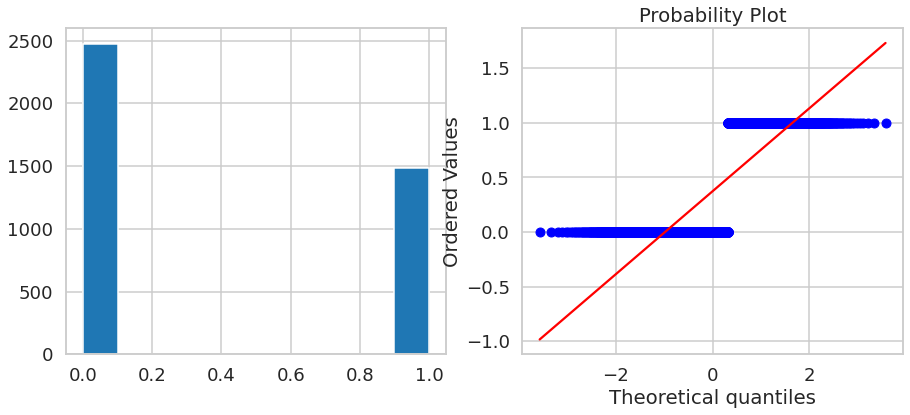

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for year variable


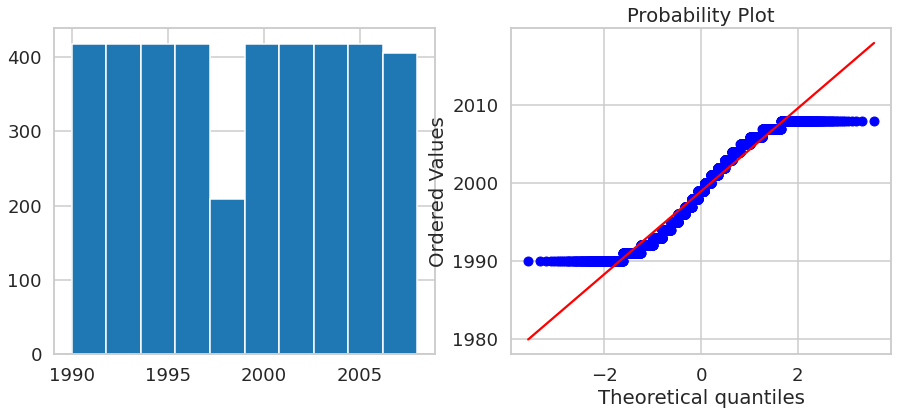

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_t_print_NW variable


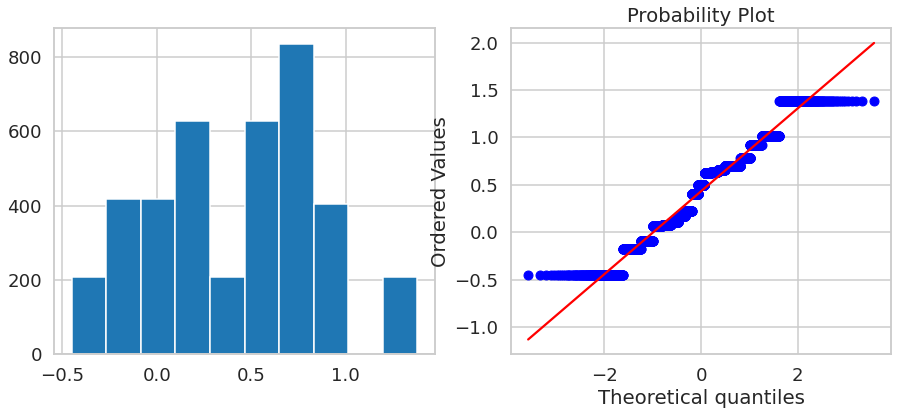

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_print_NE variable


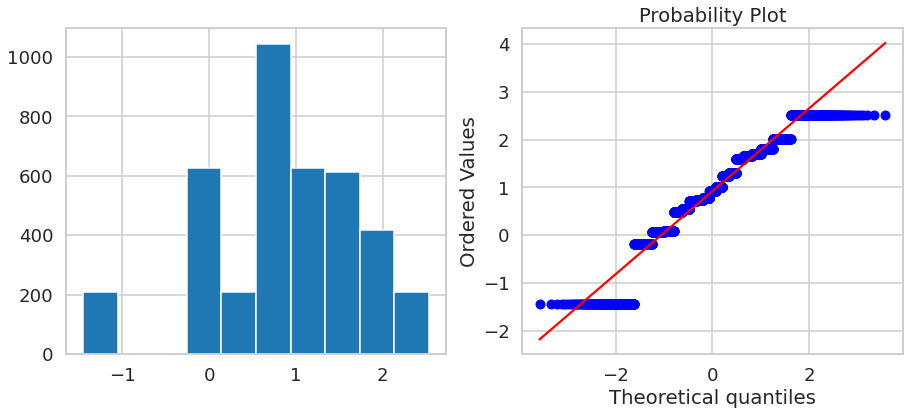

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_hiv_SW variable


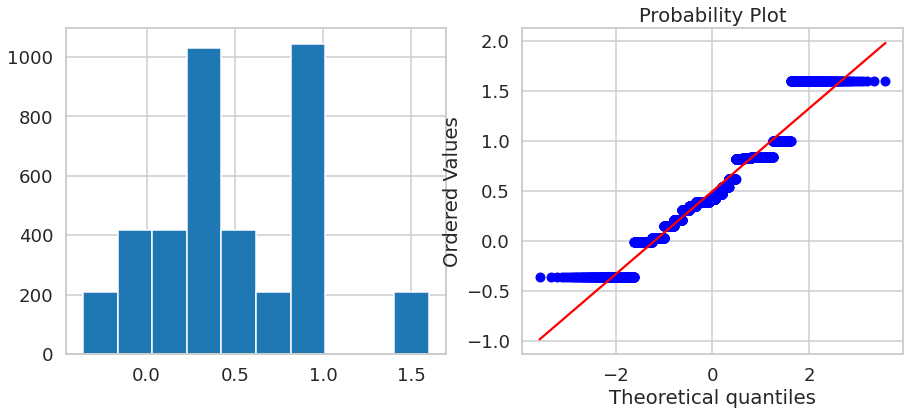

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_hiv_SE variable


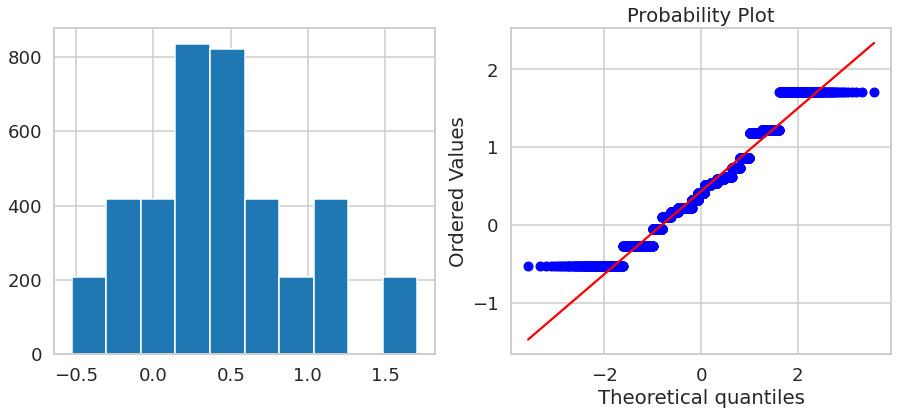

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for p_NW_Europe variable


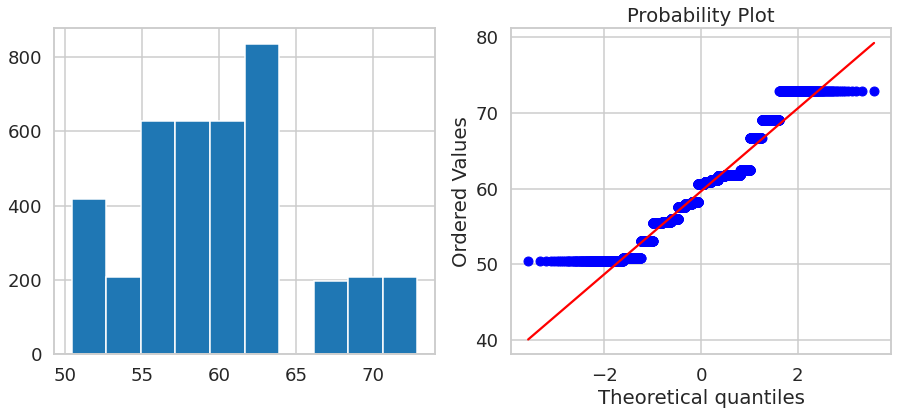

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for p_NE_Europe variable


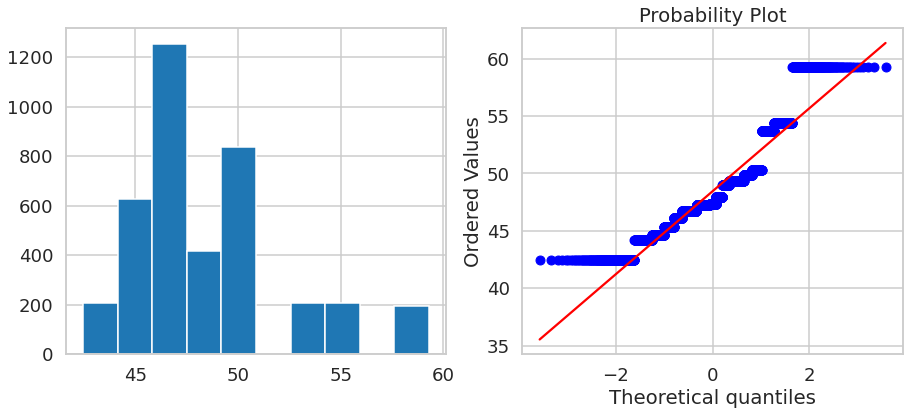

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for NAO variable


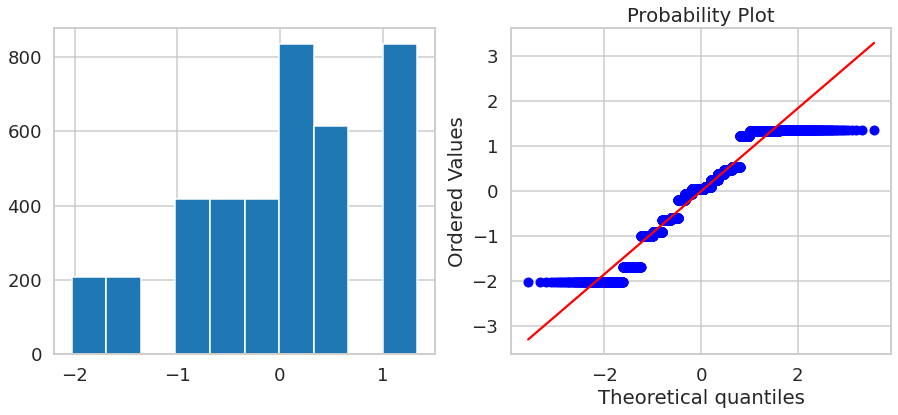

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for rain variable


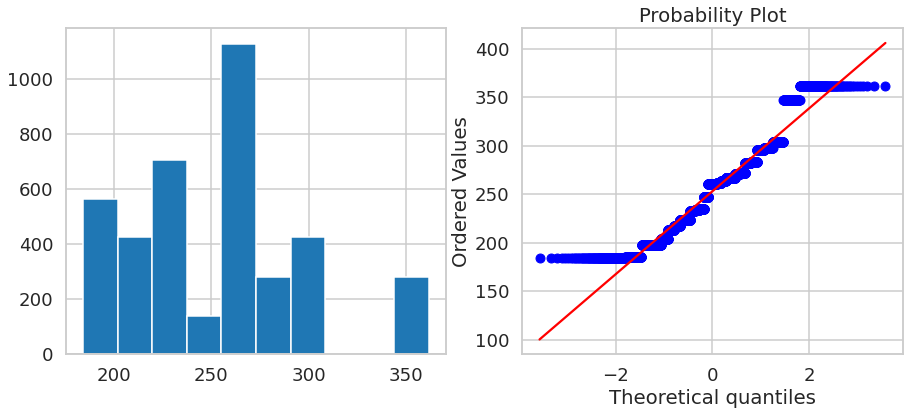

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for economy variable


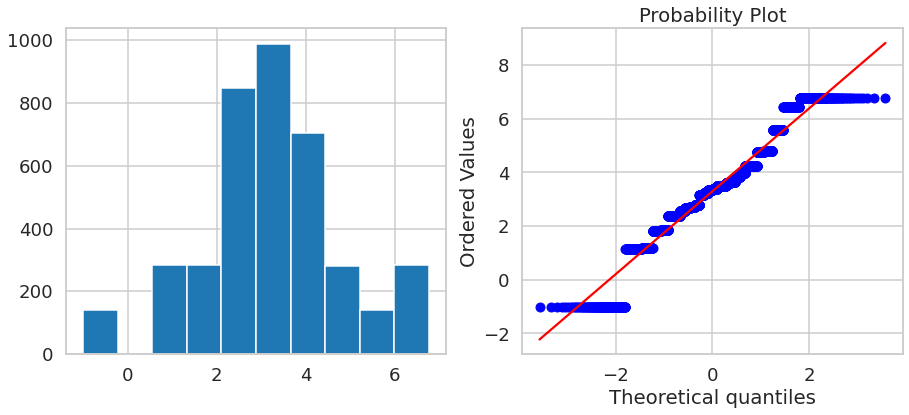

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for agri variable


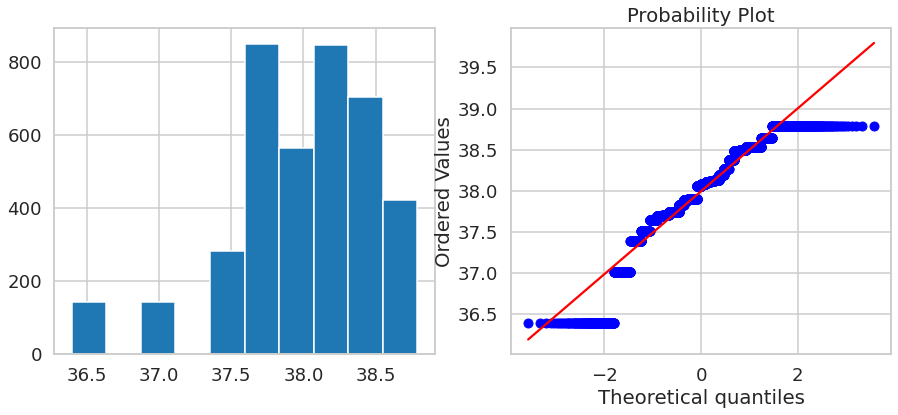

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for x variable


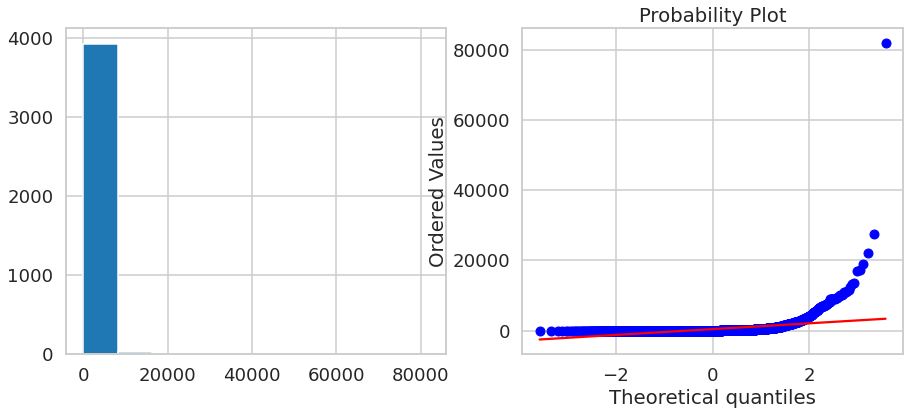

------------------------------------------------------------------------------------------------------------------------


In [ ]:
from scipy import stats
for i in list(data.select_dtypes(include=np.number).columns):
  print('histogram and Q-Q plot for ' + i + ' variable')
  diagnostic_plots(data, i)
  print(split_plots(120))

The indepandants varialbes do not show a normality pattern, thing that can be noticed from plots above, since Q-Q plots do not urge to any fitting between the variable and the y = x line. That said, the best thing to think about in this regard is to look for transformation in such a manner to get this normality pattern for our variables, since then, we are likely gonna be using log transformation latter on.

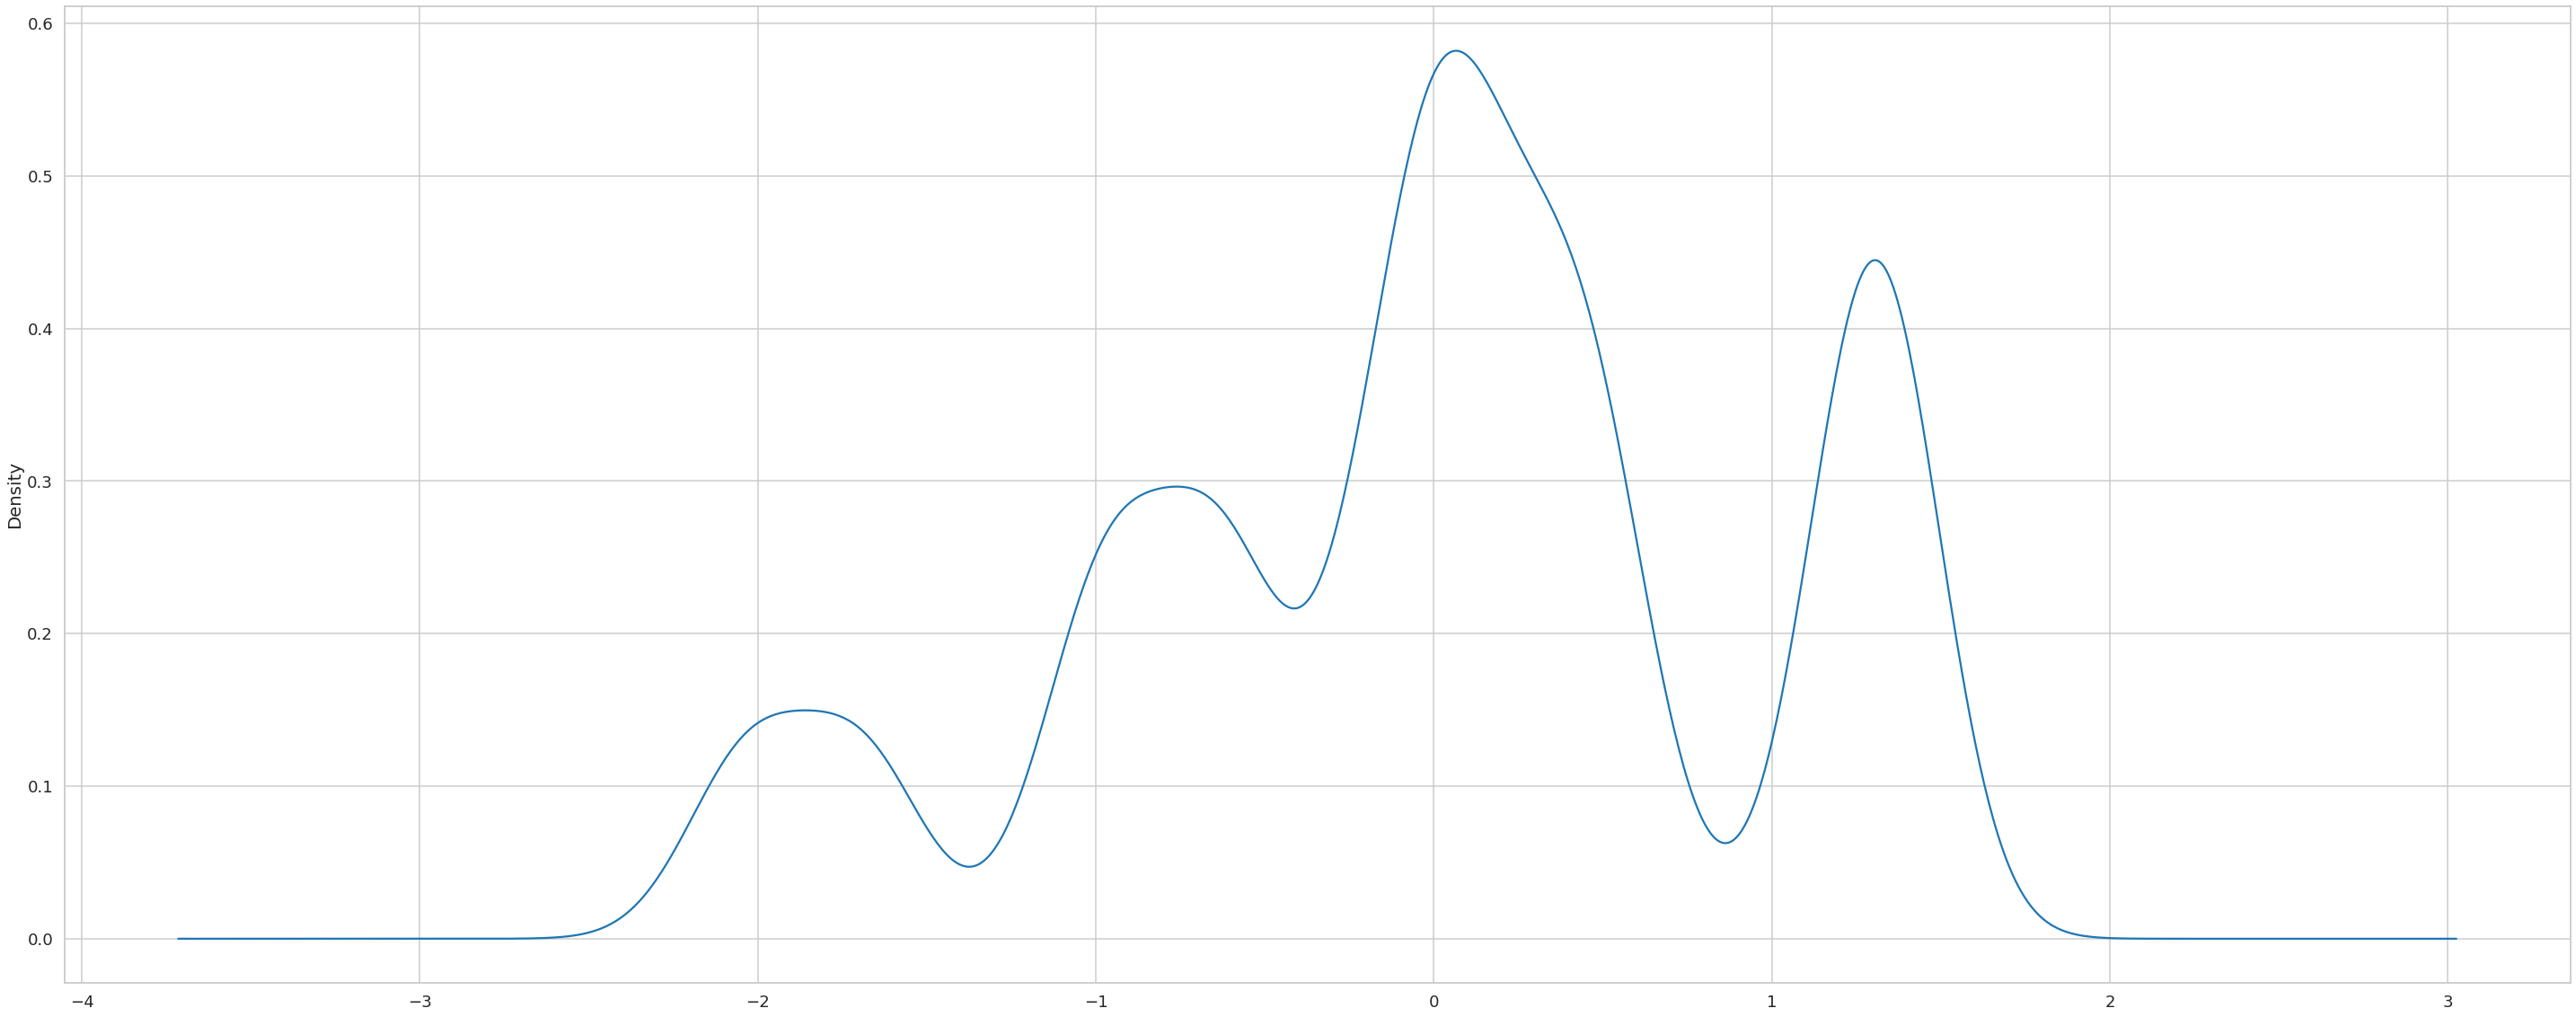

In [ ]:
data.NAO.plot(kind='kde')

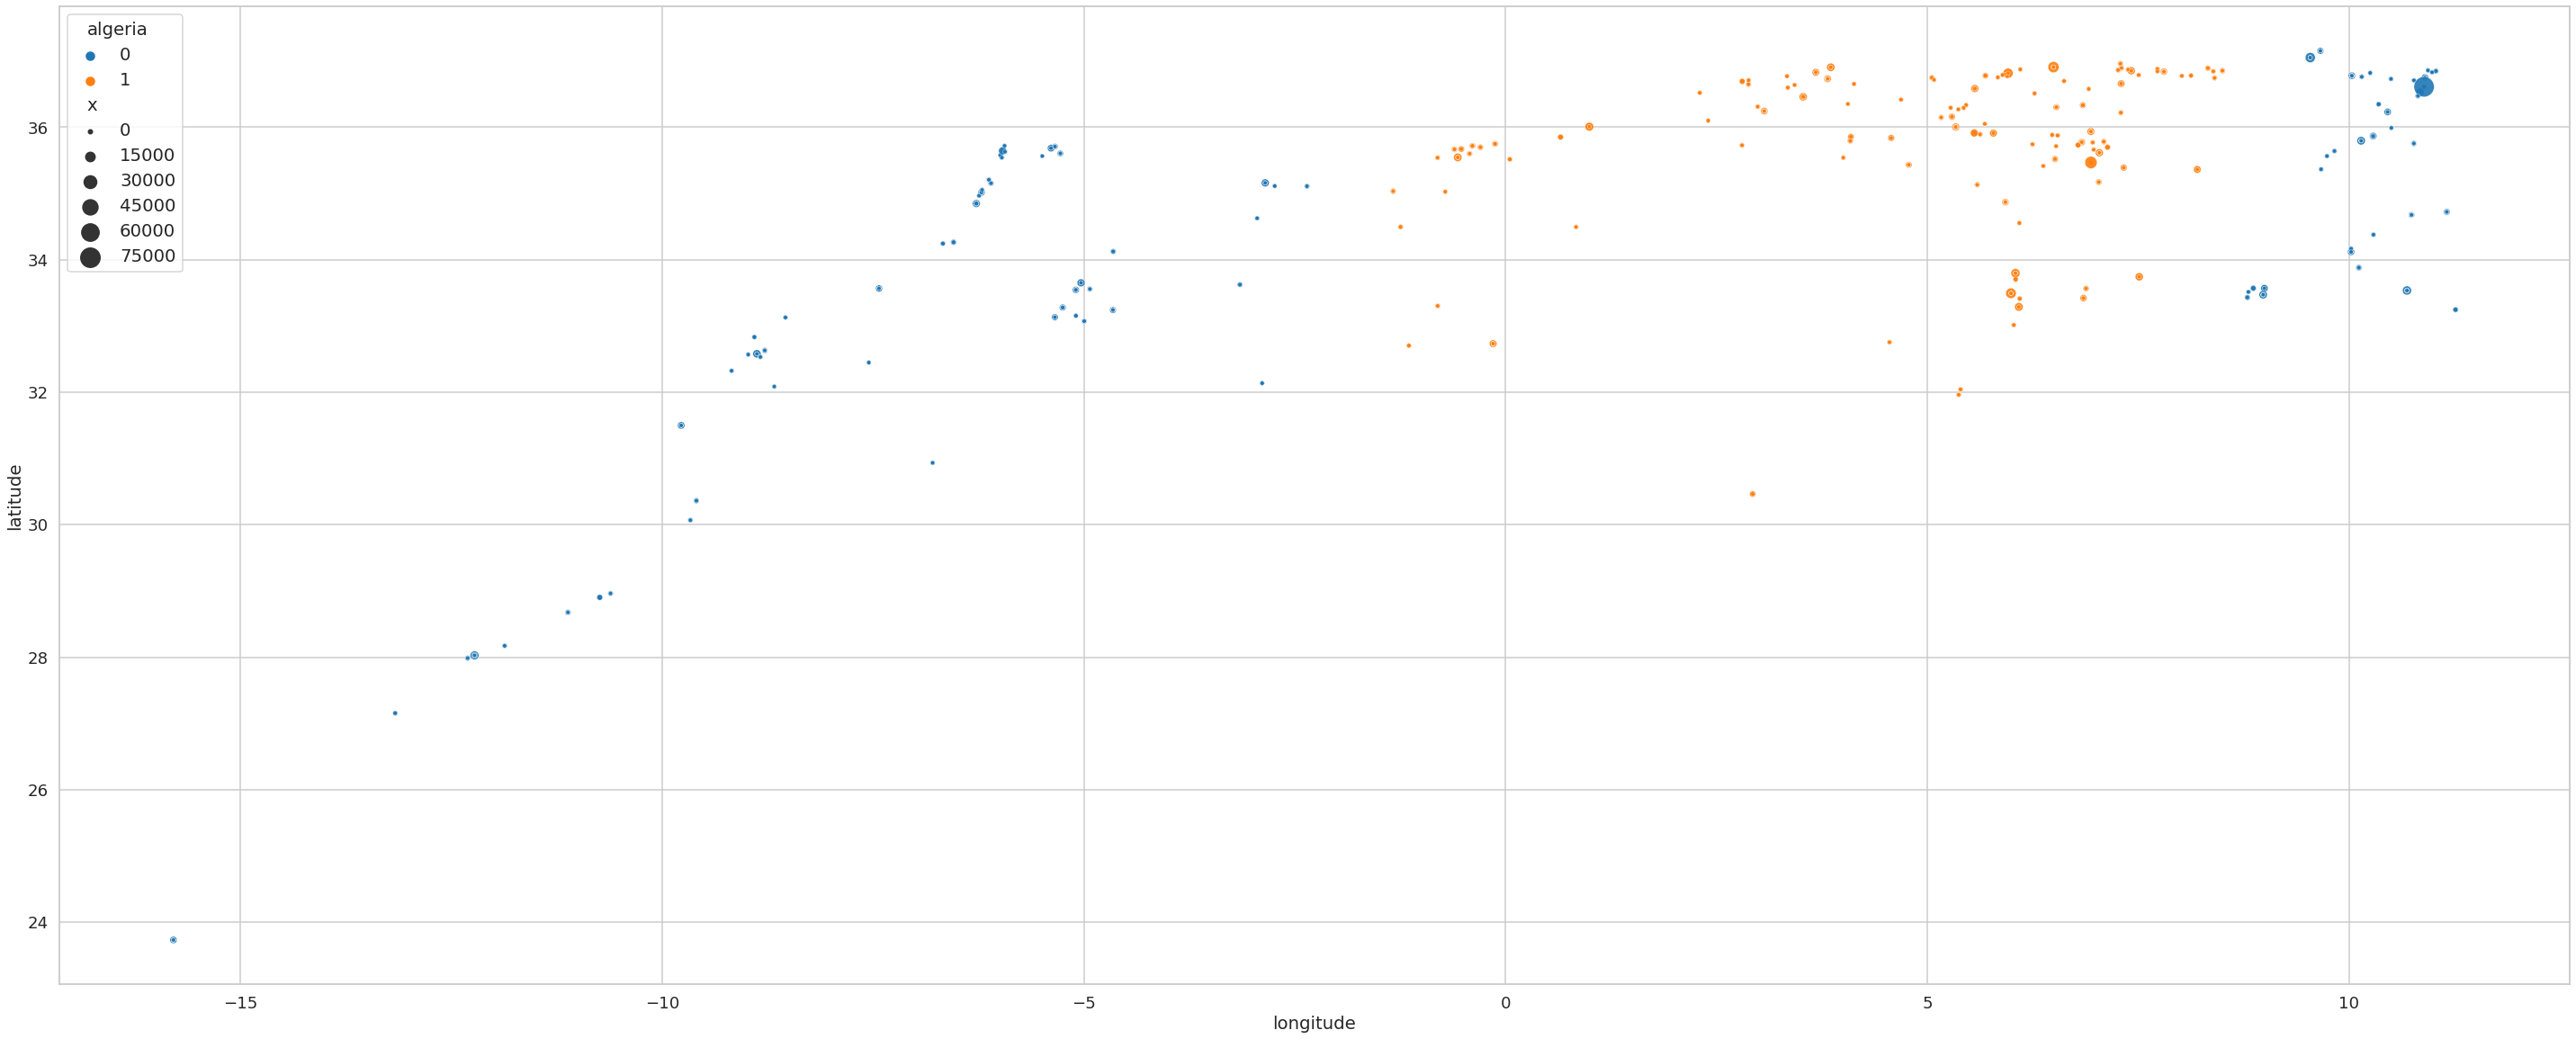

In [ ]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'algeria' , data = data, size='x' , sizes=(20,500) , alpha=0.9)

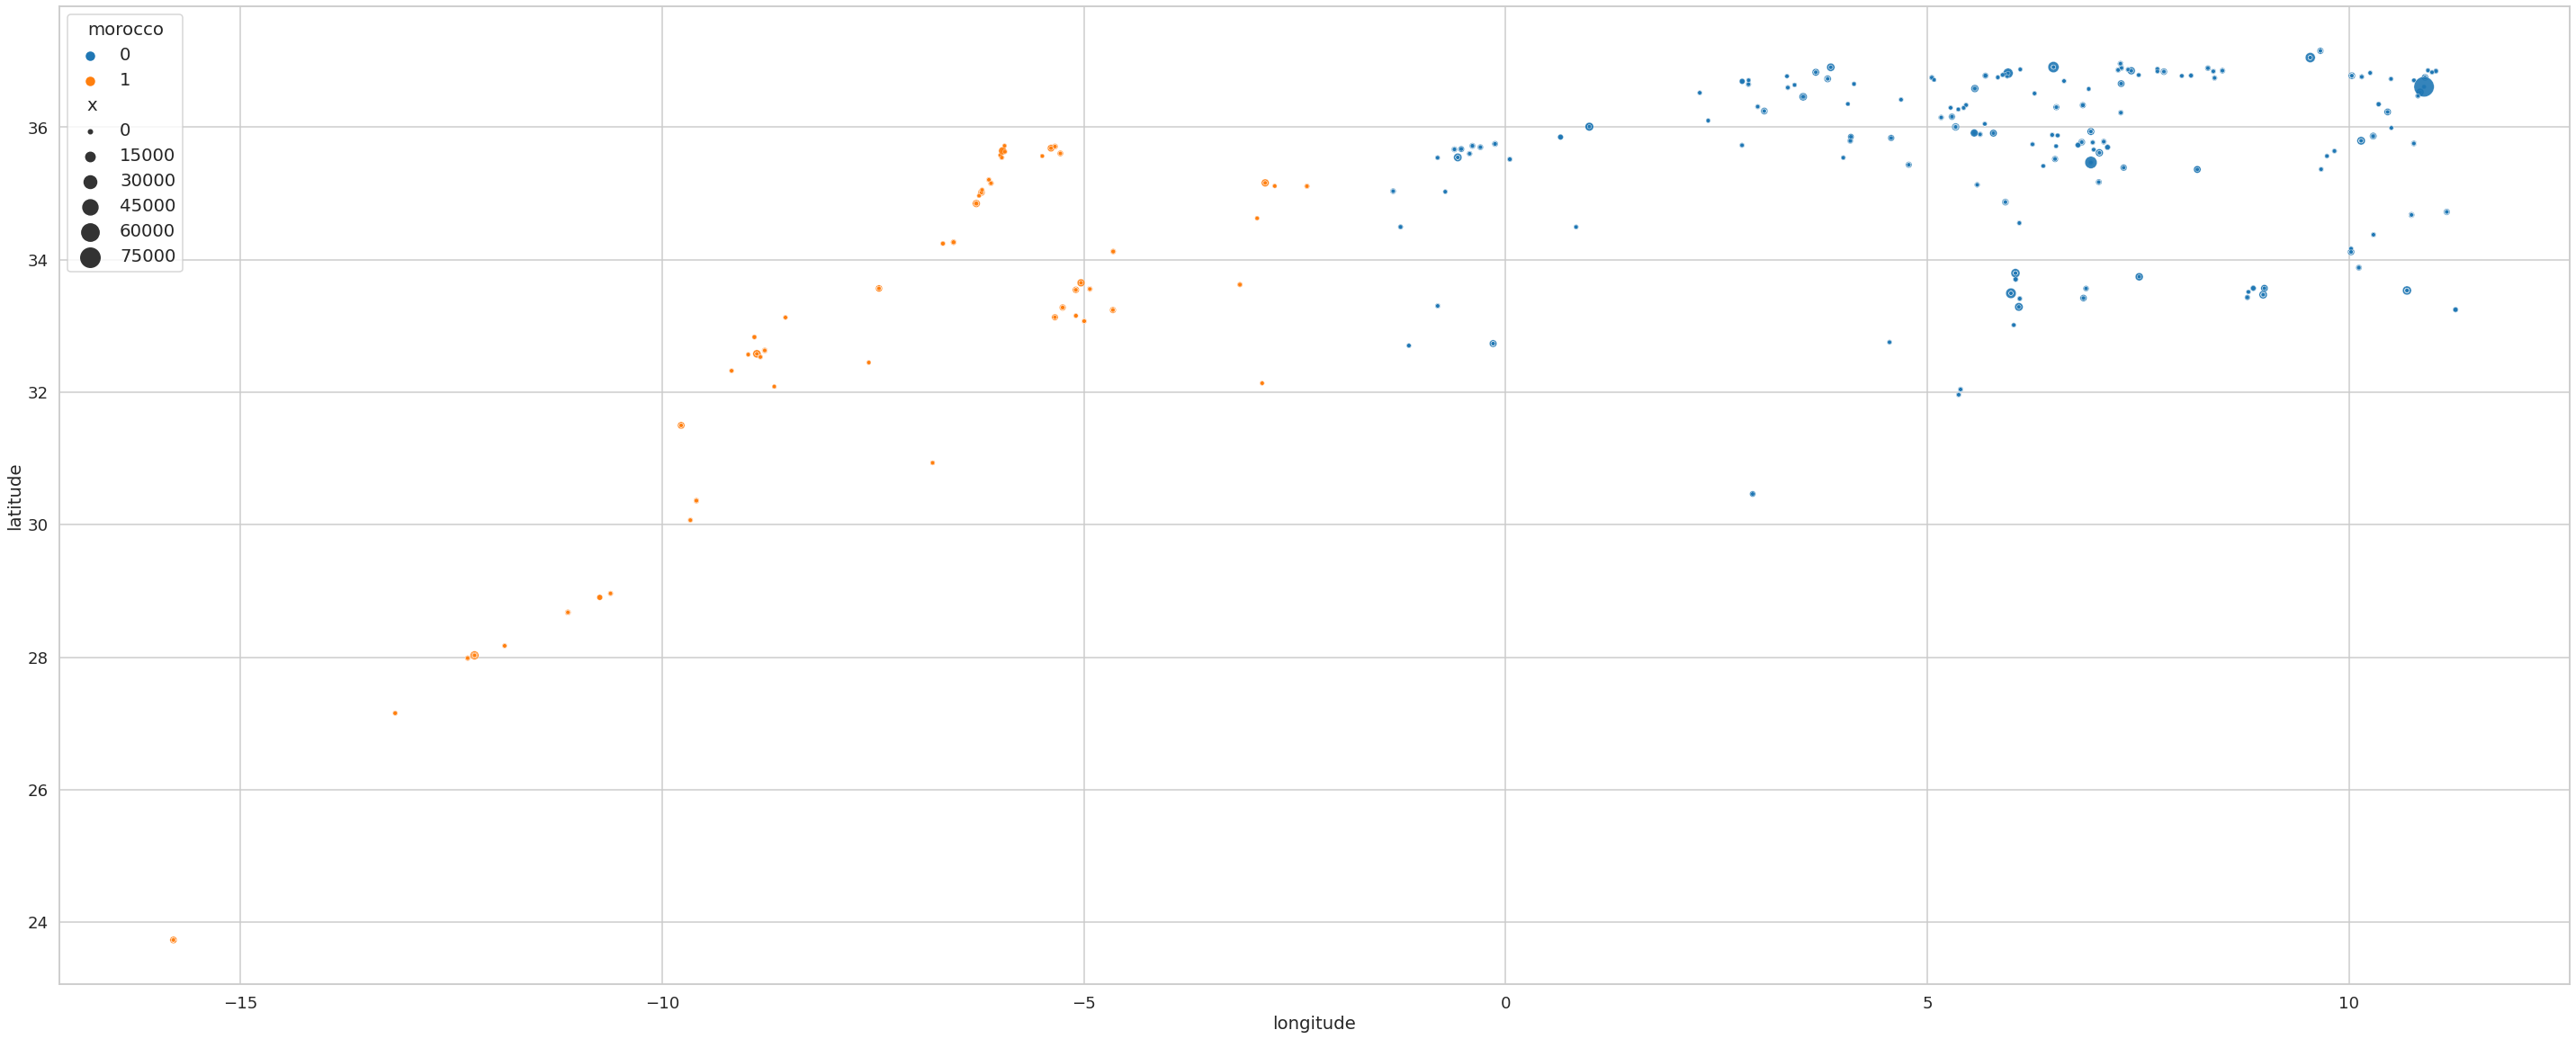

In [ ]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'morocco' , data = data, size='x' , sizes=(20,500) , alpha=0.9)

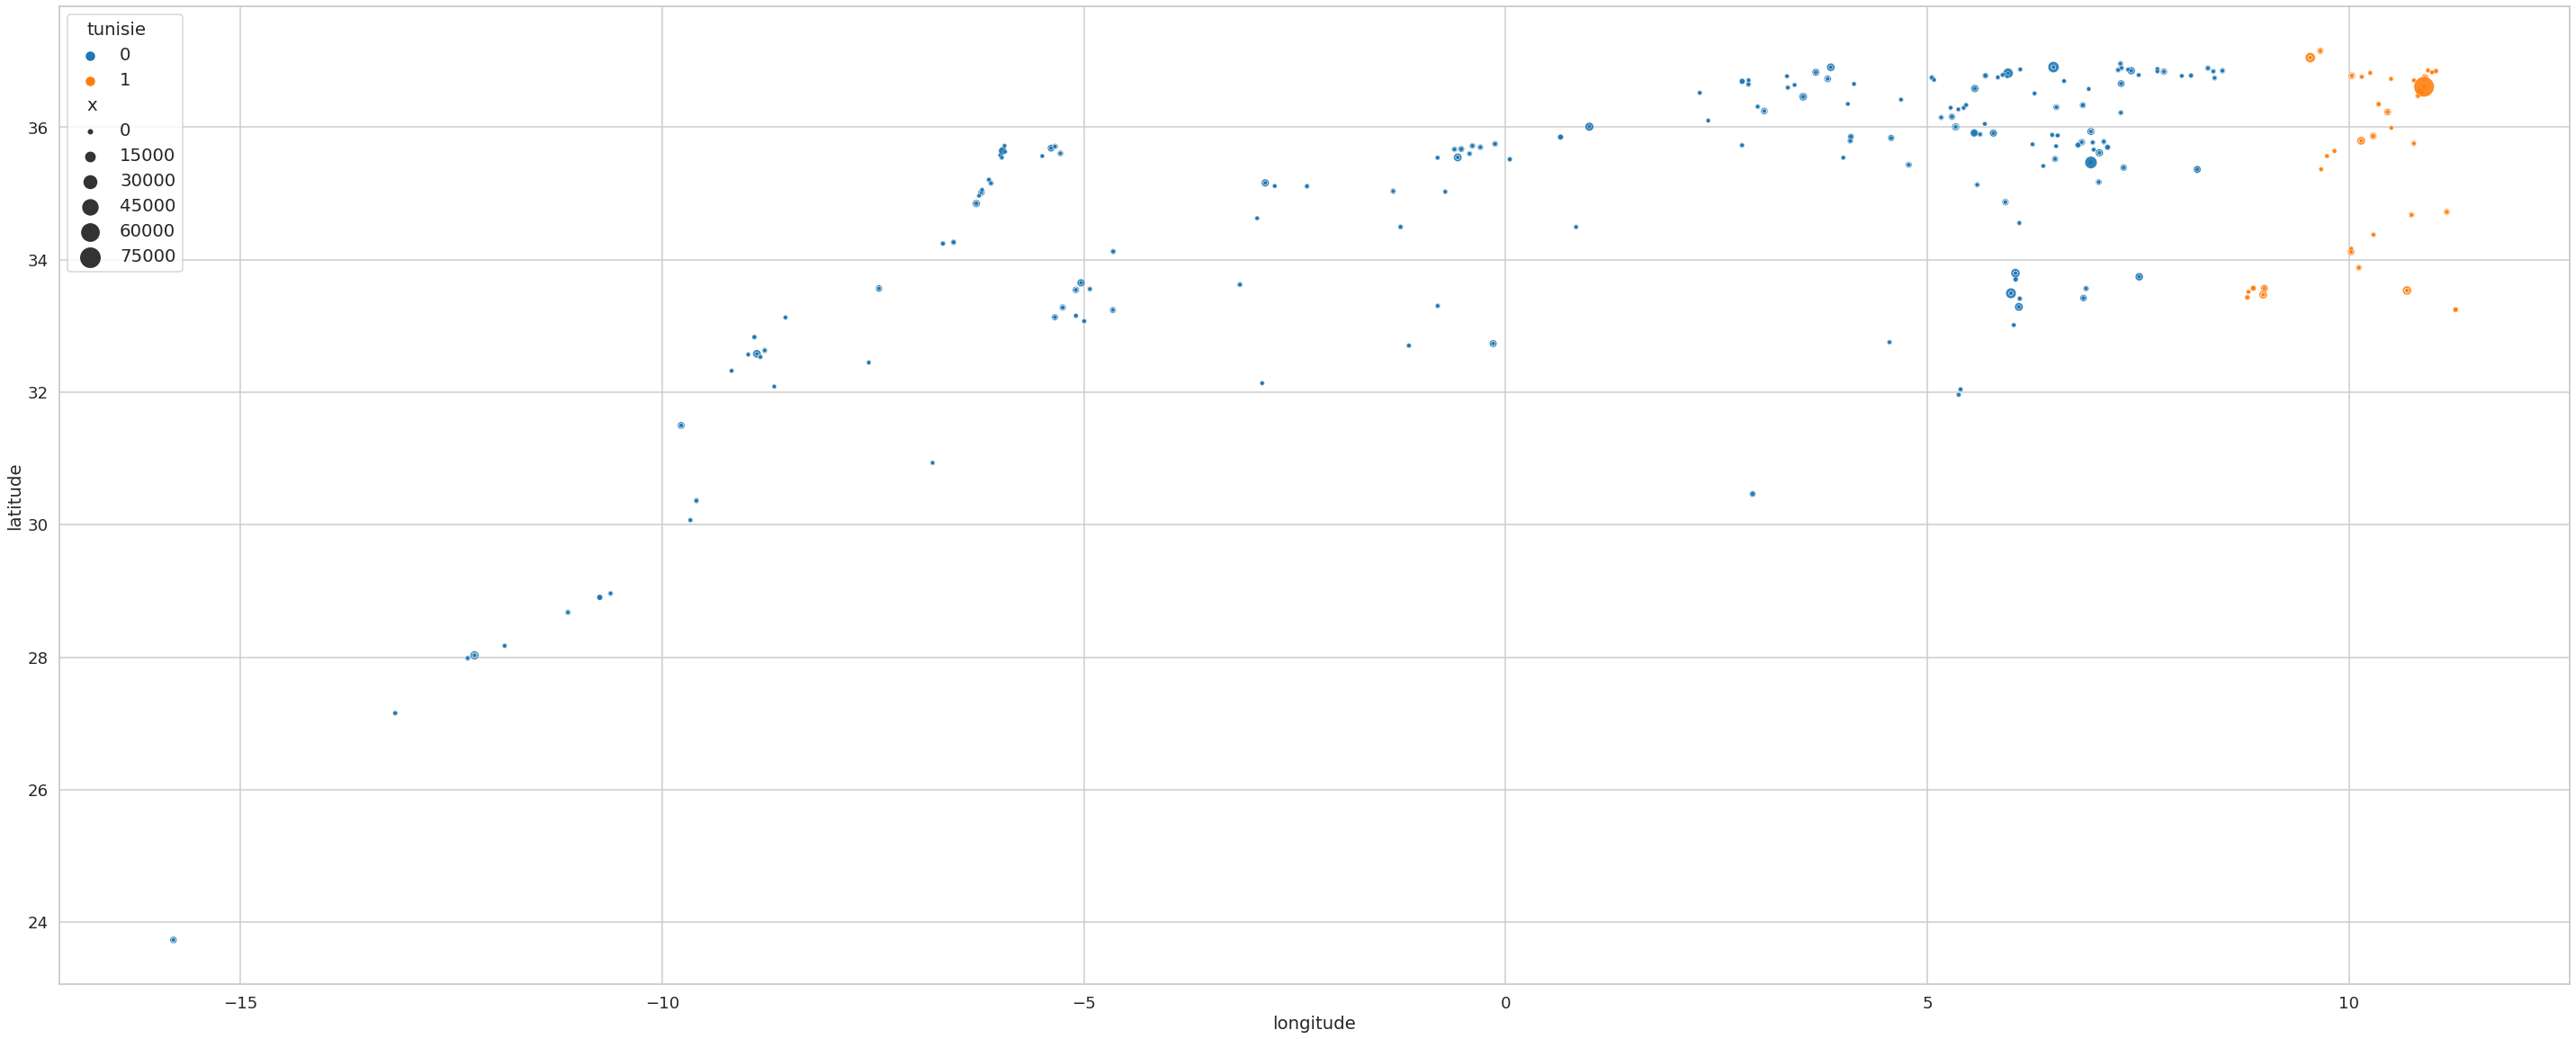

In [ ]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'tunisie' , data = data, size='x' , sizes=(20,500) , alpha=0.9)

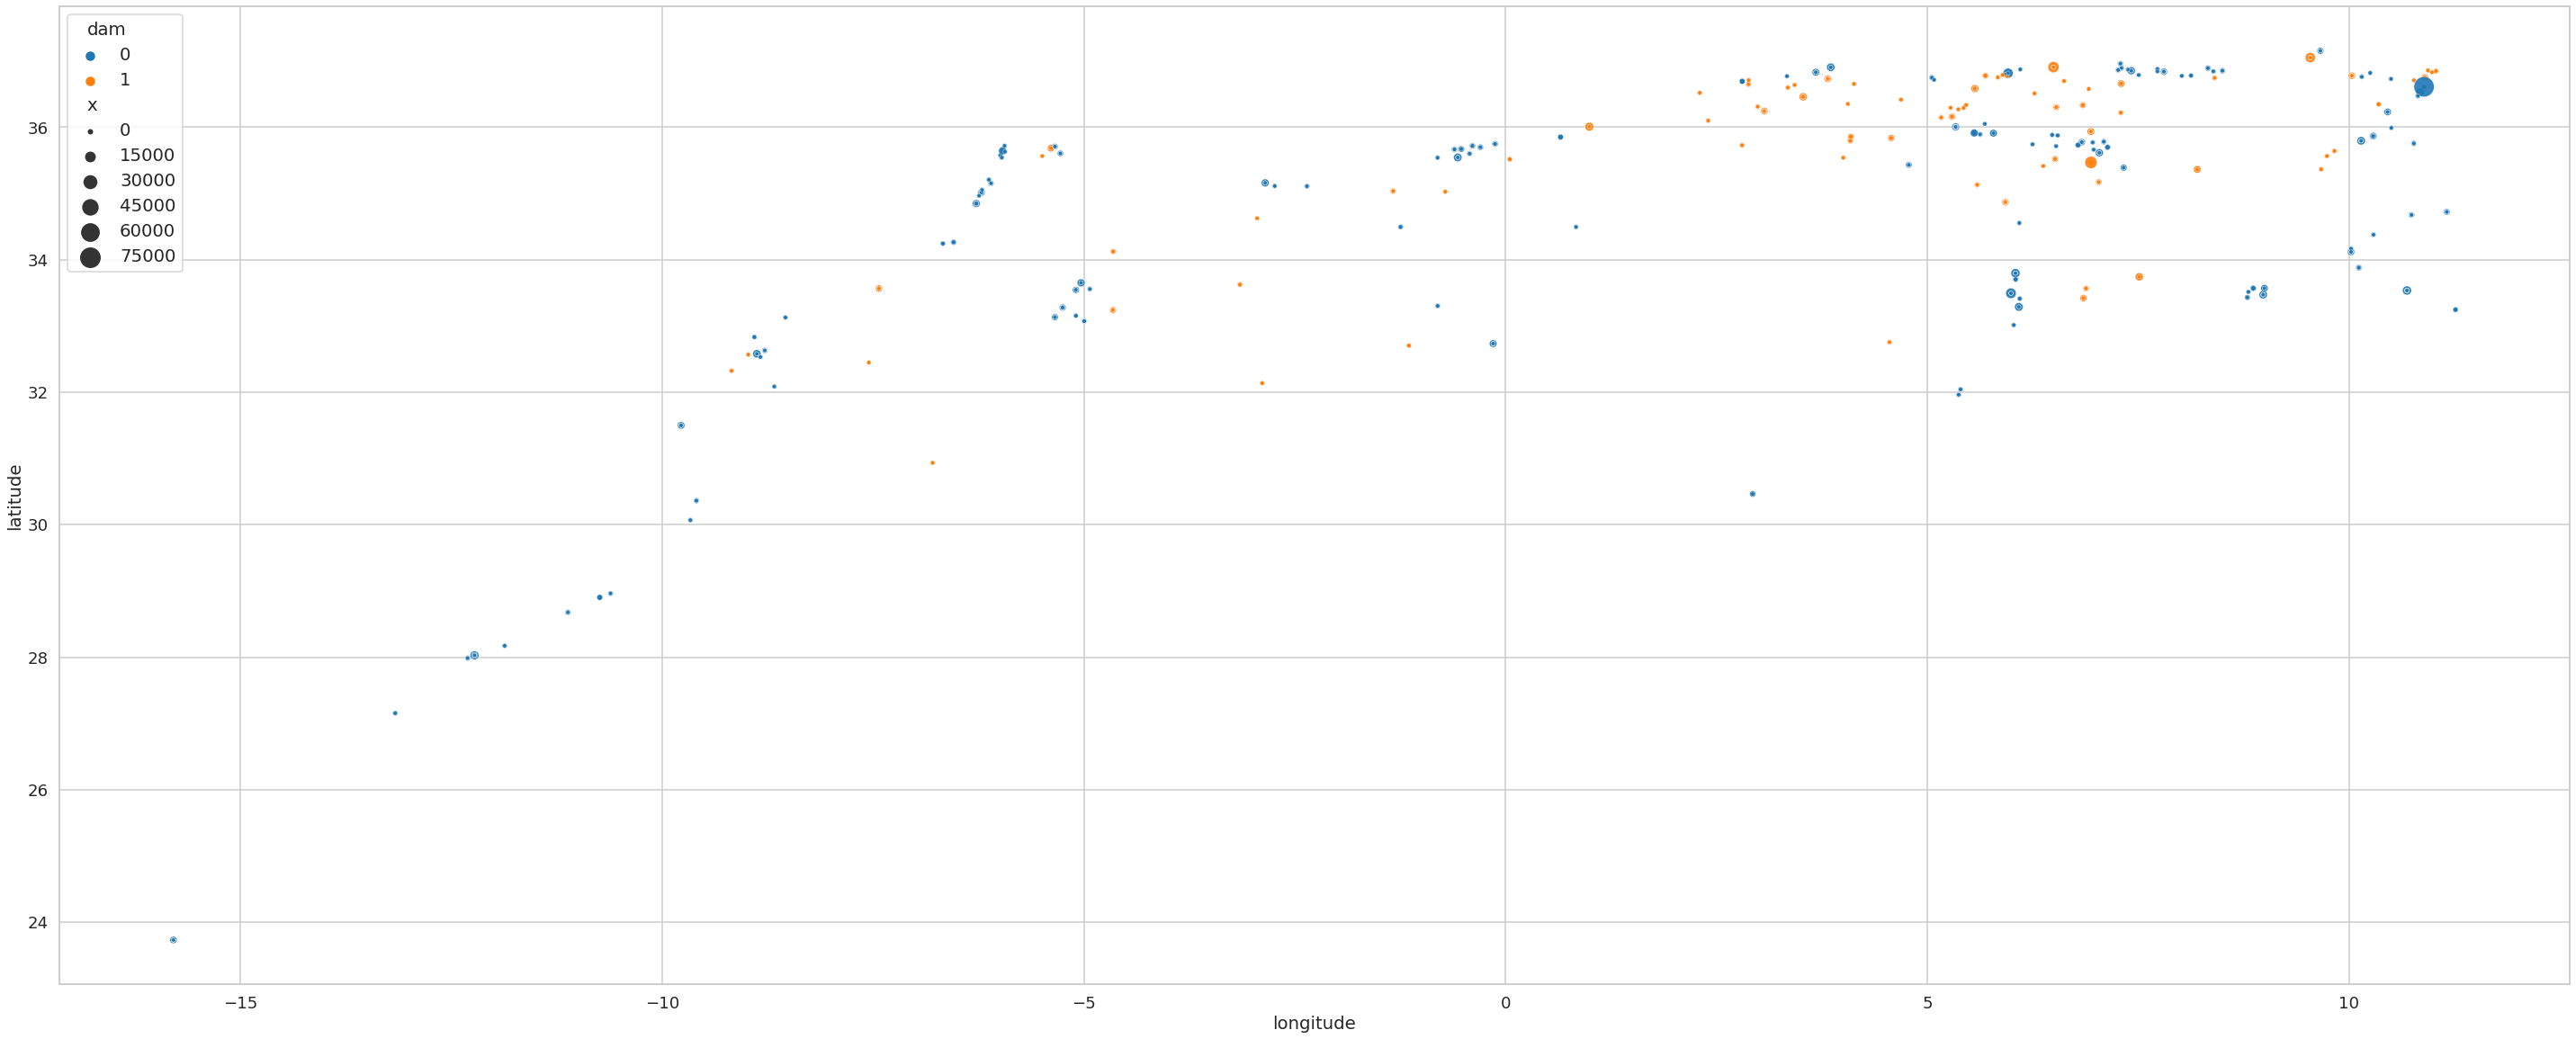

In [ ]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'dam' , data = data, size='x' , sizes=(20,500) , alpha=0.9)

Information about whether or not the site is a dam

<Figure size 720x432 with 0 Axes>

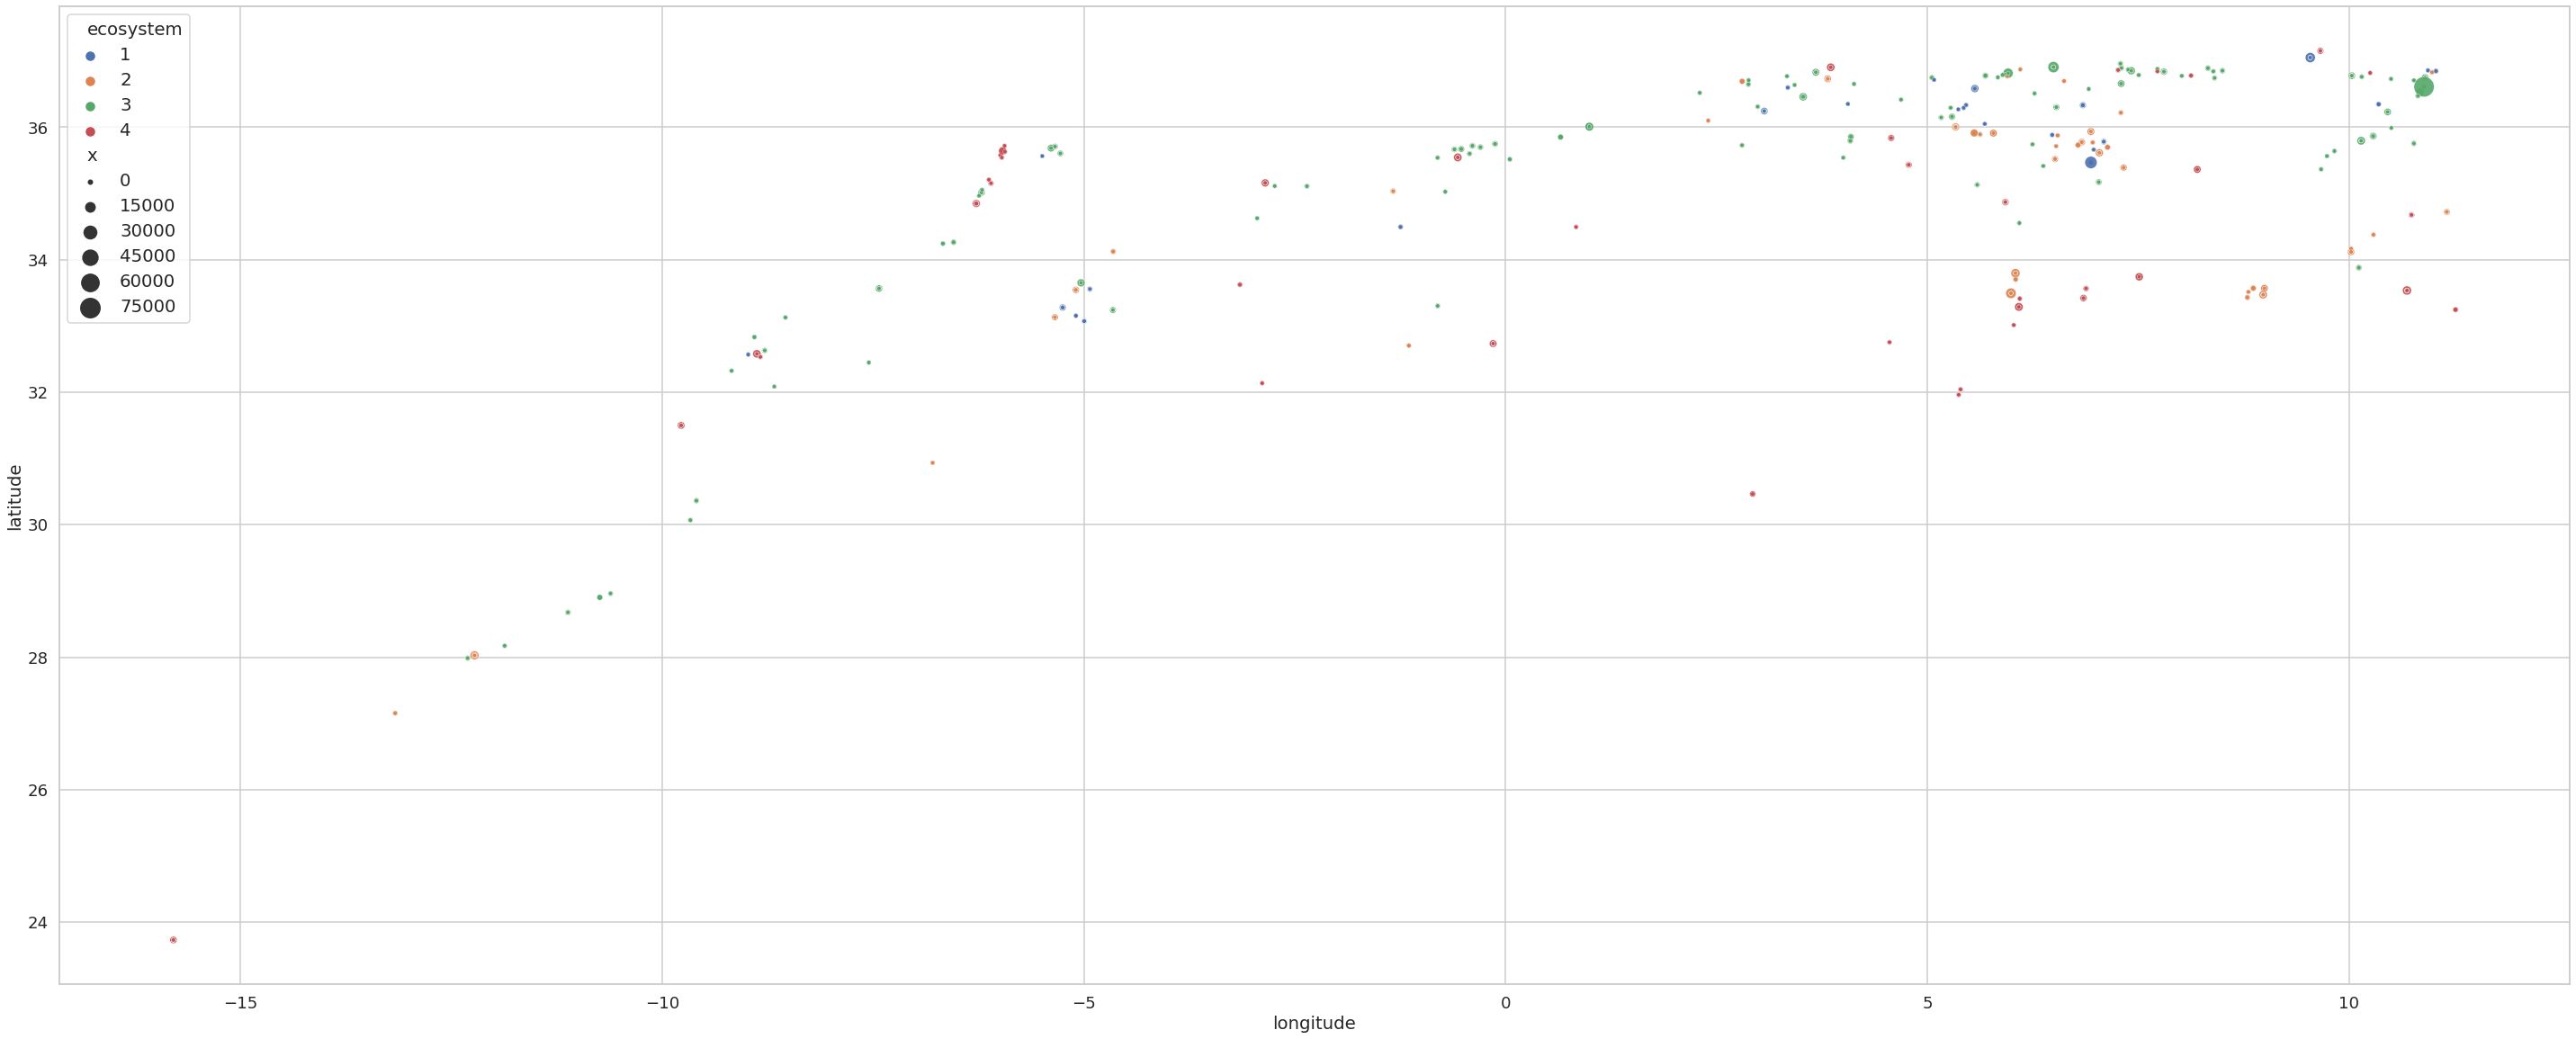

<Figure size 720x432 with 0 Axes>

In [ ]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'ecosystem' , data = data ,  palette="deep" , size='x' , sizes=(20,500) , alpha=0.9)
plt.figure(figsize=(10,6))

Information about how the ecosystems groups are scattered over Algeria and Morocco

In [ ]:
data.head(2)

,algeria,morocco,tunisie,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0


<Figure size 720x432 with 0 Axes>

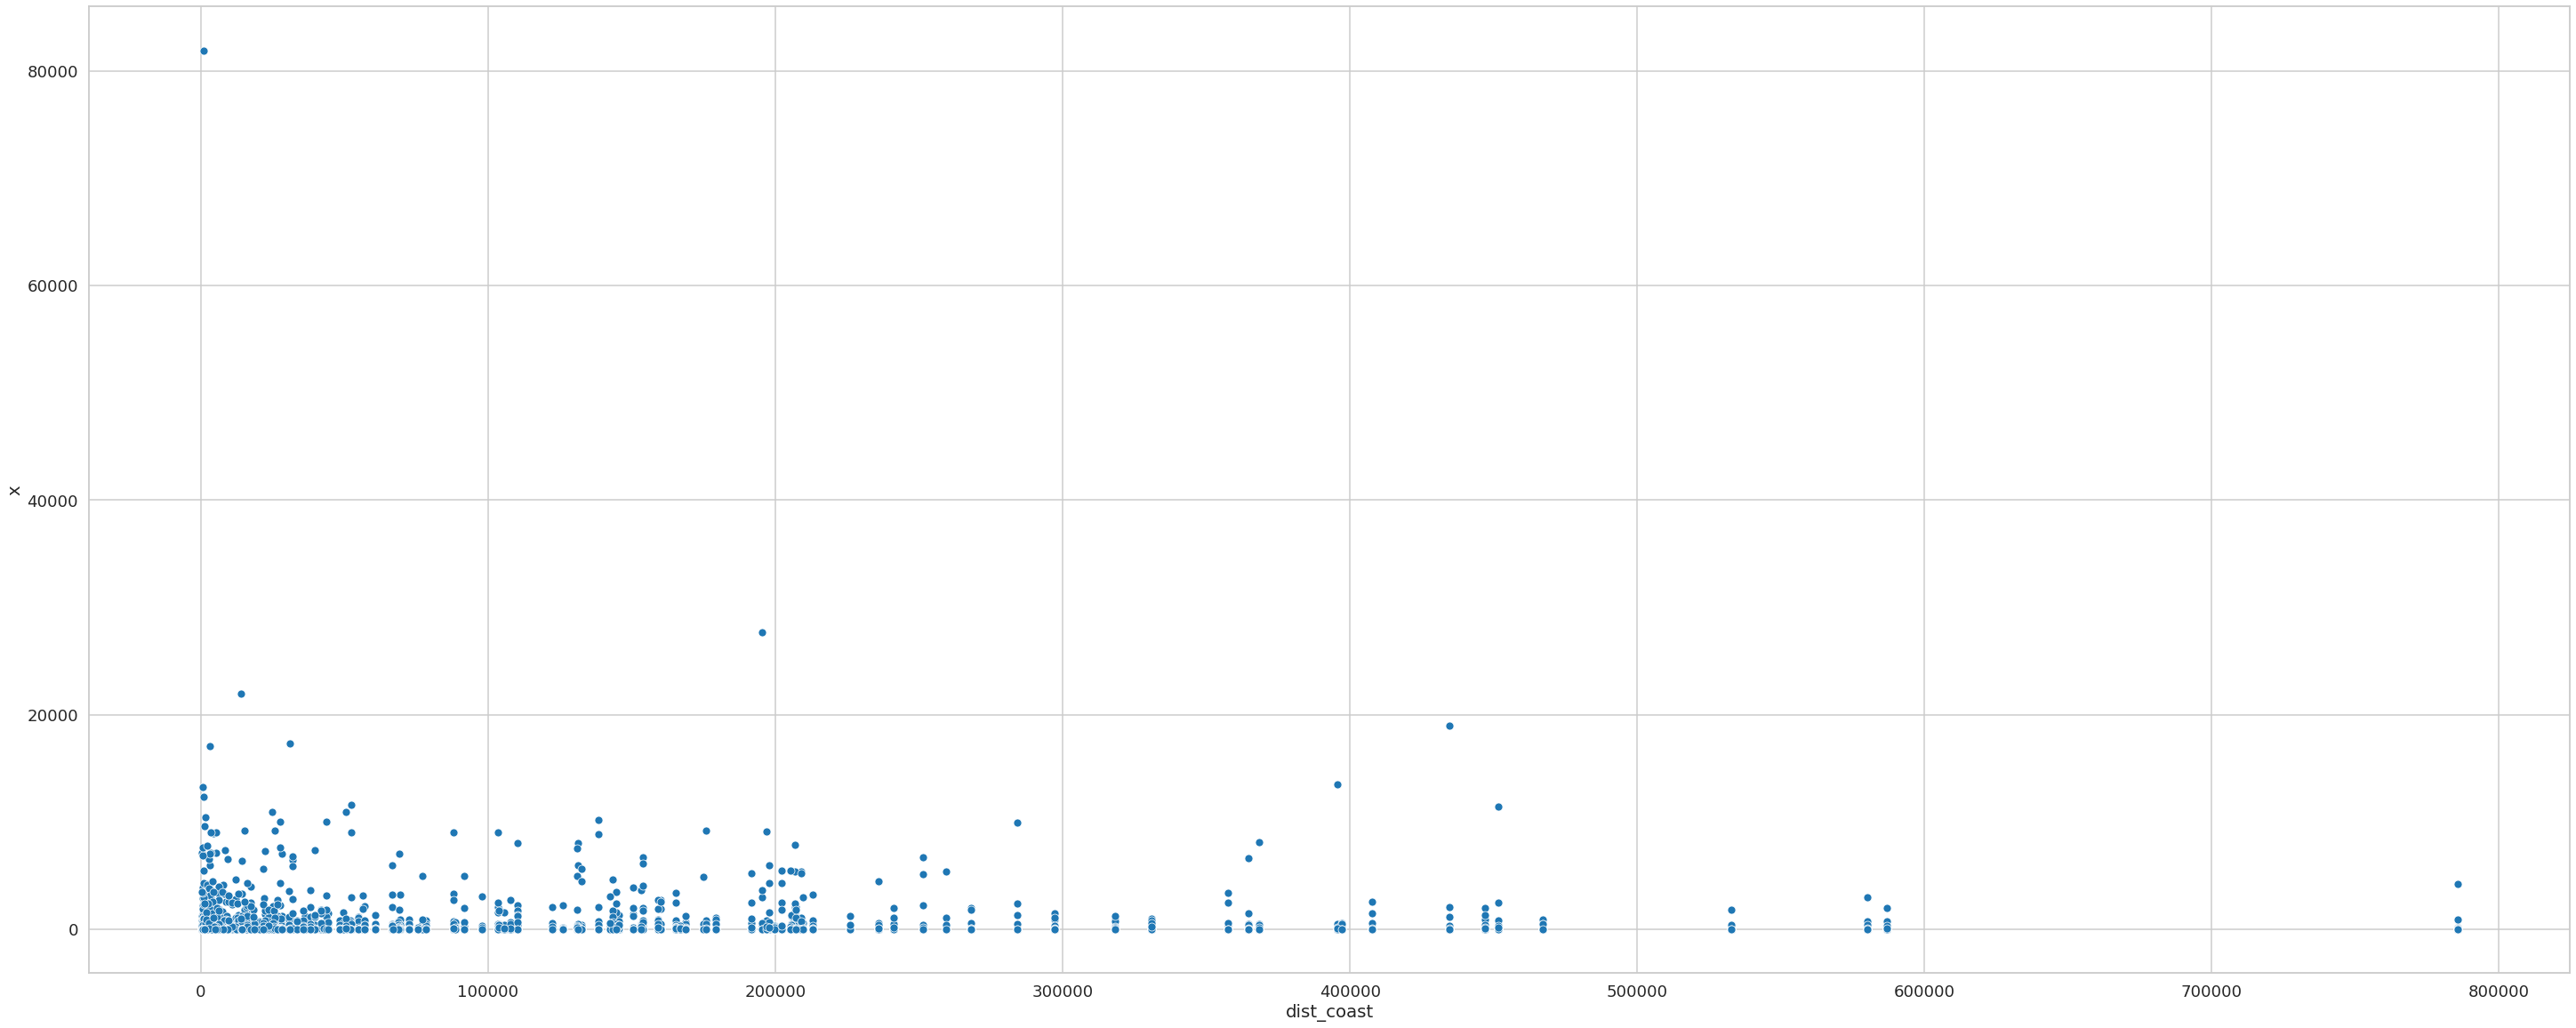

<Figure size 720x432 with 0 Axes>

In [ ]:
# from matplotlib import rcParams
sns.scatterplot(x = 'dist_coast' , y = 'x' , data = data , palette="deep")
plt.figure(figsize=(10,6))
# rcParams['figure.figsize'] = 50,20

<Figure size 720x432 with 0 Axes>

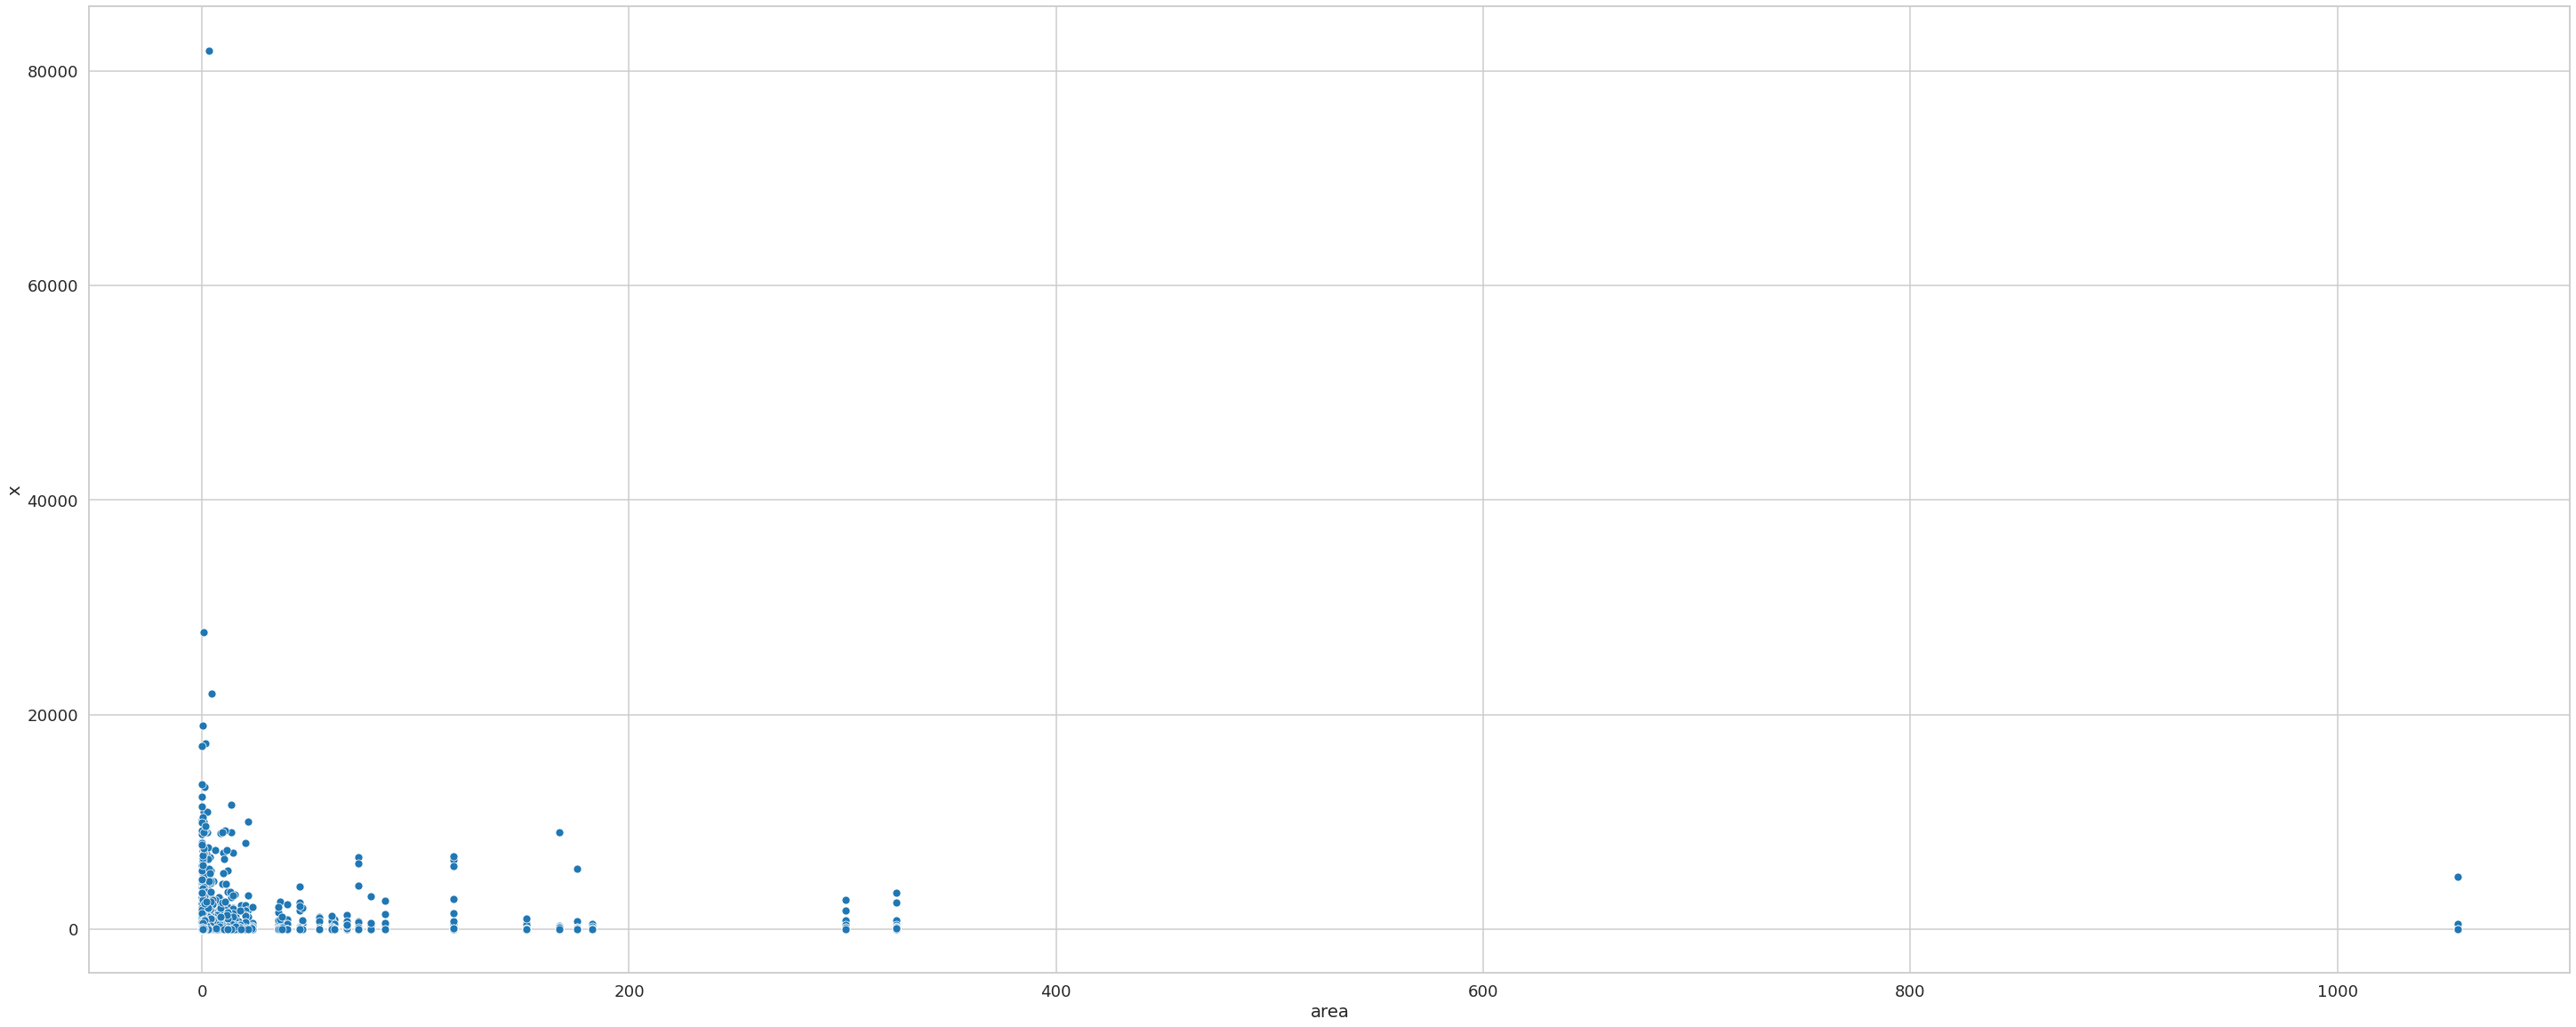

<Figure size 720x432 with 0 Axes>

In [ ]:
# from matplotlib import rcParams
sns.scatterplot(x = 'area' , y = 'x' , data = data , palette="deep")
# rcParams['figure.figsize'] = 50,20
plt.figure(figsize=(10,6))


In [ ]:
data.head(2)

,algeria,morocco,tunisie,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0


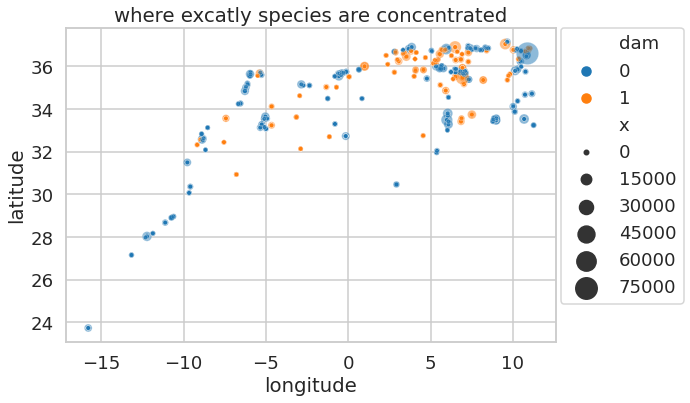

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x="longitude", 
                y="latitude",
                size="x",
                sizes=(20,500),
                alpha=0.5,
                hue= 'dam',
                data=data)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("where excatly species are concentrated")
plt.tight_layout()

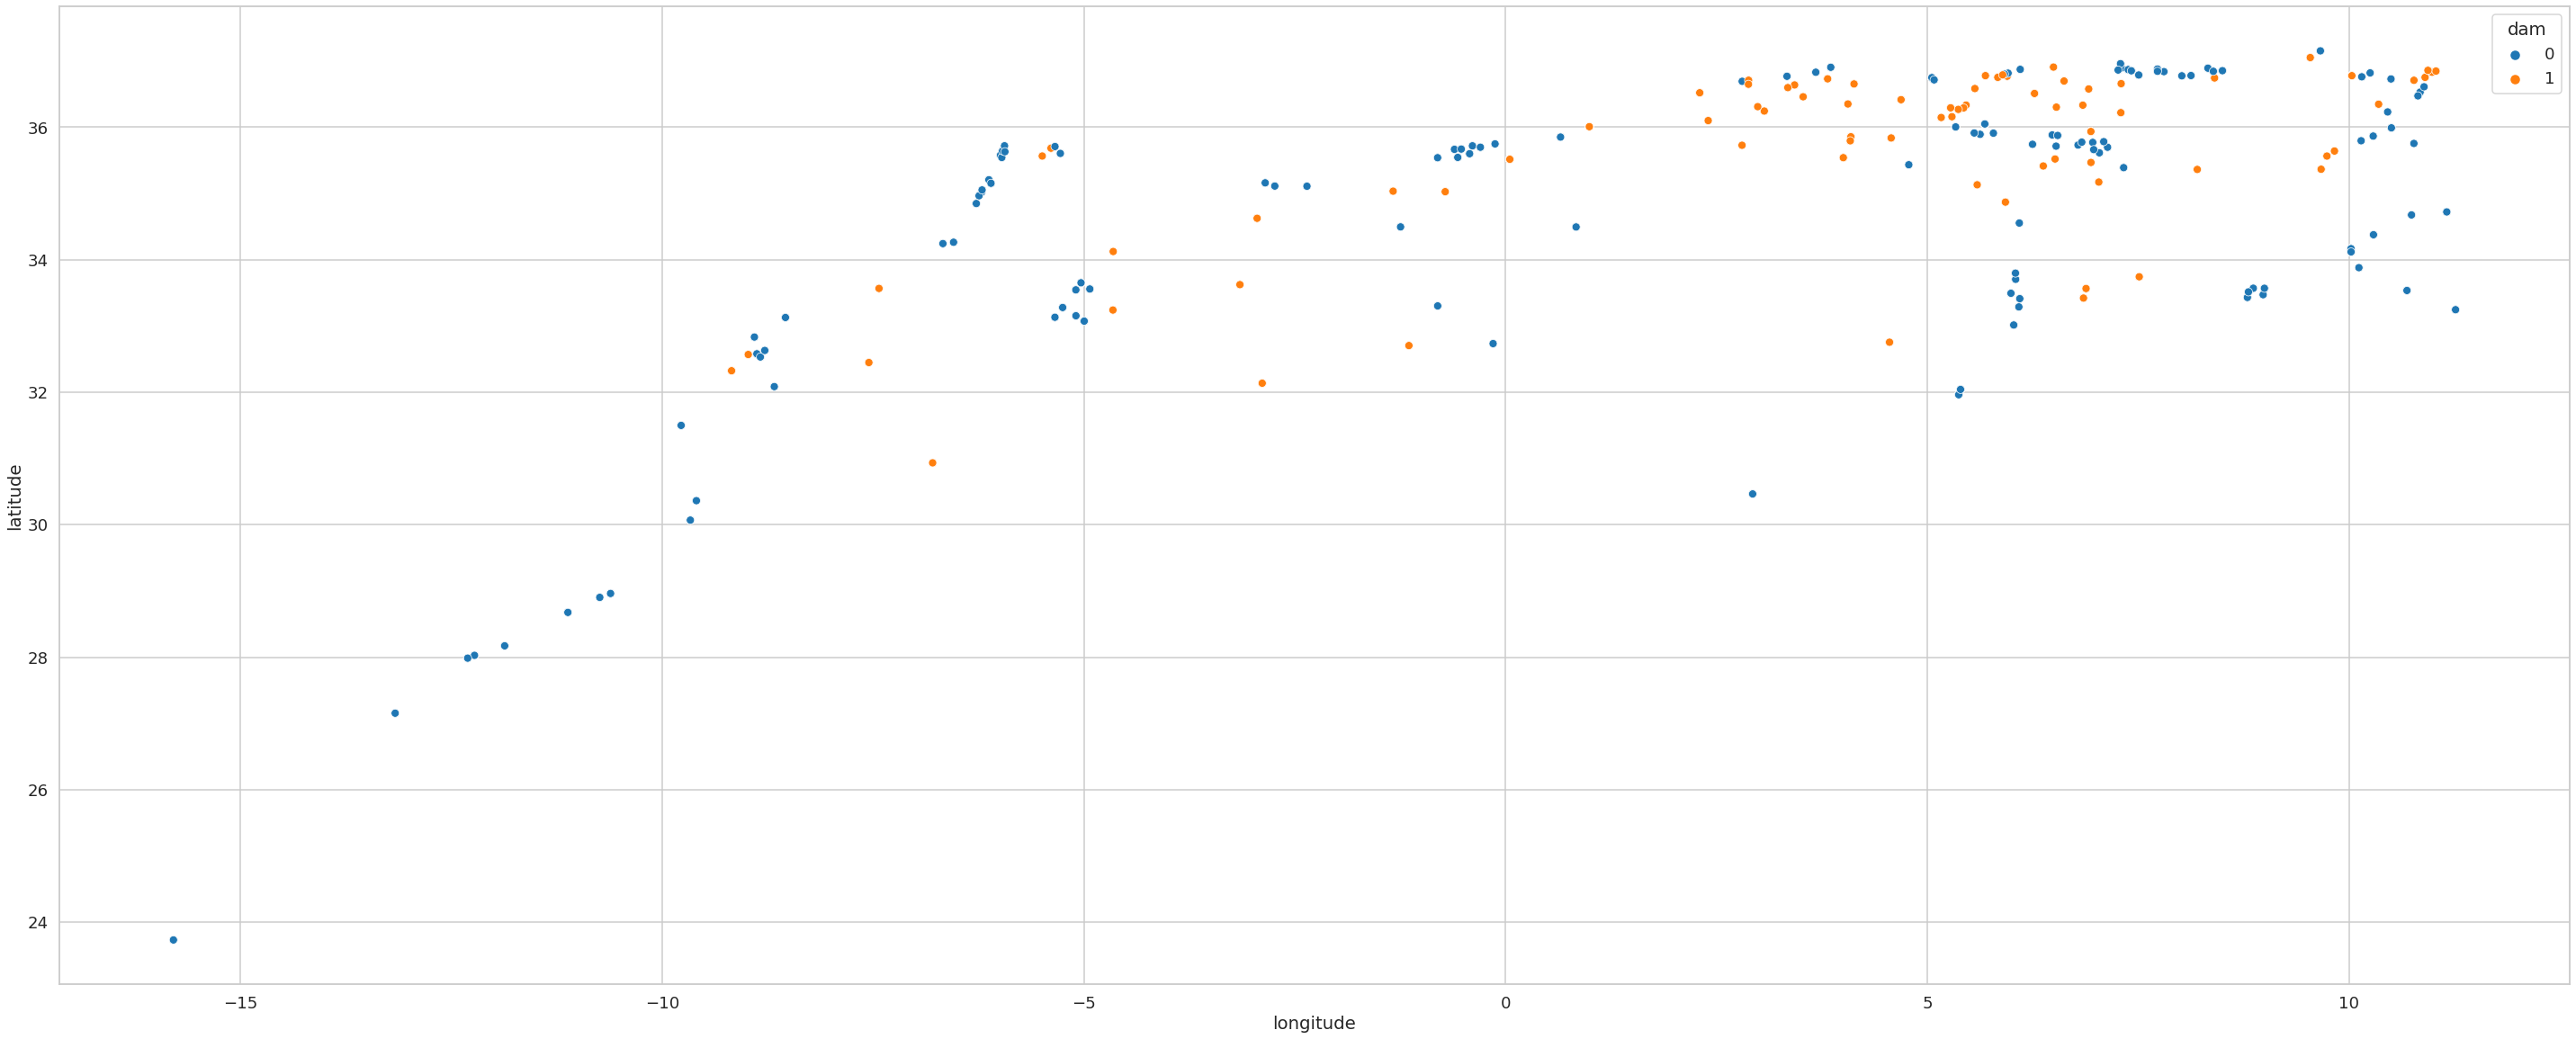

In [ ]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'dam' , data = data)

In [ ]:
np.round(data.ecosystem.value_counts()/data.shape[0]*100 , 2)

3    48.28
2    20.06
4    19.66
1    12.00
Name: ecosystem, dtype: float64

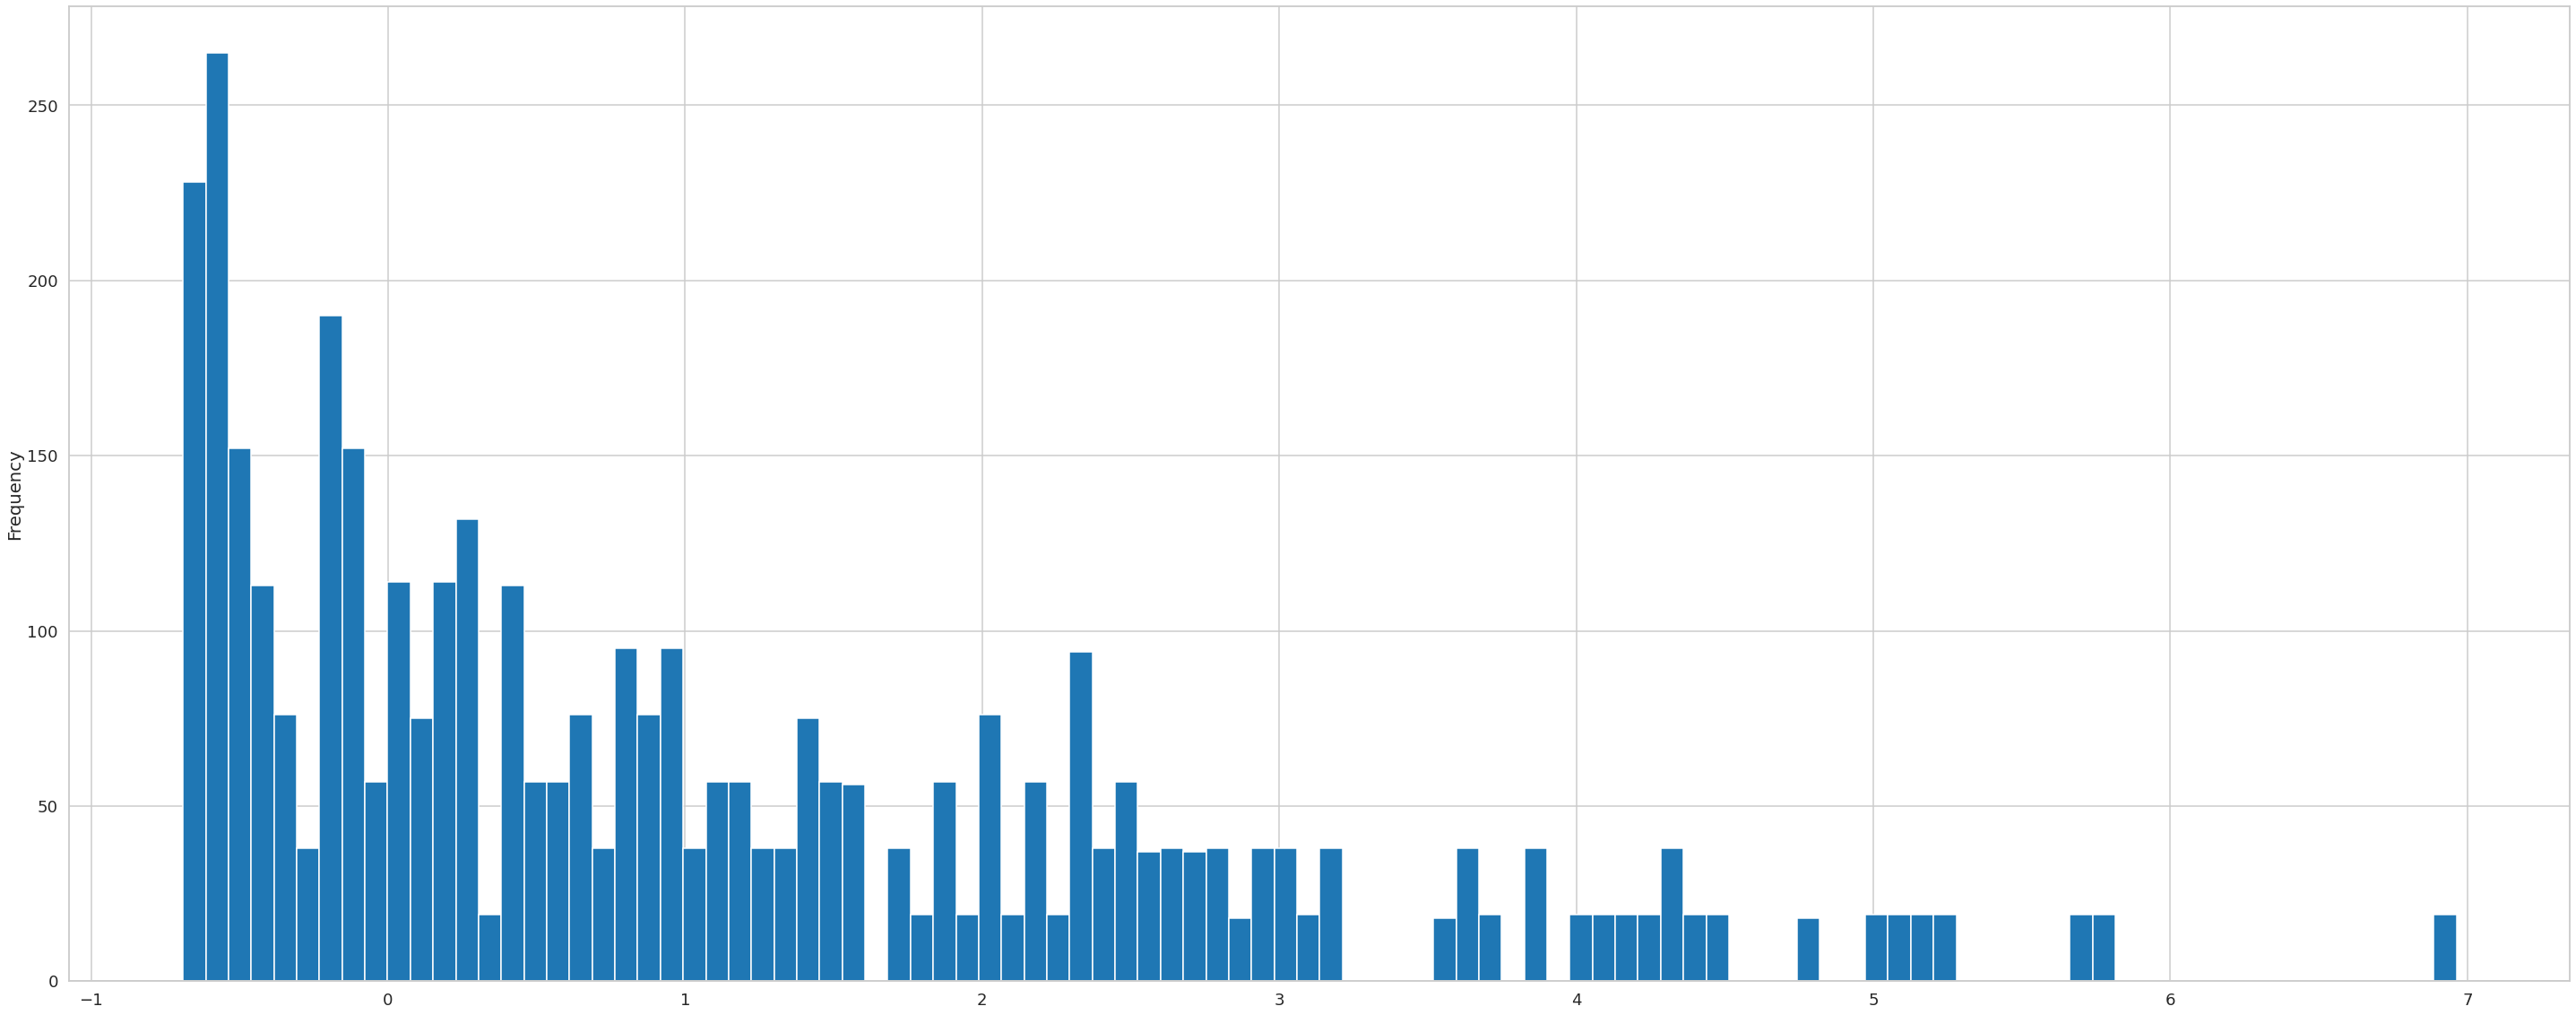

In [ ]:
data.area.apply(lambda x : np.log(x + 0.5)).plot(kind='hist' , bins=100)

Distribution of Algeria:


<Figure size 720x432 with 0 Axes>

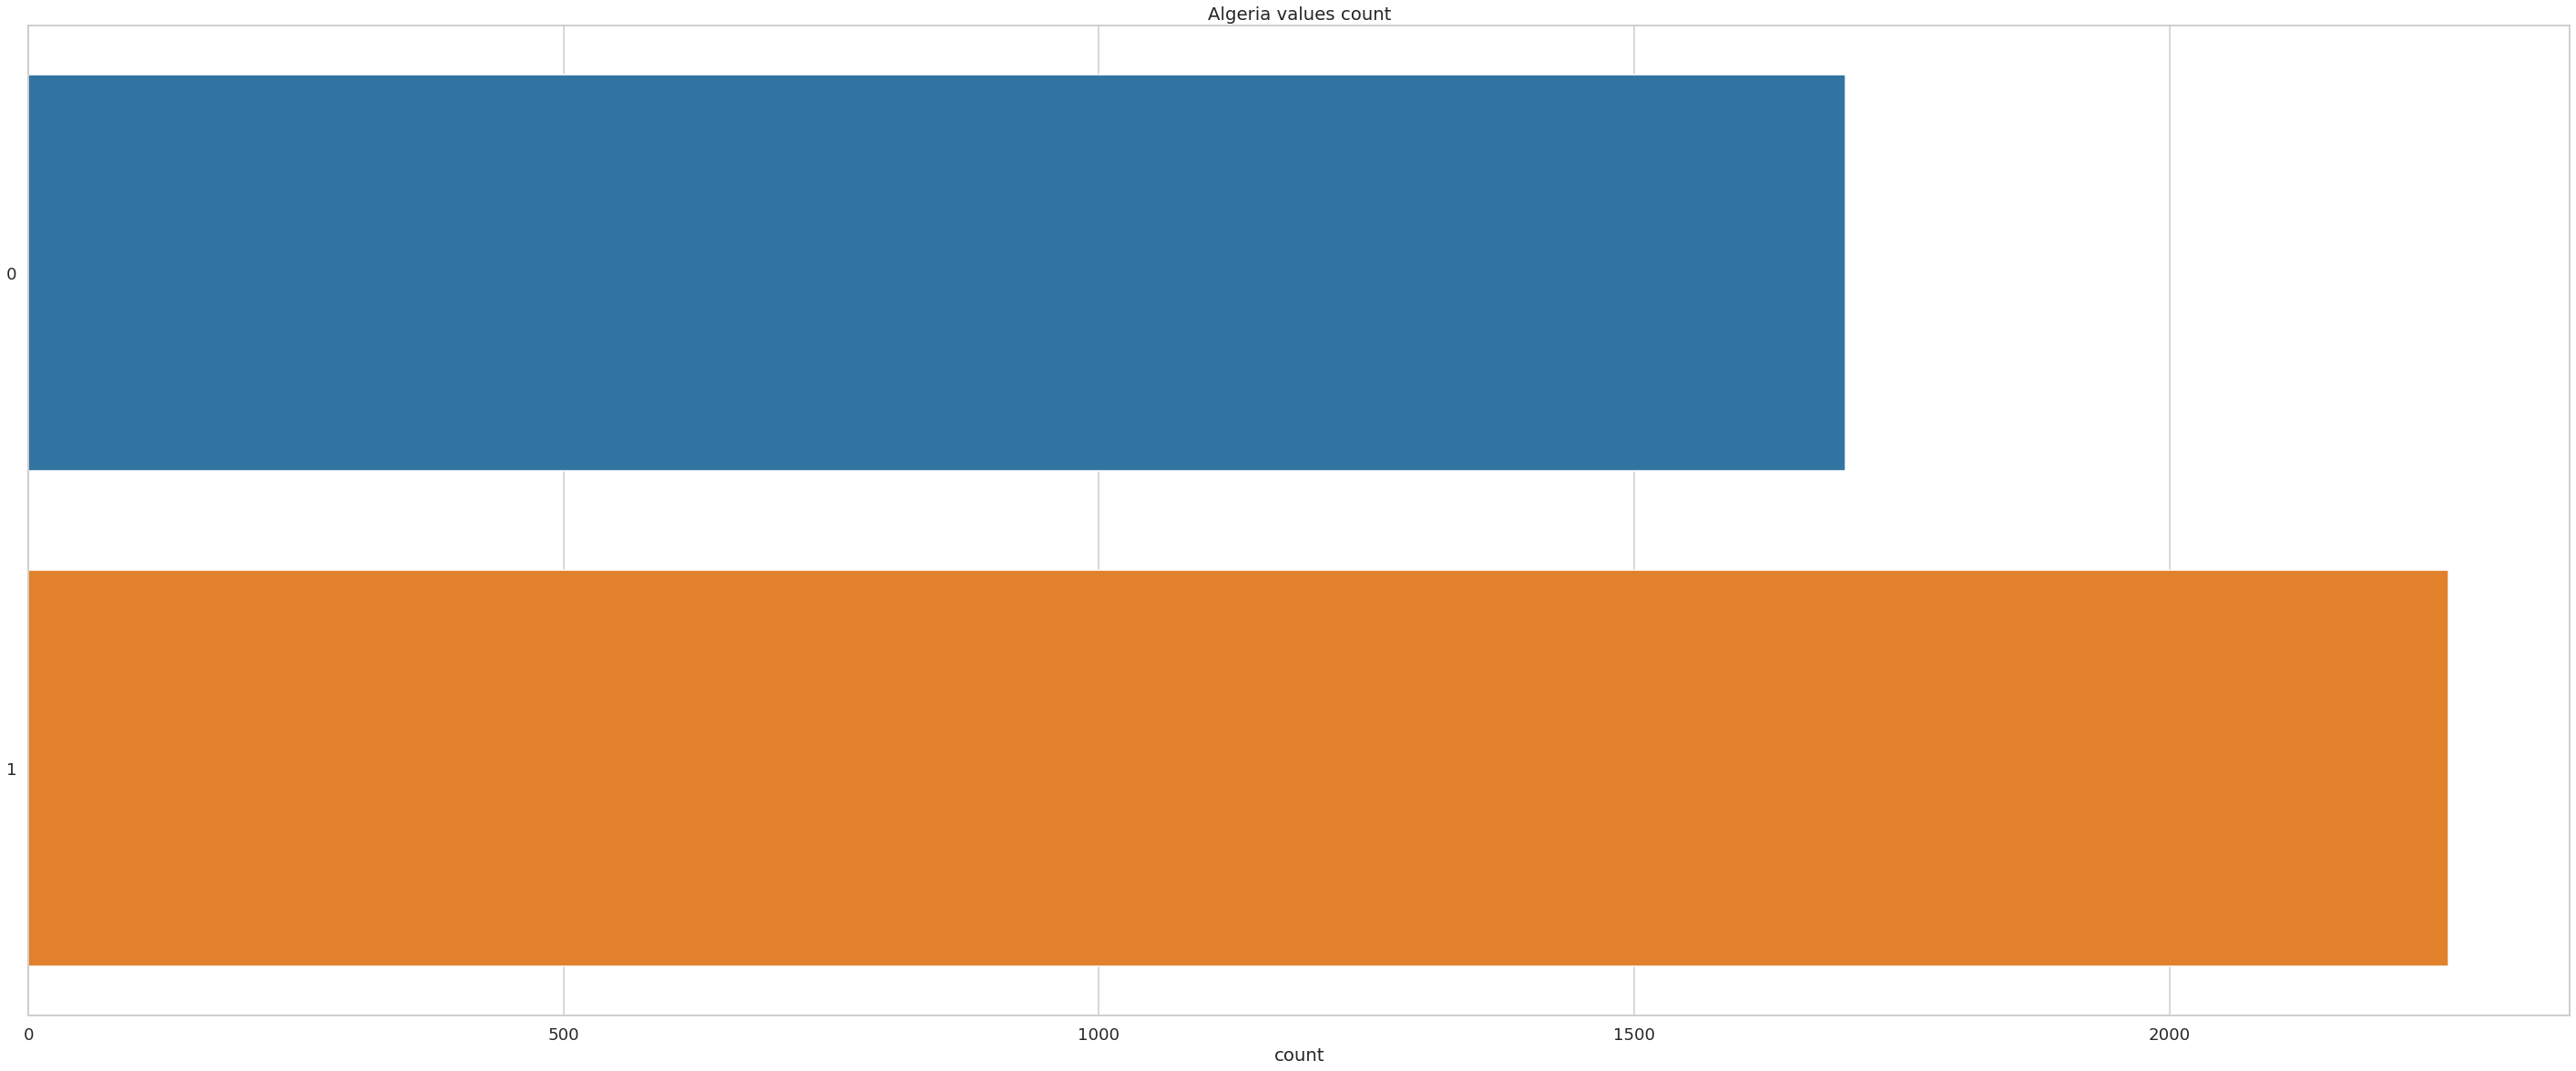

<Figure size 720x432 with 0 Axes>

In [ ]:
ax = sns.countplot(y=data.algeria.values).set(title='Algeria values count')

print('Distribution of Algeria:')
np.round(data.algeria.value_counts()/data.shape[0] , 3)
plt.figure(figsize=(10,6))

Distrubition of Morocco


0    0.741
1    0.259
Name: morocco, dtype: float64

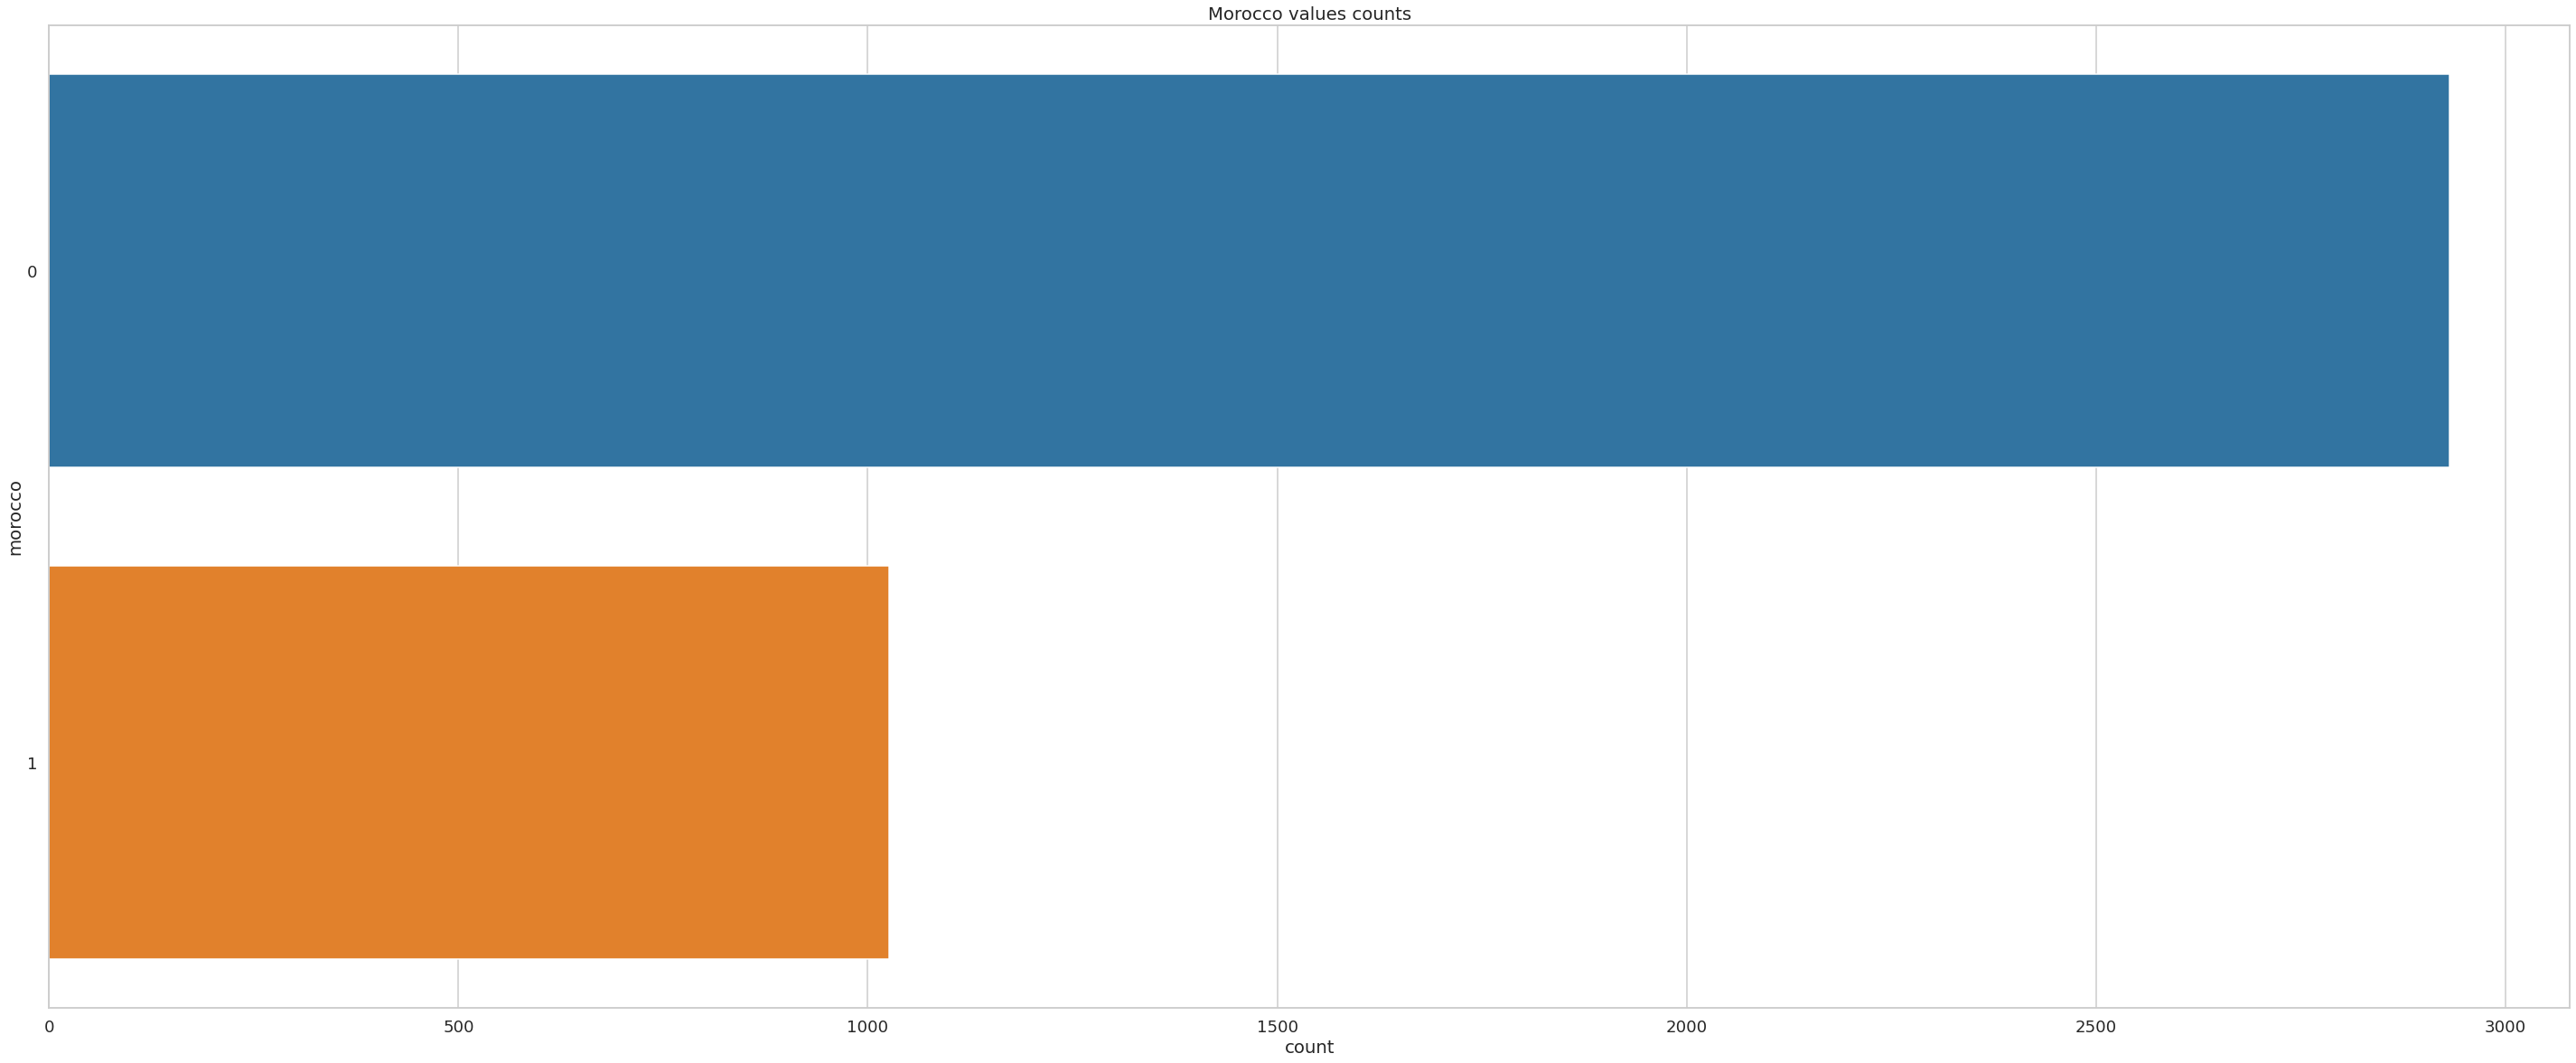

In [ ]:
ax = sns.countplot(y=data.morocco).set(title = 'Morocco values counts')

print('Distrubition of Morocco')
np.round(data.morocco.value_counts()/data.shape[0] , 3)

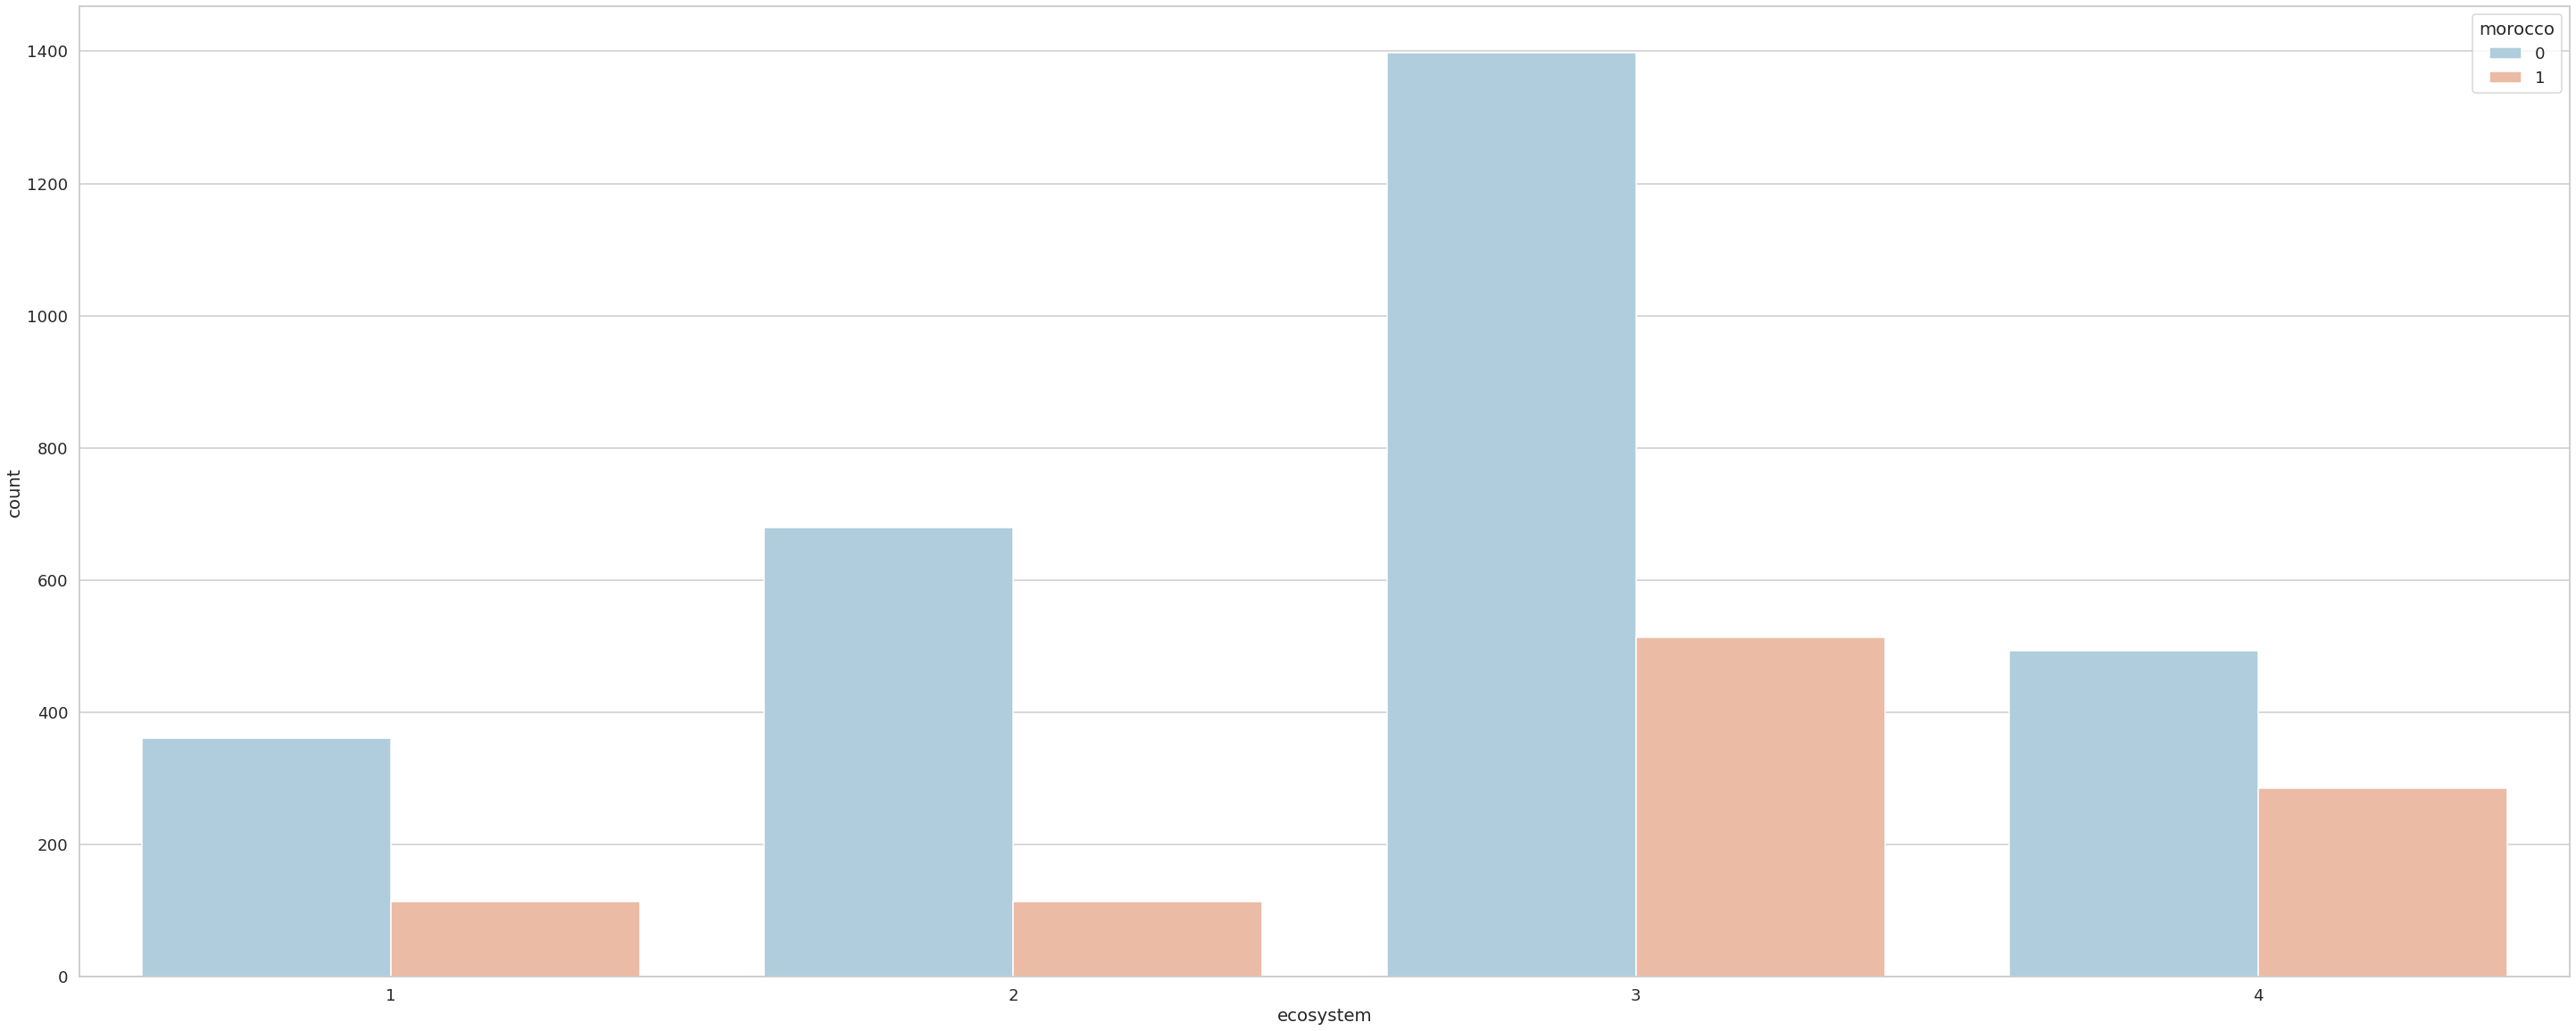

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='ecosystem' ,hue='morocco',data=data ,palette='RdBu_r')

In [ ]:
data.head()

,algeria,morocco,tunisie,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0
2,1,0,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474,4
3,1,0,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919,0
4,1,0,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043,0


In [ ]:
data.columns

Index(['algeria', 'morocco', 'tunisie', 'latitude', 'longitude', 'alt',
       'dist_towns', 'dist_coast', 'area', 'ecosystem', 'dam', 'year',
       'anomalies_t_print_NW', 'anomalies_print_NE', 'anomalies_hiv_SW',
       'anomalies_hiv_SE', 'p_NW_Europe', 'p_NE_Europe', 'NAO', 'rain',
       'economy', 'agri', 'x'],
      dtype='object')

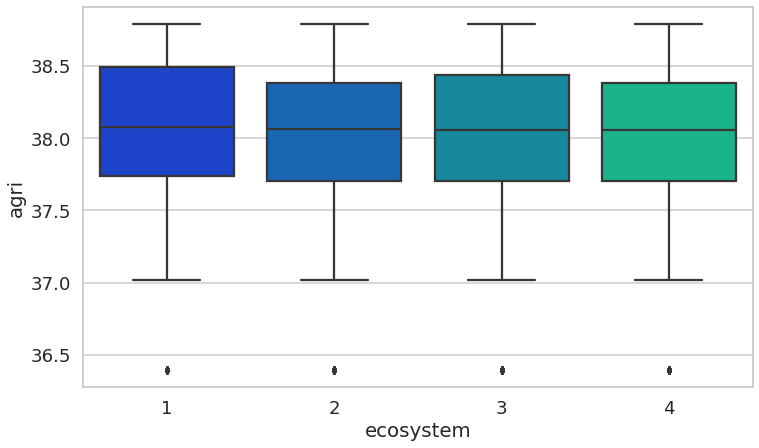

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='ecosystem',y='agri',data=data,palette='winter')

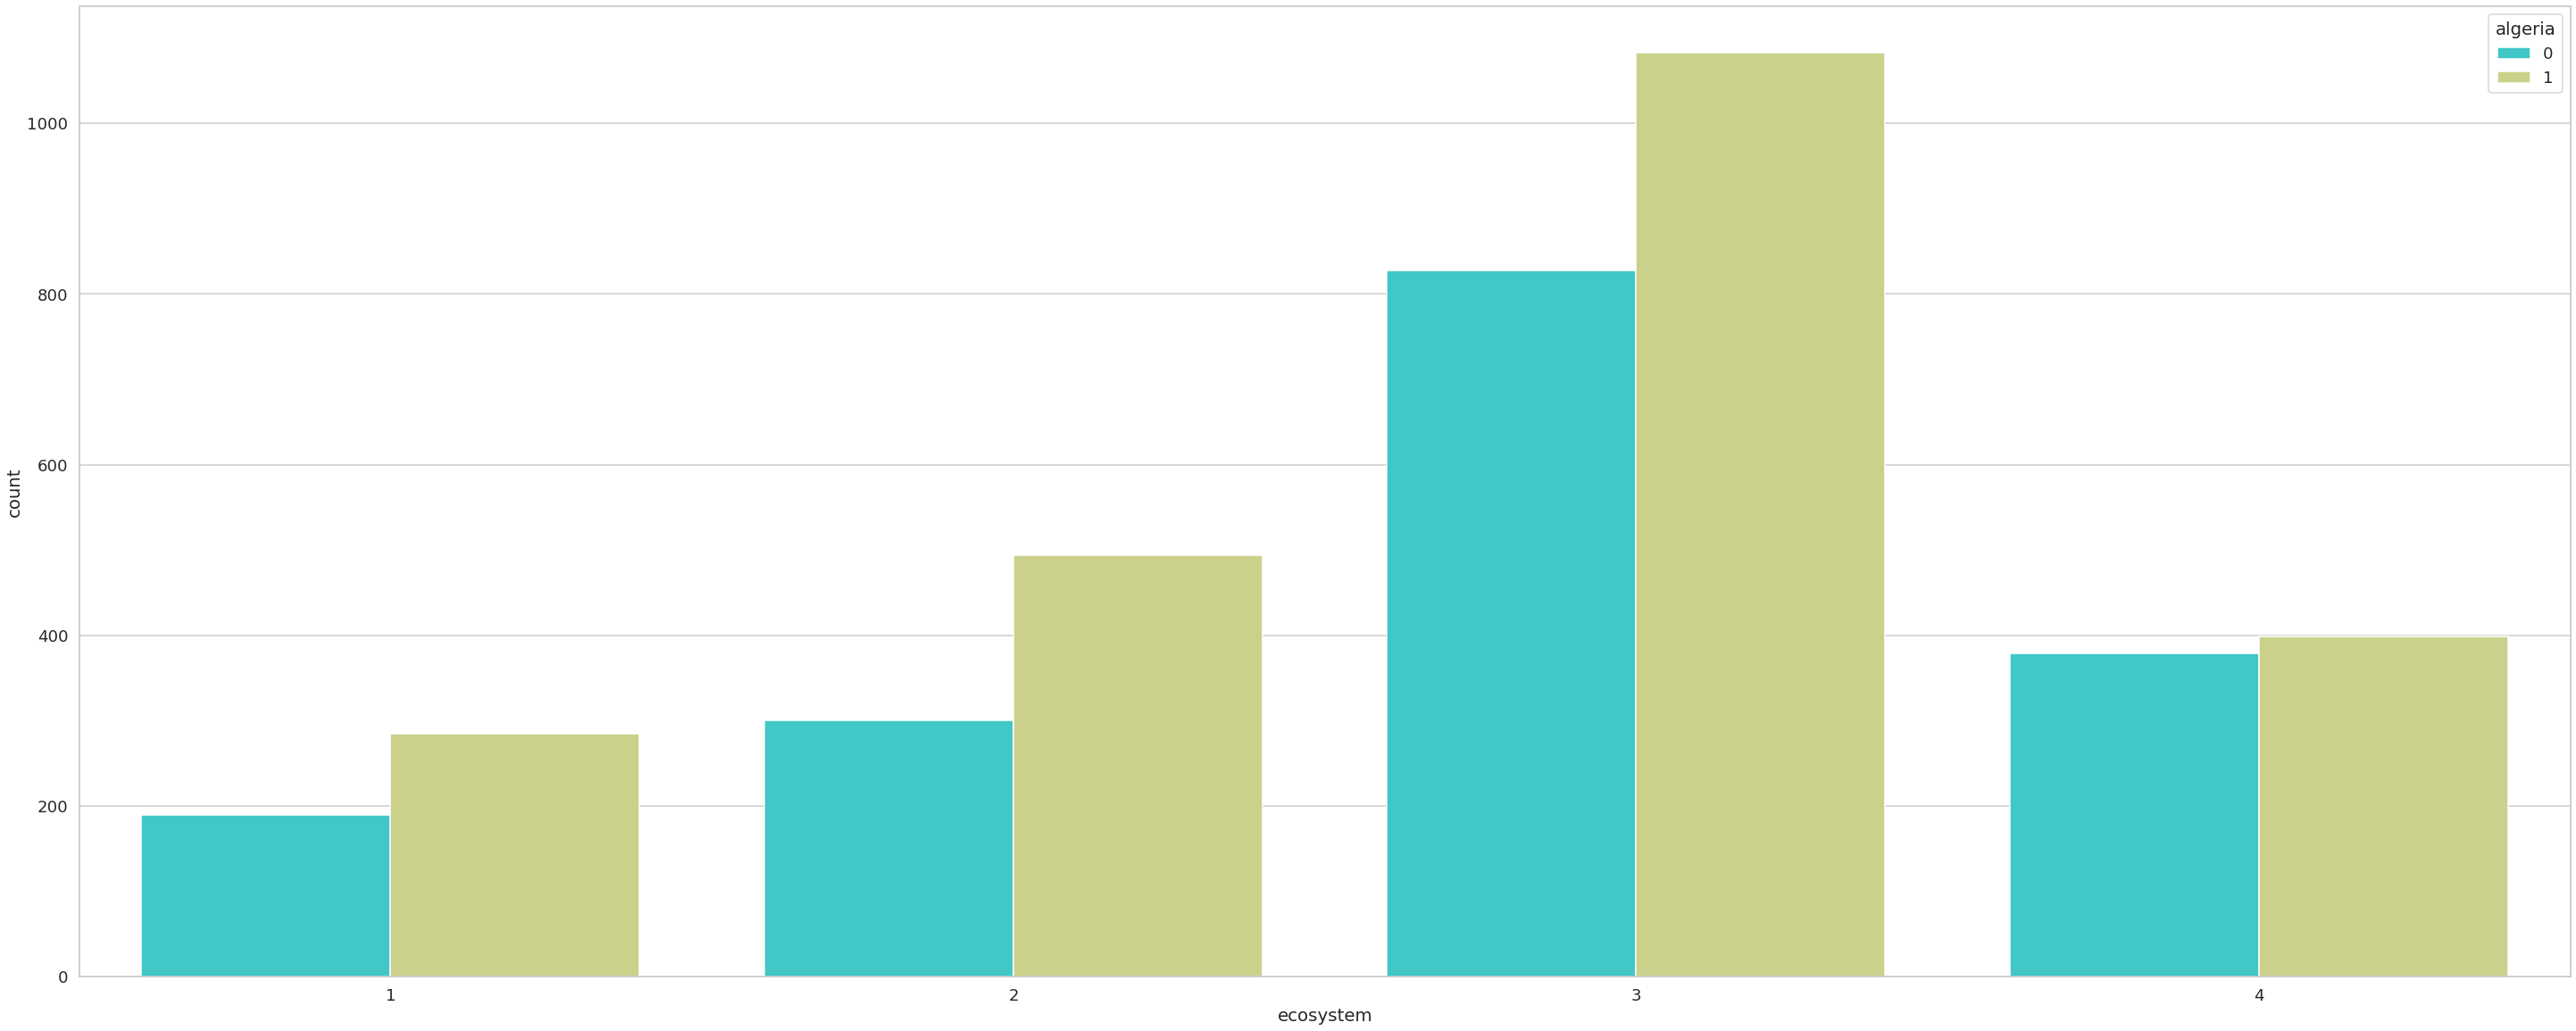

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='ecosystem' ,hue='algeria',data=data ,palette='rainbow')

In [ ]:
data.x.value_counts(dropna=False)

0        1891
10         39
2          37
50         37
6          35
         ... 
655         1
5600        1
22000       1
1538        1
2039        1
Name: x, Length: 682, dtype: int64

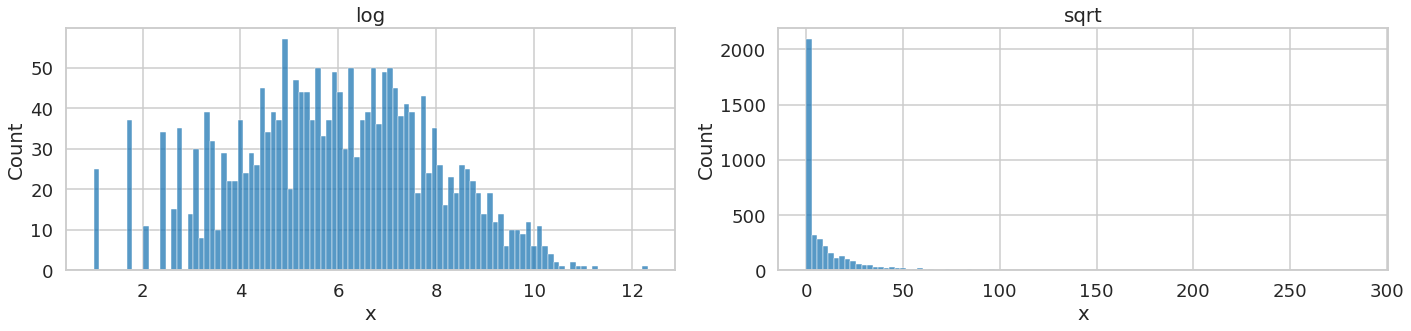

In [ ]:
f , axes = plt.subplots(1,2, figsize=(20,5))
#log transformation seems to be the best
sns.histplot(data.x.apply(lambda x : np.log(x) + 1) , bins = 100, ax=axes[0]).set(title = 'log')
sns.histplot(np.sqrt(data.x) , bins = 100, ax=axes[1]).set(title = 'sqrt')


f.tight_layout()

We perceive a high skewness toward the target variable, so we do need to lessen this skewness for our favor in data modeling

In [ ]:
data.skew(axis = 0, skipna = True)

algeria                 -0.288040
morocco                  1.099340
tunisie                  1.762143
latitude                -1.959614
longitude               -0.745529
alt                      1.527660
dist_towns               4.980505
dist_coast               2.157059
area                    10.054473
ecosystem               -0.474812
dam                      0.519101
year                     0.001542
anomalies_t_print_NW     0.031096
anomalies_print_NE      -0.641234
anomalies_hiv_SW         0.464906
anomalies_hiv_SE         0.423017
p_NW_Europe              0.455744
p_NE_Europe              1.109352
NAO                     -0.344673
rain                     0.503426
economy                 -0.138692
agri                    -0.908148
x                       22.846962
dtype: float64

In [ ]:
data.head()

,algeria,morocco,tunisie,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0
2,1,0,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474,4
3,1,0,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919,0
4,1,0,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043,0


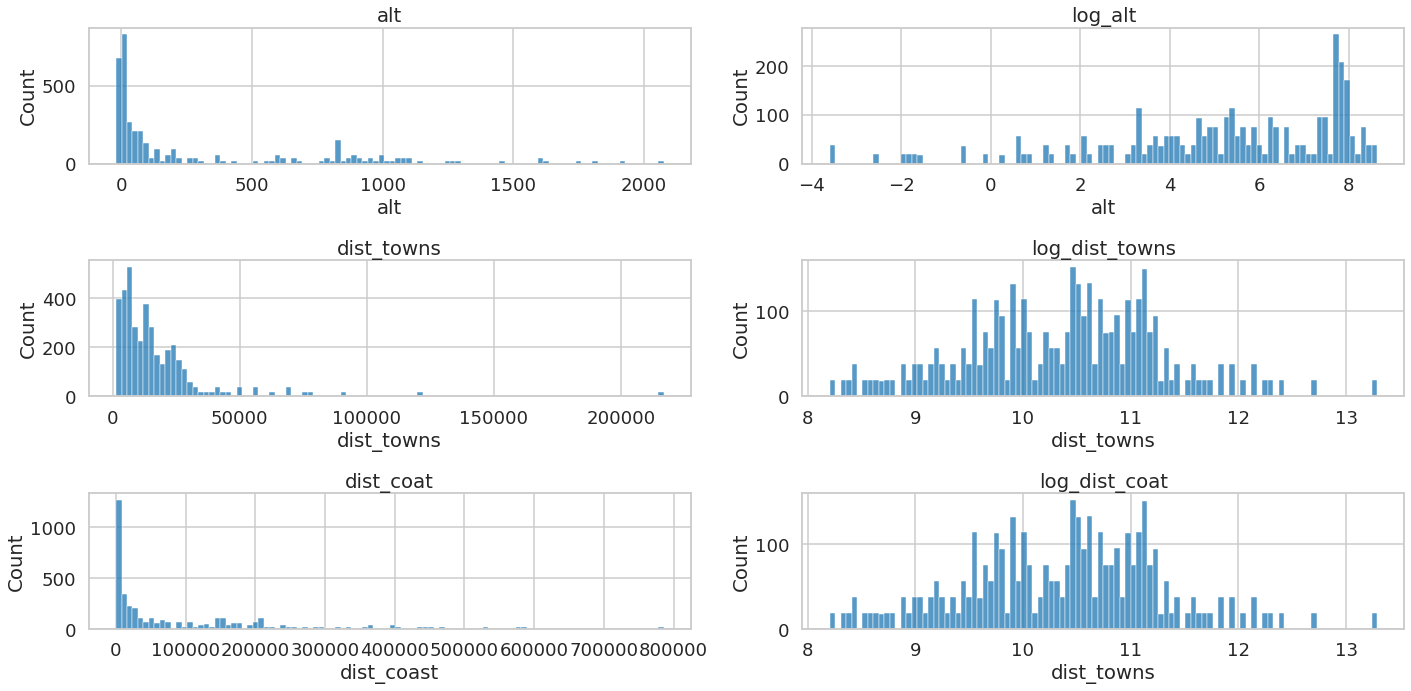

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(20,10))
# epsilon = 0.01

sns.histplot(data.alt, bins = 100, ax=axes[0][0]).set(title='alt')
sns.histplot(data.alt.apply(lambda x : np.log(x) + 1), bins = 100, ax=axes[0][1]).set(title='log_alt')

sns.histplot(data.dist_towns, bins = 100, ax=axes[1][0]).set(title='dist_towns')
sns.histplot(data.dist_towns.apply(lambda x : np.log(x) + 1), bins = 100, ax=axes[1][1]).set(title='log_dist_towns')

sns.histplot(data.dist_coast,  bins = 100, ax=axes[2][0]).set(title='dist_coat')
sns.histplot(data.dist_towns.apply(lambda x : np.log(x) + 1),  bins = 100, ax=axes[2][1]).set(title='log_dist_coat')

f.tight_layout()

For the case of alt we do have a left skewness that refers to the fact that the median is bigger than the mean thing the we will be handling using 

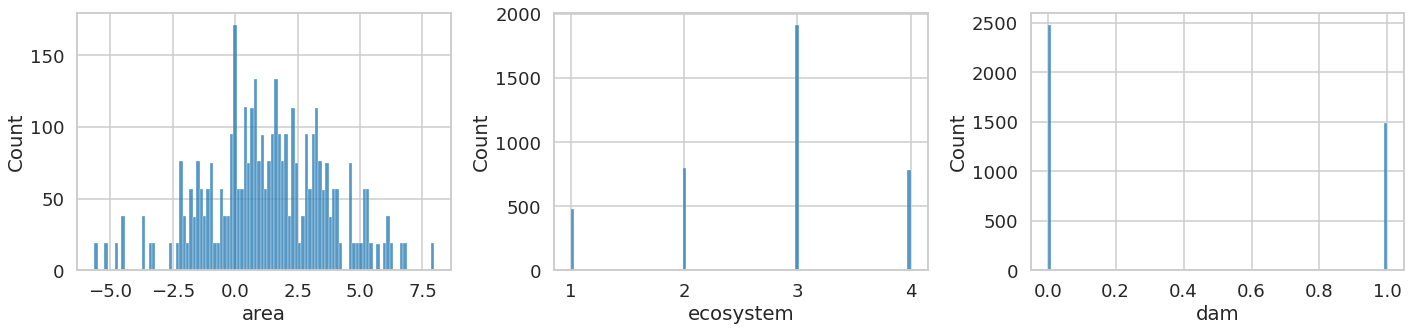

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.area.apply(lambda x : np.log(x) + 1), bins = 100, ax=axes[0])
sns.histplot(data.ecosystem, bins = 100, ax=axes[1])
sns.histplot(data.dam,  bins = 100, ax=axes[2])

f.tight_layout()

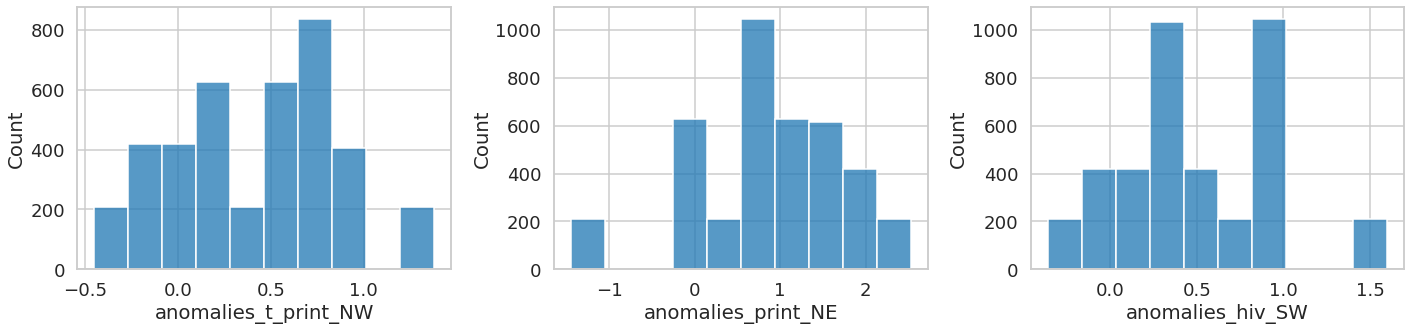

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.anomalies_t_print_NW, bins = 10, ax=axes[0])
sns.histplot(data.anomalies_print_NE,  bins = 10, ax=axes[1])
sns.histplot(data.anomalies_hiv_SW,  bins = 10, ax=axes[2])

f.tight_layout()

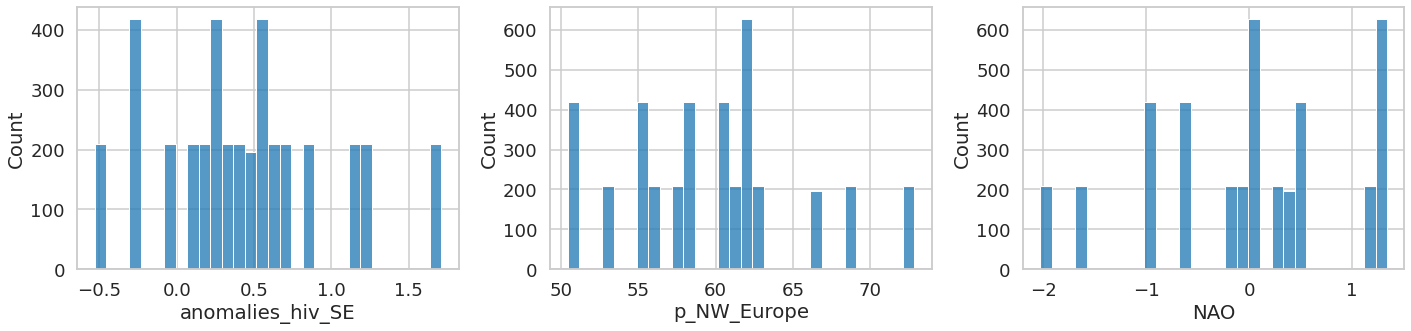

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.anomalies_hiv_SE, bins = 30, ax=axes[0])
sns.histplot(data.p_NW_Europe,  bins = 30, ax=axes[1])
sns.histplot(data.NAO,  bins = 30, ax=axes[2])

f.tight_layout()

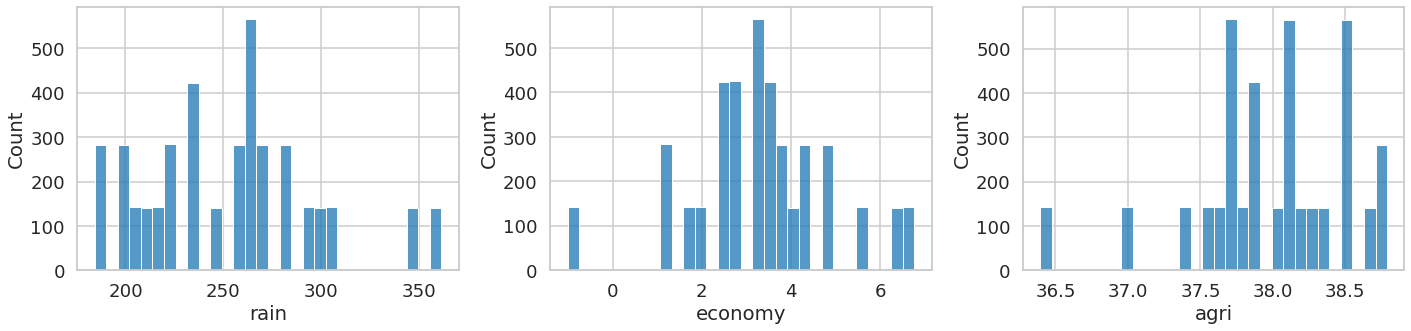

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.rain, bins = 30, ax=axes[0])
sns.histplot(data.economy,  bins = 30, ax=axes[1])
sns.histplot(data.agri,  bins = 30, ax=axes[2])

f.tight_layout()

In [ ]:
data.x

0           2
1           0
2           4
3           0
4           0
        ...  
3953    81950
3954     1720
3955        4
3956       58
3957        0
Name: x, Length: 3958, dtype: int64

#Data correlation

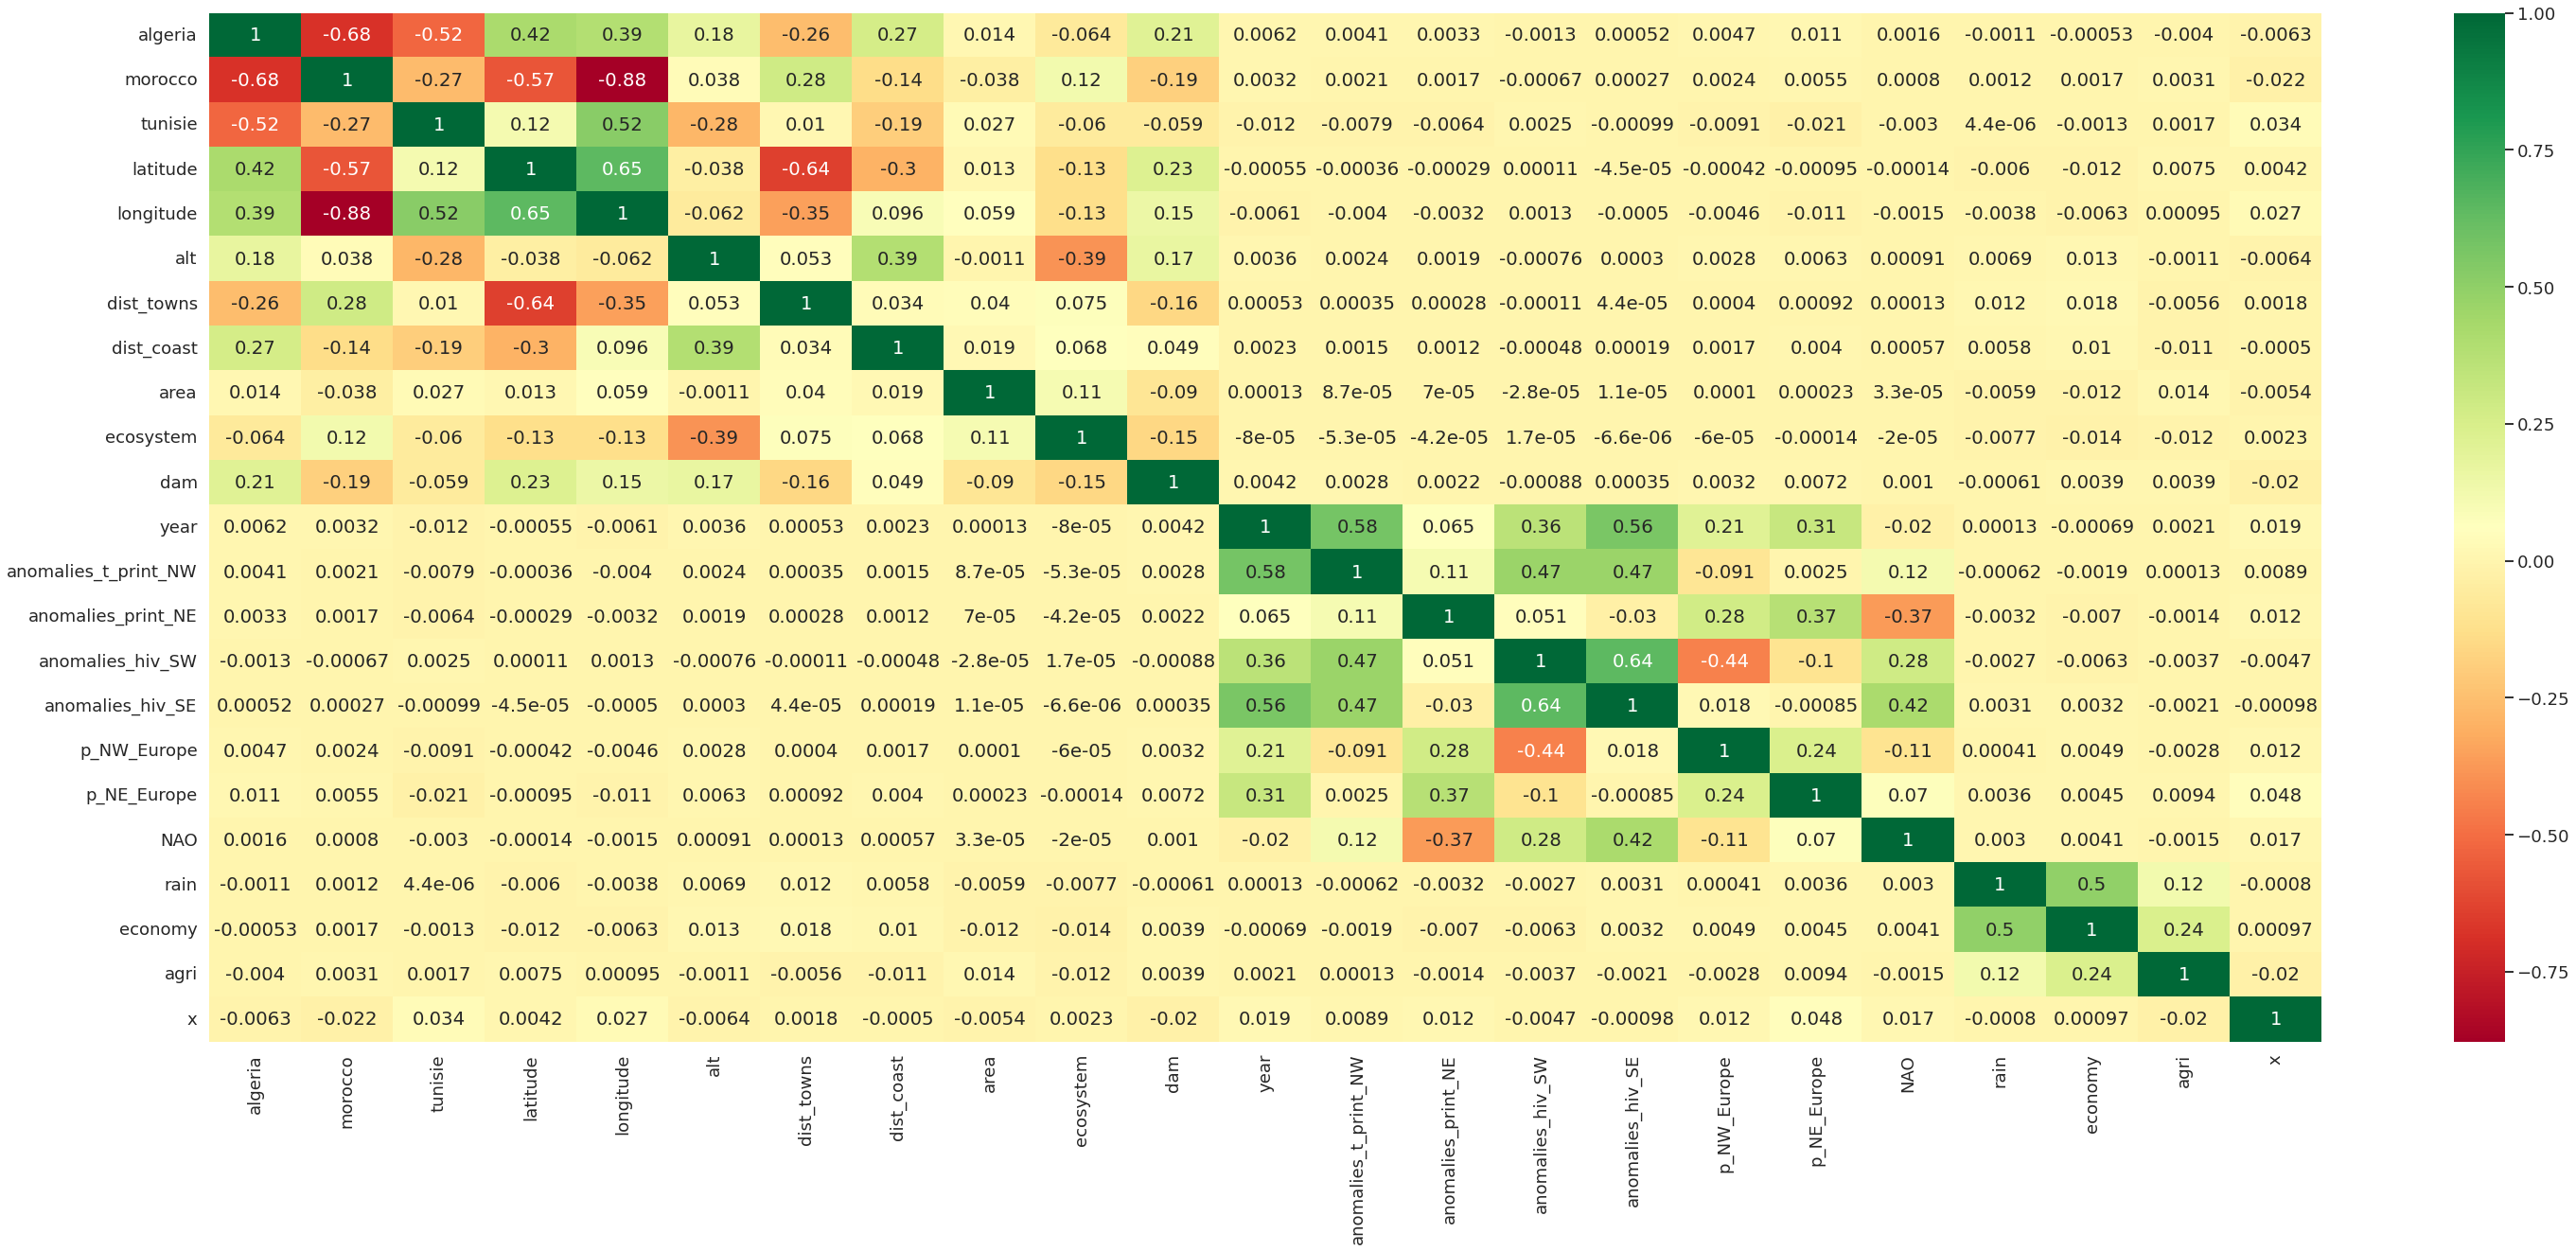

In [ ]:
corr_matrix = data.corr()
response_corr = corr_matrix['x']
top_corr_features = response_corr[response_corr.abs() > 0].index
plt.tight_layout
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# sns.heatmap(corr_matrix.loc[top_corr_features , top_corr_features])

nothing as insight about correlation

#Normalisation using sklearn

In [ ]:
X= data.drop(['x'] , axis = 1)
y= data.x

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle = True)

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
dd = pd.DataFrame(X_test_norm, columns = list(X_train.columns))
from termcolor import colored
for i in list(dd.columns):
  if (dd[i].max() - dd[i].min()) > 10 :
    print(colored(i , 'green') , colored(np.round(dd[i].max() - dd[i].min(), 2),'red'))
  else:
    print(colored(i , 'green') , colored(np.round(dd[i].max() - dd[i].min(), 2),'blue'))

algeria 1.0
morocco 1.0
tunisie 1.0
latitude 1.0
longitude 1.0
alt 1.0
dist_towns 1.0
dist_coast 1.0
area 1.0
ecosystem 1.0
dam 1.0
year 1.0
anomalies_t_print_NW 1.0
anomalies_print_NE 1.0
anomalies_hiv_SW 1.0
anomalies_hiv_SE 1.0
p_NW_Europe 1.0
p_NE_Europe 1.0
NAO 1.0
rain 1.0
economy 1.0
agri 1.0


#Standarisation using sklearn

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = list(X_train.columns)

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
dd = pd.DataFrame(X_test_stand, columns = list(X_train.columns))
from termcolor import colored
for i in list(dd.columns):
  if (dd[i].max() - dd[i].min()) > 10 :
    print(colored(i , 'green') , colored(np.round(dd[i].max() - dd[i].min(), 2),'red'))
  else:
    print(colored(i , 'green') , colored(np.round(dd[i].max() - dd[i].min(), 2),'blue'))

algeria 2.02
morocco 2.27
tunisie 2.64
latitude 6.24
longitude 4.09
alt 4.5
dist_towns 9.74
dist_coast 5.9
area 12.51
ecosystem 3.29
dam 2.06
year 3.31
anomalies_t_print_NW 4.08
anomalies_print_NE 4.47
anomalies_hiv_SW 4.55
anomalies_hiv_SE 4.09
p_NW_Europe 3.95
p_NE_Europe 4.43
NAO 3.53
rain 4.06
economy 4.92
agri 4.56


#KNN

In [ ]:
# training a KNN model
from sklearn.neighbors import KNeighborsRegressor
# measuring mea score
from sklearn import metrics

# knn 
knn = KNeighborsRegressor(n_neighbors=3)

mea = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring mea
for i in range(len(trainX)):
    
    # fit
    knn.fit(trainX[i],y_train)
    # predict
    pred = knn.predict(testX[i])
    # mea
    mea.append(metrics.mean_absolute_error(y_test,pred))


# visualizing the result
df_knn = pd.DataFrame({'mea':mea},index=['Original','Normalized','Standardized'])
df_knn

,mea
Original,677.022896
Normalized,683.183502
Standardized,687.000673


In [ ]:
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,10))

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)

#Create new KNN object
knn_2 = KNeighborsRegressor()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 8


In [ ]:
# training a KNN model
from sklearn.neighbors import KNeighborsRegressor
# measuring mea score
from sklearn import metrics

# knn 
knn = KNeighborsRegressor(n_neighbors=8)

mea = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring mea
for i in range(len(trainX)):
    
    # fit
    knn.fit(trainX[i],y_train)
    # predict
    pred = knn.predict(testX[i])
    # mea
    mea.append(metrics.mean_absolute_error(y_test,pred))


# visualizing the result
df_knn = pd.DataFrame({'mea':mea},index=['Original','Normalized','Standardized'])
df_knn

,mea
Original,614.218939
Normalized,610.138005
Standardized,628.641667


In [ ]:
data.x.describe()

count     3958.000000
mean       415.286761
std       1905.565491
min          0.000000
25%          0.000000
50%          4.000000
75%        151.500000
max      81950.000000
Name: x, dtype: float64

#Support vector regressor

In [ ]:
# training an SVR model
from  sklearn.svm import SVR
# measuring mse score
from sklearn import metrics

# SVR
svr = SVR(kernel='rbf',C=1)

mse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring mse
for i in range(len(trainX)):
    
    # fit
    svr.fit(trainX[i],y_train)
    # predict
    pred = svr.predict(testX[i])
    # mse
    mse.append(metrics.mean_absolute_error(y_test,pred))

# visualizing the result    
df_svr = pd.DataFrame({'mse':mse},index=['Original','Normalized','Standardized'])
df_svr

,mse
Original,352.934710
Normalized,352.840830
Standardized,352.814565


In [ ]:
#List Hyperparameters that we want to tune.
kernel = ['poly', 'rbf']
C = list(range(1,5))

#Convert to dictionary
hyperparameters = dict(kernel=kernel , C=C)

#Create new KNN object
svr = SVR()


clf = GridSearchCV(svr, hyperparameters, cv=10 , n_jobs = -1 , verbose = 1)

#Fit the model
best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   59.4s finished


Best kernel: rbf
Best C: 1


In [ ]:
# training an SVR model
from  sklearn.svm import SVR
# measuring mse score
from sklearn import metrics

# SVR
svr = SVR(kernel='rbf',C=1)

mse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring mse
for i in range(len(trainX)):
    
    # fit
    svr.fit(trainX[i],y_train)
    # predict
    pred = svr.predict(testX[i])
    # mse
    mse.append(metrics.mean_absolute_error(y_test,pred))

# visualizing the result    
df_svr = pd.DataFrame({'mse':mse},index=['Original','Normalized','Standardized'])
df_svr

,mse
Original,352.934710
Normalized,352.840830
Standardized,352.814565


#Decesion Tree

In [ ]:
# training a Decision Tree model
from sklearn.tree import DecisionTreeRegressor
# measuring mea score
from sklearn.metrics import mean_absolute_error

# Decision tree
dt = DecisionTreeRegressor(max_depth=10,random_state=27)

mea = []

# raw, normalized and standardized training and testing data
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

# model fitting and measuring mea
for i in range(len(trainX)):
    
    # fit
    dt.fit(trainX[i],y_train)
    # predict
    pred = dt.predict(testX[i])
    # mea
    mea.append(mean_absolute_error(y_test,pred))

# visualizing the result    
df_dt = pd.DataFrame({'mea':mea},index=['Original','Normalized','Standardized'])
df_dt

,mea
Original,667.550936
Normalized,667.550936
Standardized,667.550936


In [ ]:
#List Hyperparameters that we want to tune.
max_depth = list(range(10,50))

#Convert to dictionary
hyperparameters = dict(max_depth=max_depth)

#Create new Decision tree object
dt = DecisionTreeRegressor()


clf = GridSearchCV(dt, hyperparameters, cv=10 , n_jobs = -1 , verbose = 1)

#Fit the model
best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
print('Best max_deth:', best_model.best_estimator_.get_params()['max_depth'])

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    5.0s


Best kernel: 10


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   16.8s finished


In [ ]:
# training a Decision Tree model
from sklearn.tree import DecisionTreeRegressor
# measuring mea score
from sklearn.metrics import mean_absolute_error

# Decision tree
dt = DecisionTreeRegressor(max_depth=best_model.best_estimator_.get_params()['max_depth']
                           ,random_state=27)

mea = []

# raw, normalized and standardized training and testing data
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

# model fitting and measuring mea
for i in range(len(trainX)):
    
    # fit
    dt.fit(trainX[i],y_train)
    # predict
    pred = dt.predict(testX[i])
    # mea
    mea.append(mean_absolute_error(y_test,pred))

# visualizing the result    
df_dt = pd.DataFrame({'mea':mea},index=['Original','Normalized','Standardized'])
df_dt

,mea
Original,667.550936
Normalized,667.550936
Standardized,667.550936


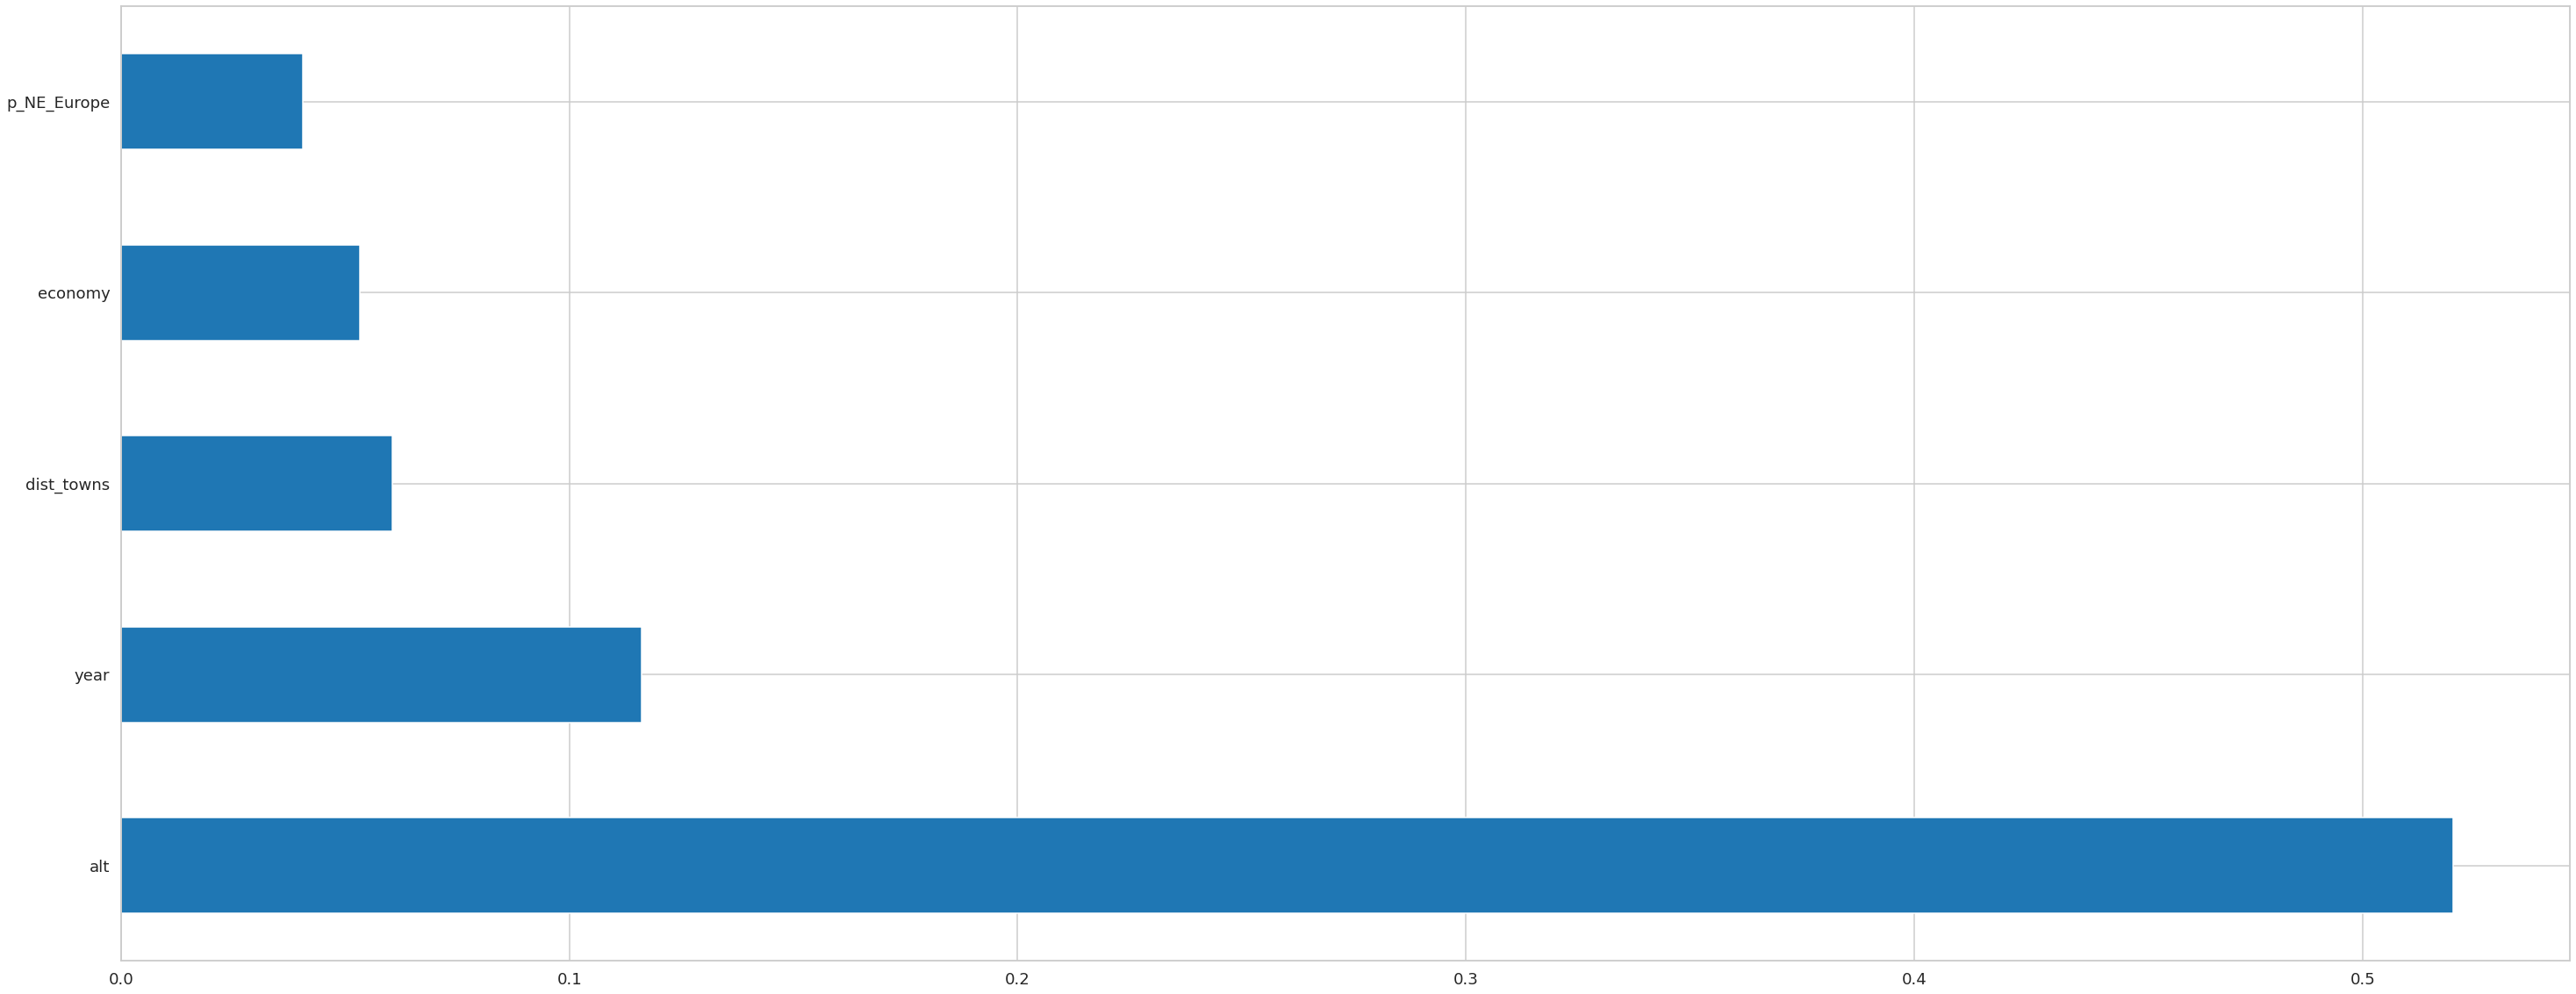

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

#Random forest

In [ ]:
# training a Decision Tree model
from sklearn.ensemble import RandomForestRegressor
# measuring mea score
from sklearn.metrics import mean_absolute_error

# Decision tree
rf = RandomForestRegressor(random_state=27)

mea = []

# raw, normalized and standardized training and testing data
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

# model fitting and measuring mea
for i in range(len(trainX)):
    
    # fit
    rf.fit(trainX[i],y_train)
    # predict
    pred = rf.predict(testX[i])
    # mea
    mea.append(mean_absolute_error(y_test,pred))

# visualizing the result    
df_rf = pd.DataFrame({'mea':mea},index=['Original','Normalized','Standardized'])
df_rf

,mea
Original,667.989040
Normalized,668.191131
Standardized,667.423081


In [272]:
# #List Hyperparameters that we want to tune.
# n_estimators = [100 , 200]
# max_features = ['auto', 'sqrt']
# max_depth = [1,2,3,4]



# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth)

# #Create new Decision tree object
# rf = RandomForestRegressor(random_state=27, n_estimators=100 , max_features = 'sqrt')


# clf = GridSearchCV(rf, hyperparameters, cv=10 , n_jobs = -1 , verbose = 1)

# #Fit the model
# best_model = clf.fit(X,y)

# #Print The value of best Hyperparameters
# # print('Best max_deth:', best_model.best_estimator_.get_params()['n_estimators'])
# # print('Best max_deth:', best_model.best_estimator_.get_params()['max_features'])
# print('Best max_deth:', best_model.best_estimator_.get_params()['max_depth'])

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best max_deth: 1


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.3s finished


In [275]:
# training a Decision Tree model
from sklearn.ensemble import RandomForestRegressor
# measuring mea score
from sklearn.metrics import mean_absolute_error

# Decision tree
rf = RandomForestRegressor(random_state=27, n_estimators=100, max_features='sqrt', max_depth=1)

mea = []

# raw, normalized and standardized training and testing data
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

# model fitting and measuring mea
for i in range(len(trainX)):
    
    # fit
    rf.fit(trainX[i],y_train)
    # predict
    pred = rf.predict(testX[i])
    # mea
    mea.append(mean_absolute_error(y_test,pred))

# visualizing the result    
df_rf = pd.DataFrame({'mea':mea},index=['Original','Normalized','Standardized'])
df_rf

,mea
Original,581.025488
Normalized,581.025488
Standardized,581.025488


#ExtraTreesRegressor

In [ ]:
# training a Decision Tree model
from sklearn.ensemble import ExtraTreesRegressor
# measuring mea score
from sklearn.metrics import mean_absolute_error

# Decision tree
etr = ExtraTreesRegressor(criterion='mse' , max_depth=10, n_estimators=100, n_jobs = -1, verbose = 1)

mea = []

# raw, normalized and standardized training and testing data
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

# model fitting and measuring mea
for i in range(len(trainX)):
    
    # fit
    etr.fit(trainX[i],y_train)
    # predict
    pred = etr.predict(testX[i])
    # mea
    mea.append(mean_absolute_error(y_test,pred))

# visualizing the result    
df_etr = pd.DataFrame({'mea':mea},index=['Original','Normalized','Standardized'])
df_etr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parall

,mea
Original,667.756134
Normalized,672.622822
Standardized,687.124122


In [ ]:
#List Hyperparameters that we want to tune.
max_depth = list(range(10,11))
n_estimators = [900, 1000]

#hyperparametres
hyperparameters = dict(max_depth=max_depth , n_estimators = n_estimators)

#the model
etr =  ExtraTreesRegressor()

#the best model
clf = GridSearchCV(etr, hyperparameters , cv=10 , n_jobs = -1 , verbose = 1)

#ya fitini
best_model = clf.fit(X, y)

#print the best parametres
print('Best max_depth : ' ,best_model.best_estimator_.get_params()['max_depth'])
print('Best n_estimators : ' ,best_model.best_estimator_.get_params()['n_estimators'])
# print('Best max_deth:', best_model.best_estimator_.get_params()['max_depth'])

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.8min finished


Best max_depth :  10
Best n_estimators :  1000


{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

In [ ]:
# training a Decision Tree model
from sklearn.ensemble import ExtraTreesRegressor
# measuring mea score
from sklearn.metrics import mean_absolute_error

# Decision tree
etr = ExtraTreesRegressor(criterion='mse' , max_depth=10, n_estimators=1000, n_jobs = -1)

mea = []

# raw, normalized and standardized training and testing data
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

# model fitting and measuring mea
for i in range(len(trainX)):
    
    # fit
    etr.fit(trainX[i],y_train)
    # predict
    pred = etr.predict(testX[i])
    # mea
    mea.append(mean_absolute_error(y_test,pred))

# visualizing the result    
df_etr = pd.DataFrame({'mea':mea},index=['Original','Normalized','Standardized'])
df_etr

,mea
Original,673.178607
Normalized,670.583226
Standardized,674.311803


#Adaboost

In [ ]:
# training a Decision Tree model
from sklearn.ensemble import AdaBoostRegressor
# measuring mea score
from sklearn.metrics import mean_absolute_error

# Adaboost
ada = AdaBoostRegressor(SVR(kernel='rbf',C=1))

mea = []

# raw, normalized and standardized training and testing data
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

# model fitting and measuring mea
for i in range(len(trainX)):
    
    # fit
    ada.fit(trainX[i],y_train)
    # predict
    pred = ada.predict(testX[i])
    # mea
    mea.append(mean_absolute_error(y_test,pred))

# visualizing the result    
df_ada = pd.DataFrame({'mea':mea},index=['Original','Normalized','Standardized'])
df_ada

,mea
Original,352.962542
Normalized,352.905809
Standardized,352.951557


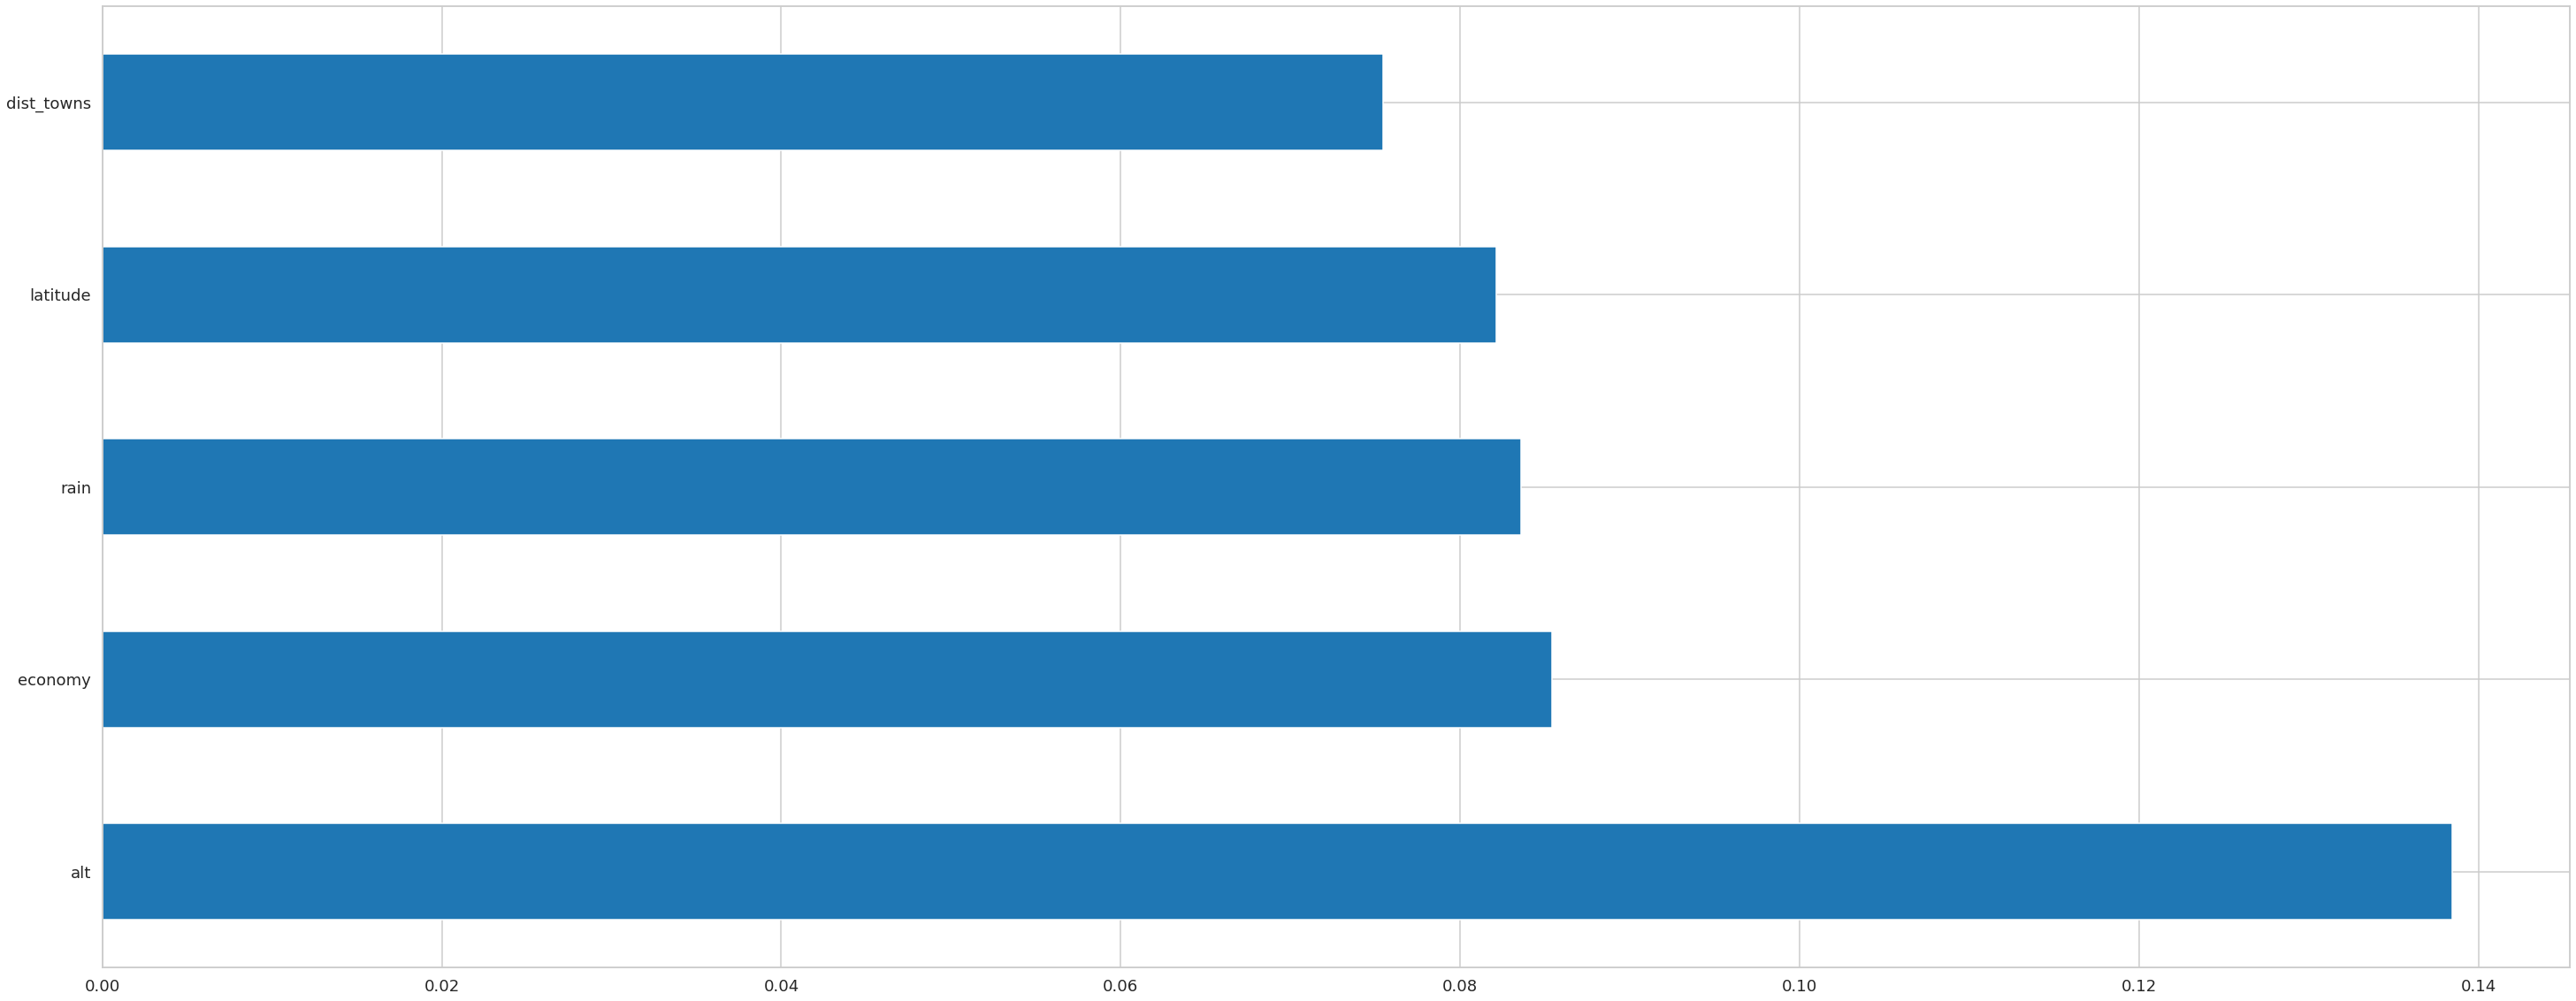

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()